In [3]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
cur_path = "/content/drive/MyDrive/cp2/"
os.chdir(cur_path)
!pwd

/content/drive/MyDrive/cp2


In [4]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)


    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [5]:

#set display option for rows & columns
pd.set_option( 'display.max_rows', None)
pd.set_option('display.max_columns', None )

In [6]:

# loading train transaction data
train_transaction = pd.read_csv('train_transaction.csv')
print(train_transaction.shape)

train_transaction = reduce_mem_usage(train_transaction)
train_transaction.head(4)

(590540, 394)
Memory usage of dataframe is 1775.15 MB
Memory usage after optimization is: 542.35 MB
Decreased by 69.4%


TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   

   C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3  M4 M5 M6   M7   M8   M9  \
0  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T  M2  F  T  NaN  NaN  NaN   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN  M0  T  T  NaN  NaN  NaN   
2   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T  M0  F  F    F    F    F   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN  M0  T  F  NaN  NaN  NaN   

    V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0  0.0   
2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  0.0   

   V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  \
0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   

   V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  \
0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   

   V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  V60  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   

   V61  V62  V63  V64  V65  V66  V67  V68  V69  V70  V71  V72  V73  V74  V75  \
0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
1  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
3  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   

   V76  V77  V78  V79  V80  V81  V82  V83  V84  V85  V86  

In [10]:

# Loading train identity data
train_identity = pd.read_csv('train_identity.csv')
print(train_identity.shape)

train_identity = reduce_mem_usage(train_identity)
train_identity.head(4)

(144233, 41)
Memory usage of dataframe is 45.12 MB
Memory usage after optimization is: 25.86 MB
Decreased by 42.7%


TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   

   id_09  id_10  id_11     id_12  id_13  id_14  id_15     id_16  id_17  id_18  \
0    NaN    NaN  100.0  NotFound    NaN -480.0    New  NotFound  166.0    NaN   
1    NaN    NaN  100.0  NotFound   49.0 -300.0    New  NotFound  166.0    NaN   
2    0.0    0.0  100.0  NotFound   52.0    NaN  Found     Found  121.0    NaN   
3    NaN    NaN  100.0  NotFound   52.0    NaN    New  NotFound  225.0    NaN   

   id_19  id_20  id_21  id_22 id_23  id_24  id_25  id_26 id_27  id_28  \
0  542.0  144.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
1  621.0  500.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
2  410.0  142.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN  Found   
3  176.0  507.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   

      id_29        id_30                id_31  id_32      id_33  \
0  NotFound  Android 7.0  samsung browser 6.2   32.0  2220x1080   
1  NotFound   iOS 11.1.2   mobile safari 11.0   32.0   1334x750   
2     Found          NaN          chrome 62.0    NaN        NaN   
3  NotFound          NaN          chrome 62.0    NaN        NaN   

            id_34 id_35 id_36 id_37 id_38 DeviceType  \
0  match_status:2     T     F     T     T     mobile   
1  match_status:1     T     F     F     T     mobile   
2             NaN     F     F     T     T    desktop   
3             NaN     F     F     T     T    desktop   

                      DeviceInfo  
0  SAMSUNG SM-G892A Build/NRD90M  
1                     iOS Device  
2                        Windows  
3                            NaN

Observation:

The above two dataframe are joined by TransactionID column.
Not all the transactions have corresponding indentity information.

The total number of datapoints in transaction dataframe(=590540) are more than number of datapoints in identity dataframe(=144233)

In [11]:
# Merging transaction and identity train data
train_df = pd.merge( train_transaction, train_identity, how ='left')

print(train_df.shape)
print("Total number of rows after merging = ", train_df.shape[0])
print("Total number of columns after merging = ",train_df.shape[1])

del train_transaction, train_identity
train_df.head(4)

(590540, 434)
Total number of rows after merging =  590540
Total number of columns after merging =  434


TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   

   C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3  M4 M5 M6   M7   M8   M9  \
0  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T  M2  F  T  NaN  NaN  NaN   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN  M0  T  T  NaN  NaN  NaN   
2   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T  M0  F  F    F    F    F   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN  M0  T  F  NaN  NaN  NaN   

    V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0  0.0   
2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  0.0   

   V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  \
0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   

   V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  \
0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   

   V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  V60  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   

   V61  V62  V63  V64  V65  V66  V67  V68  V69  V70  V71  V72  V73  V74  V75  \
0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
1  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
3  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   

   V76  V77  V78  V79  V80  V81  V82  V83  V84  V85  V86  

Few columns contain categorical data and other columns has numerical datatype.

In [12]:
# Loading train identity data
train_identity = pd.read_csv('train_identity.csv')
print(train_identity.shape)

train_identity = reduce_mem_usage(train_identity)
train_identity.head(4)

(144233, 41)
Memory usage of dataframe is 45.12 MB
Memory usage after optimization is: 25.86 MB
Decreased by 42.7%


TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   

   id_09  id_10  id_11     id_12  id_13  id_14  id_15     id_16  id_17  id_18  \
0    NaN    NaN  100.0  NotFound    NaN -480.0    New  NotFound  166.0    NaN   
1    NaN    NaN  100.0  NotFound   49.0 -300.0    New  NotFound  166.0    NaN   
2    0.0    0.0  100.0  NotFound   52.0    NaN  Found     Found  121.0    NaN   
3    NaN    NaN  100.0  NotFound   52.0    NaN    New  NotFound  225.0    NaN   

   id_19  id_20  id_21  id_22 id_23  id_24  id_25  id_26 id_27  id_28  \
0  542.0  144.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
1  621.0  500.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
2  410.0  142.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN  Found   
3  176.0  507.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   

      id_29        id_30                id_31  id_32      id_33  \
0  NotFound  Android 7.0  samsung browser 6.2   32.0  2220x1080   
1  NotFound   iOS 11.1.2   mobile safari 11.0   32.0   1334x750   
2     Found          NaN          chrome 62.0    NaN        NaN   
3  NotFound          NaN          chrome 62.0    NaN        NaN   

            id_34 id_35 id_36 id_37 id_38 DeviceType  \
0  match_status:2     T     F     T     T     mobile   
1  match_status:1     T     F     F     T     mobile   
2             NaN     F     F     T     T    desktop   
3             NaN     F     F     T     T    desktop   

                      DeviceInfo  
0  SAMSUNG SM-G892A Build/NRD90M  
1                     iOS Device  
2                        Windows  
3                            NaN

In [13]:
# loading test transaction data
test_transaction = pd.read_csv('test_transaction.csv')
print(test_transaction.shape)

test_transaction = reduce_mem_usage(test_transaction)
test_transaction.head(4)

(506691, 393)
Memory usage of dataframe is 1519.24 MB
Memory usage after optimization is: 472.59 MB
Decreased by 68.9%


TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3663549       18403224       31.953125         W  10409  111.0   
1        3663550       18403263       49.000000         W   4272  111.0   
2        3663551       18403310      171.000000         W   4476  574.0   
3        3663552       18403310      285.000000         W  10989  360.0   

   card3 card4  card5  card6  addr1  addr2   dist1  dist2 P_emaildomain  \
0  150.0  visa  226.0  debit  170.0   87.0     1.0    NaN     gmail.com   
1  150.0  visa  226.0  debit  299.0   87.0     4.0    NaN       aol.com   
2  150.0  visa  226.0  debit  472.0   87.0  2636.0    NaN   hotmail.com   
3  150.0  visa  166.0  debit  205.0   87.0    17.0    NaN     gmail.com   

  R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  \
0           NaN  6.0  6.0  0.0  0.0  3.0  4.0  0.0  0.0  6.0  0.0  5.0  1.0   
1           NaN  3.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0  2.0  0.0  1.0  1.0   
2           NaN  2.0  2.0  0.0  0.0  0.0  5.0  0.0  0.0  4.0  0.0  2.0  0.0   
3           NaN  5.0  2.0  0.0  0.0  1.0  1.0  0.0  0.0  2.0  0.0  2.0  0.0   

     C13  C14     D1     D2    D3     D4    D5  D6  D7  D8  D9    D10    D11  \
0  115.0  6.0  419.0  419.0  27.0  398.0  27.0 NaN NaN NaN NaN  418.0  203.0   
1   12.0  2.0  149.0  149.0   7.0  634.0   7.0 NaN NaN NaN NaN  231.0  634.0   
2   22.0  2.0  137.0  137.0  10.0   97.0  10.0 NaN NaN NaN NaN  136.0  136.0   
3    7.0  4.0   42.0   42.0  41.0  242.0  41.0 NaN NaN NaN NaN  242.0  242.0   

   D12  D13  D14    D15 M1 M2 M3   M4   M5 M6   M7   M8   M9   V1   V2   V3  \
0  NaN  NaN  NaN  409.0  T  T  F  NaN  NaN  F    T    T    T  1.0  1.0  1.0   
1  NaN  NaN  NaN  634.0  T  F  F   M0  NaN  F  NaN  NaN  NaN  1.0  1.0  1.0   
2  NaN  NaN  NaN   97.0  T  T  F   M0    F  F    F    F    F  1.0  1.0  1.0   
3  NaN  NaN  NaN  242.0  T  T  T  NaN  NaN  T  NaN  NaN  NaN  1.0  1.0  1.0   

    V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  V16  V17  V18  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   

   V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  2.0  2.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   

   V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  V48  \
0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
1  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
2  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
3  0.0  2.0  2.0  2.0  2.0  0.0  0.0  1.0  0.0  0.0  2.0  2.0  2.0  2.0  1.0   

   V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  V60  V61  V62  V63  \
0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
3  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   

   V64  V65  V66  V67  V68  V69  V70  V71  V72  V73  V74  V75  V76  V77  V78  \
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
1  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0   
2  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  2.0  1.0  2.0   
3  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0   

   V79  V80  V81  V82  V83  V84  V85  V86  V87  V88  

In [14]:
# Loading test identity data
test_identity = pd.read_csv('test_identity.csv')
print(test_identity.shape)

test_identity = reduce_mem_usage(test_identity)
test_identity.head(4)

(141907, 41)
Memory usage of dataframe is 44.39 MB
Memory usage after optimization is: 25.44 MB
Decreased by 42.7%


TransactionID  id-01     id-02  id-03  id-04  id-05  id-06  id-07  id-08  \
0        3663586  -45.0  280290.0    NaN    NaN    0.0    0.0    NaN    NaN   
1        3663588    0.0    3579.0    0.0    0.0    0.0    0.0    NaN    NaN   
2        3663597   -5.0  185210.0    NaN    NaN    1.0    0.0    NaN    NaN   
3        3663601  -45.0  252944.0    0.0    0.0    0.0    0.0    NaN    NaN   

   id-09  id-10  id-11     id-12  id-13  id-14  id-15     id-16  id-17  id-18  \
0    NaN    NaN  100.0  NotFound   27.0    NaN    New  NotFound  225.0   15.0   
1    0.0    0.0  100.0     Found    NaN -300.0  Found     Found  166.0    NaN   
2    NaN    NaN  100.0  NotFound   52.0 -360.0    New  NotFound  225.0    NaN   
3    0.0    0.0  100.0  NotFound   27.0    NaN  Found     Found  225.0   15.0   

   id-19  id-20  id-21  id-22 id-23  id-24  id-25  id-26 id-27  id-28  \
0  427.0  563.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
1  542.0  368.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN  Found   
2  271.0  507.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
3  427.0  563.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN  Found   

      id-29          id-30                    id-31  id-32     id-33  \
0  NotFound            NaN  chrome 67.0 for android    NaN       NaN   
1     Found  Android 6.0.1  chrome 67.0 for android   24.0  1280x720   
2  NotFound            NaN       ie 11.0 for tablet    NaN       NaN   
3     Found            NaN  chrome 67.0 for android    NaN       NaN   

            id-34 id-35 id-36 id-37 id-38 DeviceType  \
0             NaN     F     F     T     F     mobile   
1  match_status:2     T     F     T     T     mobile   
2             NaN     F     T     T     F    desktop   
3             NaN     F     F     T     F     mobile   

                    DeviceInfo  
0  MYA-L13 Build/HUAWEIMYA-L13  
1         LGLS676 Build/MXB48T  
2                  Trident/7.0  
3  MYA-L13 Build/HUAWEIMYA-L13

In [15]:
#merging test transaction and identity table
test_df = pd.merge(test_transaction, test_identity, how='left')

print(test_df.shape)
print("Total number of rows after merging = ", test_df.shape[0])
print("Total number of columns after merging = ",test_df.shape[1])

del test_transaction, test_identity
test_df.head(4)

(506691, 433)
Total number of rows after merging =  506691
Total number of columns after merging =  433


TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3663549       18403224       31.953125         W  10409  111.0   
1        3663550       18403263       49.000000         W   4272  111.0   
2        3663551       18403310      171.000000         W   4476  574.0   
3        3663552       18403310      285.000000         W  10989  360.0   

   card3 card4  card5  card6  addr1  addr2   dist1  dist2 P_emaildomain  \
0  150.0  visa  226.0  debit  170.0   87.0     1.0    NaN     gmail.com   
1  150.0  visa  226.0  debit  299.0   87.0     4.0    NaN       aol.com   
2  150.0  visa  226.0  debit  472.0   87.0  2636.0    NaN   hotmail.com   
3  150.0  visa  166.0  debit  205.0   87.0    17.0    NaN     gmail.com   

  R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  \
0           NaN  6.0  6.0  0.0  0.0  3.0  4.0  0.0  0.0  6.0  0.0  5.0  1.0   
1           NaN  3.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0  2.0  0.0  1.0  1.0   
2           NaN  2.0  2.0  0.0  0.0  0.0  5.0  0.0  0.0  4.0  0.0  2.0  0.0   
3           NaN  5.0  2.0  0.0  0.0  1.0  1.0  0.0  0.0  2.0  0.0  2.0  0.0   

     C13  C14     D1     D2    D3     D4    D5  D6  D7  D8  D9    D10    D11  \
0  115.0  6.0  419.0  419.0  27.0  398.0  27.0 NaN NaN NaN NaN  418.0  203.0   
1   12.0  2.0  149.0  149.0   7.0  634.0   7.0 NaN NaN NaN NaN  231.0  634.0   
2   22.0  2.0  137.0  137.0  10.0   97.0  10.0 NaN NaN NaN NaN  136.0  136.0   
3    7.0  4.0   42.0   42.0  41.0  242.0  41.0 NaN NaN NaN NaN  242.0  242.0   

   D12  D13  D14    D15 M1 M2 M3   M4   M5 M6   M7   M8   M9   V1   V2   V3  \
0  NaN  NaN  NaN  409.0  T  T  F  NaN  NaN  F    T    T    T  1.0  1.0  1.0   
1  NaN  NaN  NaN  634.0  T  F  F   M0  NaN  F  NaN  NaN  NaN  1.0  1.0  1.0   
2  NaN  NaN  NaN   97.0  T  T  F   M0    F  F    F    F    F  1.0  1.0  1.0   
3  NaN  NaN  NaN  242.0  T  T  T  NaN  NaN  T  NaN  NaN  NaN  1.0  1.0  1.0   

    V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  V16  V17  V18  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   

   V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  2.0  2.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   

   V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  V48  \
0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
1  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
2  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
3  0.0  2.0  2.0  2.0  2.0  0.0  0.0  1.0  0.0  0.0  2.0  2.0  2.0  2.0  1.0   

   V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  V60  V61  V62  V63  \
0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
3  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   

   V64  V65  V66  V67  V68  V69  V70  V71  V72  V73  V74  V75  V76  V77  V78  \
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
1  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0   
2  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  2.0  1.0  2.0   
3  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0   

   V79  V80  V81  V82  V83  V84  V85  V86  V87  V88  

In [16]:
#checking for final rows and column details

print(train_df.info())
print("==============================================================")
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float16(354), float32(45), int16(1), int32(2), int8(1), object(31)
memory usage: 646.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 433 entries, TransactionID to DeviceInfo
dtypes: float16(346), float32(53), int16(1), int32(2), object(31)
memory usage: 561.5+ MB
None


In [17]:

#Train data column count and their values
print("Total number of columns are:",train_df.shape[1])
print("="*50)
print("The train features are:" , train_df.columns.tolist())

Total number of columns are: 434
The train features are: ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', '

In [18]:
#Test data column count and their values
print("Total number of columns are:",test_df.shape[1])
print("="*50)
print("The test features are:" , test_df.columns.tolist())

Total number of columns are: 433
The test features are: ['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75',

The id column names have underscore(_) in it, lets replace it with - to maintain uniformity.

In [19]:
test_df.columns = test_df.columns.str.replace('^id-', 'id_', regex=True)
#df.columns = df.columns.str.replace('$', '')
print(test_df.columns.tolist())


['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83',

In [20]:
#Features datatypes & features count based on their datatype

print(train_df.dtypes)
print("**************************************************")
print("Features counts - ", train_df.dtypes.astype(str).value_counts())

TransactionID       int32
isFraud              int8
TransactionDT       int32
TransactionAmt    float16
ProductCD          object
card1               int16
card2             float16
card3             float16
card4              object
card5             float16
card6              object
addr1             float16
addr2             float16
dist1             float16
dist2             float16
P_emaildomain      object
R_emaildomain      object
C1                float16
C2                float16
C3                float16
C4                float16
C5                float16
C6                float16
C7                float16
C8                float16
C9                float16
C10               float16
C11               float16
C12               float16
C13               float16
C14               float16
D1                float16
D2                float16
D3                float16
D4                float16
D5                float16
D6                float16
D7                float16
D8          

In [21]:
# Duplicates check in train data
print(train_df.duplicated().sum())

# Duplicates check in test data
print(test_df.duplicated().sum())

0
0


Observation:
There are no duplicated rows neither in train data nor in test data.

In [22]:
# Check the unique values pattern for all features
for col, values in train_df.items():  # ✅ Use .items() instead of .iteritems()
    num_uniques = values.nunique()

    print(f'{col}: {num_uniques}')
    print(values.unique())
    print('-------\n')


TransactionID: 590540
[2987000 2987001 2987002 ... 3577537 3577538 3577539]
-------

isFraud: 2
[0 1]
-------

TransactionDT: 573349
[   86400    86401    86469 ... 15811079 15811088 15811131]
-------

TransactionAmt: 8195
[  68.5   29.    59.  ... 1731.   174.1 1660. ]
-------

ProductCD: 5
['W' 'H' 'C' 'S' 'R']
-------

card1: 13553
[13926  2755  4663 ... 13166  8767 18038]
-------

card2: 500
[ nan 404. 490. 567. 514. 555. 360. 100. 111. 352. 375. 418. 303. 314.
 543. 583. 148. 321. 269. 361. 272. 399. 569. 453. 417. 512. 545. 266.
 114. 481. 452. 547. 383. 170. 343. 556. 285. 562. 302. 264. 558. 500.
 396. 103. 206. 143. 243. 476. 199. 174. 423. 446. 492. 523. 440. 528.
 161. 535. 354. 117. 455. 325. 158. 268. 122. 479. 147. 215. 480. 265.
 388. 408. 309. 415. 414. 437. 104. 225. 101. 134. 586. 191. 491. 369.
 322. 494. 532. 313. 474. 324. 475. 298. 429. 432. 553. 566. 599. 296.
 251. 310. 242. 204. 250. 270. 346. 316. 194. 587. 390. 135. 536. 254.
 226. 327. 420. 260. 413. 428. 56

In [23]:
#percentage of missing data in train and test dataset

missig_rate = np.product(train_df.isnull().sum().sum()) / np.product(train_df.shape) * 100
print(f'Missing value in train data = {missig_rate:.2f}%')


missig_rate = np.product(test_df.isnull().sum().sum()) / np.product(test_df.shape) * 100
print(f'Missing value in test data = {missig_rate:.2f}%')

Missing value in train data = 45.07%
Missing value in test data = 41.11%


In [24]:
def missing_info(column, df):

    '''
        Function to find the missing values
        of feature in the dataframe.
    '''

    na = df[column].isna()

    count = na.sum()
    total_count = df.shape[0]
    miss_prcntage = np.round(( count/total_count)*100, 3 )

    return (count, miss_prcntage)

In [25]:
def missing_train_info(df):
    '''
        Function to get info. regarding missing values in the dataframe,
        for each column.

            - No. of missing values present in a column.
            - % of missing values in a column.
    '''

    column_missing_info = [ ]

    for column in df :

        count , miss_prcntage = missing_info(column, df);

        if(count):

            column_missing_info.append( [column, count, miss_prcntage] )

    column_names = [ 'Feature', 'Missing_Count', 'Missing_Percentage' ]
    missing_info_df = pd.DataFrame( data = column_missing_info , columns = column_names)

    return missing_info_df

In [26]:
#missing values based on features along with their respective count and percentage

missing_train_df = missing_train_info(train_df)

missing_train_df.sort_values(by=['Missing_Percentage'], ascending=False)

Feature  Missing_Count  Missing_Percentage
397          id_24         585793              99.196
398          id_25         585408              99.131
380          id_07         585385              99.127
381          id_08         585385              99.127
399          id_26         585377              99.126
394          id_21         585381              99.126
400          id_27         585371              99.125
395          id_22         585371              99.125
396          id_23         585371              99.125
8            dist2         552913              93.628
17              D7         551623              93.410
391          id_18         545427              92.361
23             D13         528588              89.509
24             D14         528353              89.469
22             D12         525823              89.041
377          id_04         524216              88.769
376          id_03         524216              88.769
16              D6         517353              87.607
406          id_33         517251              87.589
18              D8         515614              87.312
383          id_10         515614              87.312
382          id_09         515614              87.312
19              D9         515614              87.312
403          id_30         512975              86.865
405          id_32         512954              86.862
407          id_34         512735              86.825
387          id_14         510496              86.446
180           V146         508595              86.124
181           V147         508595              86.124
196           V162         508595              86.124
187           V153         508595              86.124
182           V148         508595              86.124
183           V149         508595              86.124
192           V158         508595              86.124
191           V157         508595              86.124
190           V156         508595              86.124
173           V139         508595              86.124
172           V138         508595              86.124
188           V154         508595              86.124
197           V163         508595              86.124
195           V161         508595              86.124
175           V141         508595              86.124
176           V142         508595              86.124
174           V140         508595              86.124
189           V155         508595              86.124
186           V152         508589              86.123
184           V150         508589              86.123
179           V145         508589              86.123
194           V160         508589              86.123
177           V143         508589              86.123
200           V166         508589              86.123
185           V151         508589              86.123
178           V144         508589              86.123
193           V159         508589              86.123
199           V165         508589              86.123
198           V164         508589              86.123
367           V333         508189              86.055
364           V330         508189              86.055
368           V334         508189              86.055
365           V331         508189              86.055
366           V332         508189              86.055
371           V337         508189              86.055
373           V339         508189              86.055
372           V338         508189              86.055
363           V329         508189              86.055
362           V328         508189              86.055
356           V322         508189              86.055
357           V323         508189              86.055
358           V324         508189              86.055
359           V325         508189              86.055
360           V326         508189              86.055
361           V327         508189              86.055
369           V335         508189              86.055
370           V

In [27]:
#Check numerical features in dataset

#numeric_data = train_df.select_dtypes(include=[np.number])
#numeric_data

In [28]:
#Categorical features and the count

def getCatFeatureDetail( df,cat_cols ):

    cat_detail_dict = { }
    for col in cat_cols:

        cat_detail_dict[col] = df[col].nunique()

    cat_detail_df = pd.DataFrame.from_dict(cat_detail_dict, orient = 'index', columns = ['nunique'])

    print('We Have ' + str(len(cat_cols)) + ' categorical columns.')

    print(cat_detail_df)

categorical_feature = ['isFraud','ProductCD','addr1', 'addr2', 'P_emaildomain','R_emaildomain','DeviceType','DeviceInfo']
all_cat_features = categorical_feature+ [f'card{i}' for i in range(1,7)]+ [f'M{i}' for i in range(1,10)] + [f'id_{i}' for i in range(12,39)]

getCatFeatureDetail(train_df, categorical_feature)

We Have 8 categorical columns.
               nunique
isFraud              2
ProductCD            5
addr1              332
addr2               74
P_emaildomain       59
R_emaildomain       60
DeviceType           2
DeviceInfo        1786


**2.Data Analysis & Visualization on each feature**


2.1 is_fraud

is_fraud is the numerical variable which has 2 unique value 0 and 1, where 0 indicates the legit transaction and 1 indicates the fraud transaction.

In [29]:
#isFraud datatype
train_df['isFraud'].dtype

dtype('int8')

In [30]:
#checking count of null values in isFraud column
print(train_df["isFraud"].isnull().sum())

0


In [31]:
#target varible value counts
train_df['isFraud'].value_counts()

isFraud
0    569877
1     20663
Name: count, dtype: int64

Text(0, 0.5, 'Percentage')

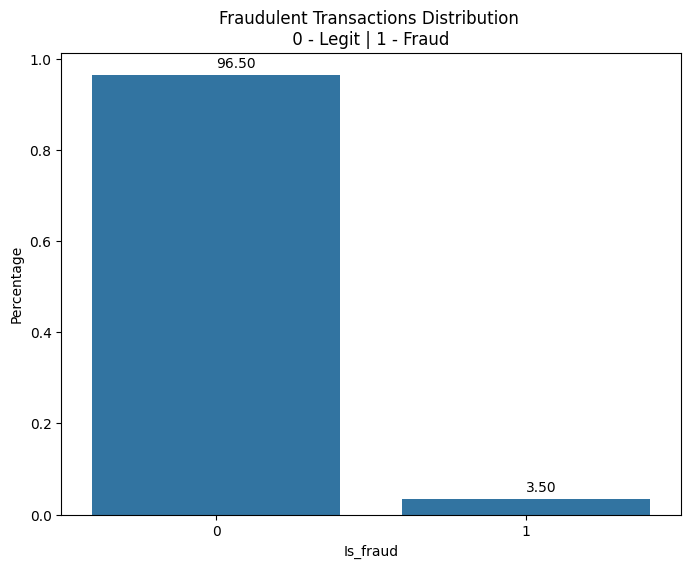

In [32]:
#bar plot
plt.figure(figsize = (8, 6 ))
yaxis = train_df['isFraud'].value_counts().values / train_df.shape[0]
barplot = sns.barplot(x = [0,1], y = yaxis)

for p in barplot.patches:
    barplot.annotate(format(p.get_height()*100, '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), xytext = (0, 5), textcoords = 'offset points')

plt.title("Fraudulent Transactions Distribution \n 0 - Legit | 1 - Fraud ")
plt.xlabel('Is_fraud')
plt.ylabel('Percentage')

Observations:
1. The total no. of fraudulent transactions( equals 3.5%) present in the dataset are very less compared to the legit transactions(total = 96.5%) which indicates that the dataset here is highly imbalanced.
2. This is an important feature to keep in mind while modellling as few models get highly impacted due to imbalanced dataset.
3. We are not predicting a fraudulent transactions here. Once a client (credit card) has fraud, their entire account is converted to isFraud=1.


## **2.2 TransactionDT**

It is a numerical variable.

Represents timedelta from a given reference datetime (not an actual timestamp)

In [33]:
#datatype check
train_df['TransactionDT'].dtype

dtype('int32')

In [34]:
# No null values for this column
print(train_df["TransactionDT"].isnull().sum())

print(test_df["TransactionDT"].isnull().sum())

0
0


In [35]:
train_df["TransactionDT"].nunique()

573349

In [36]:
#TransactionDT feature description

train_df[['TransactionDT']].describe().astype(int)


TransactionDT
count         590540
mean         7372311
std          4617223
min            86400
25%          3027057
50%          7306527
75%         11246620
max         15811131

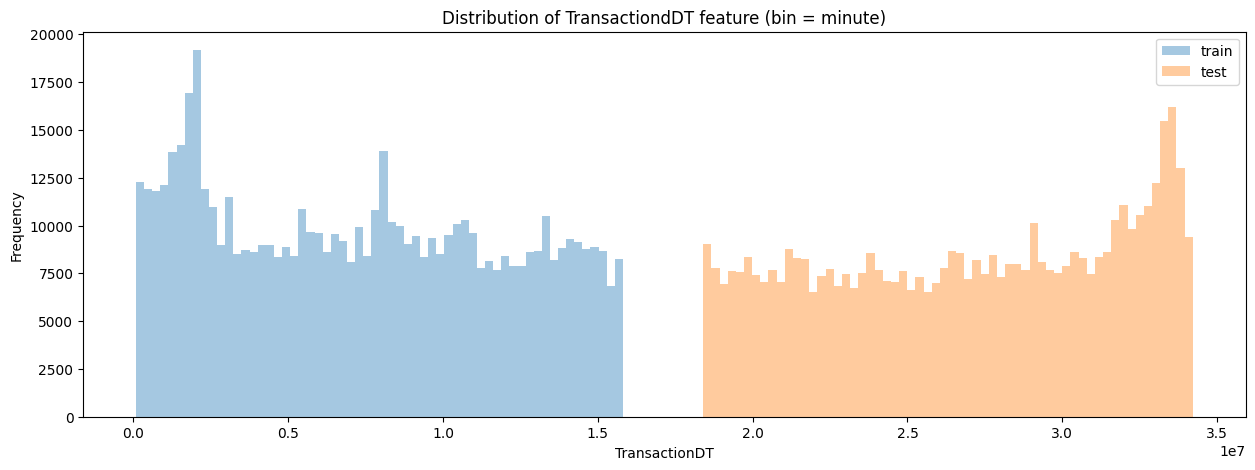

In [37]:
plt.figure(figsize = (15,5))
sns.distplot(train_df['TransactionDT'],kde = False,bins=60)
sns.distplot(test_df['TransactionDT'],kde = False,bins=60)
plt.legend(['train', 'test'])
plt.ylabel('Frequency')

plt.title('Distribution of TransactiondDT feature (bin = minute)');
plt.show()

Observations:
1.TransactionDT first minimum value is
86400, which corresponds to the number of seconds in a day (60min * 60sec * 24hrs = 86400) Hence, we can consider this TransactionDT column as the time in the secs. Using this, we can conclude data spans of 6 months, since the maximum value is 15811131, which corresponds to day 183 (15811131/(606024).”

Now, once we know that this column is the time in secs, we can use this column to create new time related features i.e. time in minutes and time in hours Etc.

Now, that we have the minimum timestamp available & hence, incidates all other transactions happened after this transaction, so if we assigne any day to week to first timestamp all the other succeeding trasanctions days can be found.

In the same fashion the months for each transactions can be specified.

There is some gap between train and test timedelta. Test transactions happeded after all train transactions. Hence, we need to keep this feature in mind while spitting the data for validation. (i.e splitting the data based on time series will show good results)

In the initial time stamps of train transaction are high and in the last month times of test data transaction are high, Another observation is that there are certain days in which number of transactions is more than 10000.

Now, that we know transationDT is in Lets, create 2 new features from this.

Hour
Day

In [38]:
#day features

train_df['day'] = ((train_df['TransactionDT'] //(3600*24)-1)%7)+1

test_df['day'] = ((test_df['TransactionDT'] //(3600*24)-1)%7)+1

In [39]:
#Highest no. of transaction on day 1
print(train_df['day'].value_counts()[:1])

day
1    98502
Name: count, dtype: int64


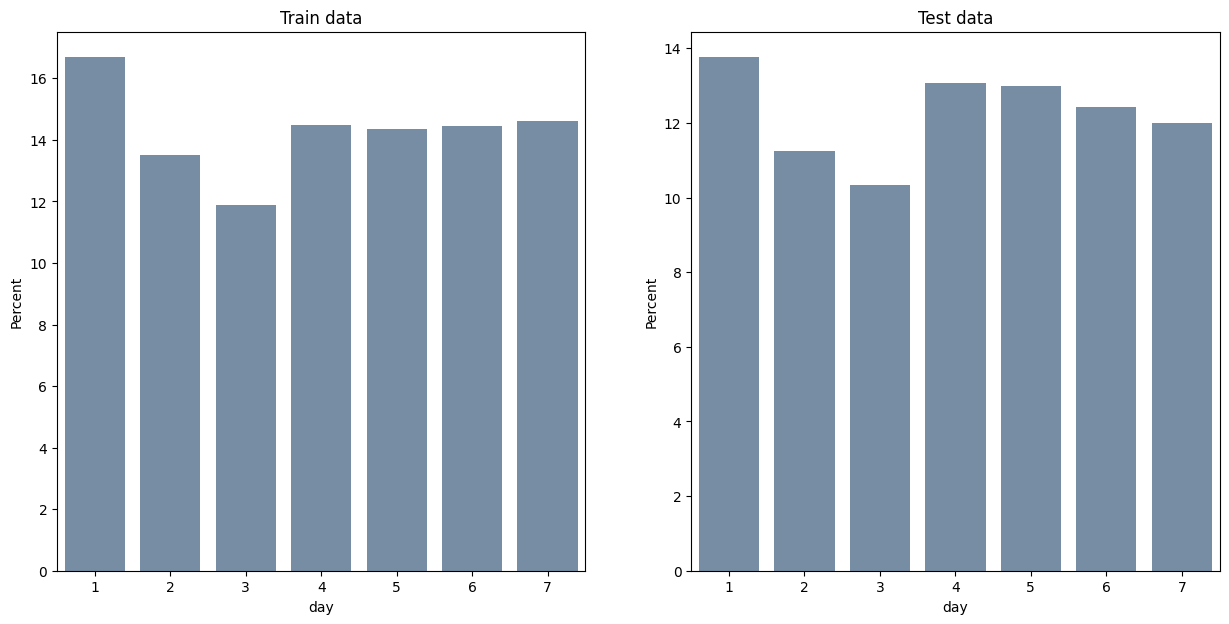

In [40]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
percentage = lambda i: len(i) / float(len(train_df['day'])) * 100
ax = sns.barplot(x = train_df['day'], y=train_df['day'],  estimator = percentage,color='#6E8DAB')
ax.set(ylabel = "Percent")
plt.title('Train data')

plt.subplot(1,2,2)
percentage = lambda i: len(i) / float(len(train_df['day'])) * 100
ax = sns.barplot(x = test_df['day'], y = test_df['day'],  estimator=percentage,color='#6E8DAB')
ax.set(ylabel = "Percent")
plt.title('Test data')
plt.show();

Day 1 has more transactions compared to other days and day 3 being last.

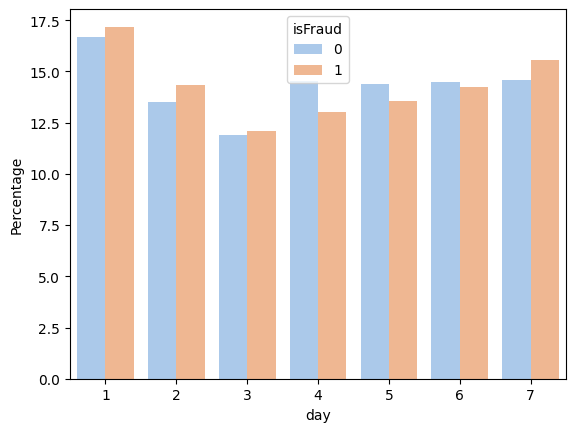

In [41]:
train_days = (train_df.groupby(['isFraud'])['day']
                     .value_counts(normalize=True)
                     .rename('Percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('day'))
sns.barplot(x="day", y = "Percentage", hue="isFraud", data = train_days, palette = 'pastel')
plt.show();

Day 1 has higher transaction frequency, both in fraud and legit transactions.

Day 1, Day 2, Day 3 and Day 7 has higher fradulent transactions, but overall there is not much difference between fraud and legit transactions in all 7 days

In [42]:
#Hour feature

train_df['hour'] = ((train_df['TransactionDT']//3600)%24)+1

test_df['hour'] = ((test_df['TransactionDT']//3600)%24)+1

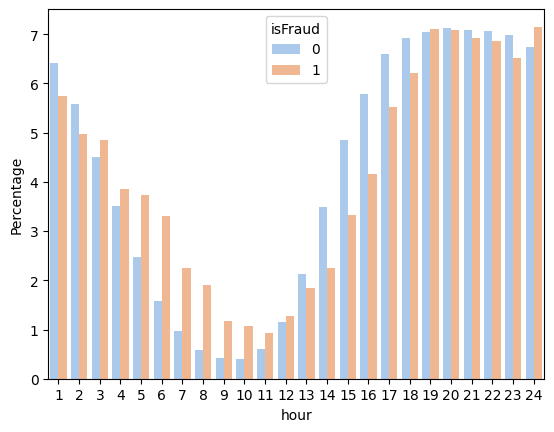

In [43]:
train_hour = (train_df.groupby(['isFraud'])['hour']
                     .value_counts(normalize = True)
                     .rename('Percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('hour'))
sns.barplot(x = "hour", y = "Percentage", hue = "isFraud", data = train_hour, palette = 'pastel')
plt.show();


We can see in the hour from 5 to 11 rate of fraud transaction is more.

From 13 to 18 rate of legit transaction is more.

With this analysis we can create a new feature.

In [44]:
def hourFeature(hour):
    if hour > 4 and hour < 12:
        return "highalert"
    if hour ==12 or hour==19:
        return "lowalert"
    if hour==3 or hour==4 or hour==24:
        return "mediumalert"
    else:
        return "noalert"

In [45]:
#Hour alert Features
train_df['hour_alertFeature'] = train_df['hour'].apply(hourFeature)

test_df['hour_alertFeature'] = test_df['hour'].apply(hourFeature)


**2.3 Transaction Amt**


It is a numerical feature.

This is the amount associated with each transaction in USD.

In [46]:
train_df['TransactionAmt'].dtype

dtype('float16')

In [47]:
train_df["TransactionAmt"].nunique()

8195

In [48]:
#no null values for TransactionAmt column
print(train_df["TransactionAmt"].isnull().sum())

print(test_df["TransactionAmt"].isnull().sum())

0
0


In [49]:
print(train_df['TransactionAmt'].describe())
print("********************************")
print(test_df['TransactionAmt'].describe())

count    590540.000000
mean               NaN
std                NaN
min           0.250977
25%          43.312500
50%          68.750000
75%         125.000000
max       31936.000000
Name: TransactionAmt, dtype: float64
********************************
count    506691.000000
mean               NaN
std                NaN
min           0.018005
25%          40.000000
50%          67.937500
75%         125.000000
max       10272.000000
Name: TransactionAmt, dtype: float64


In [50]:
filt = train_df['TransactionAmt'] == 31936.000000
train_df[filt]

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
274336        3261336        0        6652360         31936.0         W   
274339        3261339        0        6652391         31936.0         W   

        card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  \
274336  16075  514.0  150.0  mastercard  102.0  credit  205.0   87.0   27.0   
274339  16075  514.0  150.0  mastercard  102.0  credit  205.0   87.0   27.0   

        dist2 P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7  \
274336    NaN     yahoo.com           NaN  1.0  2.0  0.0  0.0  1.0  1.0  0.0   
274339    NaN     yahoo.com           NaN  1.0  2.0  0.0  0.0  1.0  1.0  0.0   

         C8   C9  C10  C11  C12  C13  C14   D1  D2   D3   D4   D5  D6  D7  D8  \
274336  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0 NaN NaN NaN   
274339  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0 NaN NaN NaN   

        D9  D10  D11  D12  D13  D14  D15 M1 M2 M3   M4   M5   M6 M7 M8 M9  \
274336 NaN  0.0  0.0  NaN  NaN  NaN  0.0  T  T  T  NaN  NaN  NaN  F  F  T   
274339 NaN  0.0  0.0  NaN  NaN  NaN  0.0  T  T  T  NaN  NaN  NaN  F  F  T   

         V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  \
274336  1.0  3.0  3.0  2.0  2.0  2.0  2.0  2.0  2.0  1.0  1.0  1.0  1.0  1.0   
274339  1.0  3.0  3.0  2.0  2.0  2.0  2.0  2.0  2.0  1.0  1.0  1.0  1.0  1.0   

        V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  \
274336  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   
274339  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   

        V29  V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  \
274336  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0  0.0  0.0  1.0  0.0   
274339  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0  0.0  0.0  1.0  0.0   

        V43  V44  V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  \
274336  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0   
274339  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0   

        V57  V58  V59  V60  V61  V62  V63  V64  V65  V66  V67  V68  V69  V70  \
274336  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0   
274339  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0   

        V71  V72  V73  V74  V75  V76  V77  V78  V79  V80  V81  V82  V83  V84  \
274336  0.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0  0.0  0.0  0.0  1.0  1.0  0.0   
274339  0.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0  0.0  0.0  0.0  1.0  1.0  0.0   

        V85  V86  V87  V88  V89  V90  V91  V92  V93  V94  V95  V96  V97  V98  \
274336  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
274339  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0   

        V99  V100  V101  V102  V103  V104  V105  V106  V107  V108  V109  V110  \
274336  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   
274339  0.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   

        V111  V112  V113  V114  V115  V116  V117  V118  V119  V120  V121  \
274336   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
274339   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

        V122  V123  V124  V125          V126          V127          V128  \
274336   1.0   1.0   1.0   1.0      0.000000      0.000000      0.000000   
274339   1.0   1.0   1.0   1.0  31937.390625  31937.390625  31937.390625   

        V129  V130  V131          V132          V133          V134  V135  \
274336   0.0   0.0   0.0      0.000000      0.000000      0.000000   0.0   
274339   0.0   0.0   0.0  31937.390625  31937.390625  31937.390625   0.0   

        V136  V137  V138  V139  V140  V141  V142  V143  V144  V145  V146  \
274336   0.0   0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
274339   0.0   0.0   NaN   NaN   NaN   NaN   NaN   NaN   

Observation:

1. In train data minimum transaction amount is 0.251 and maximum amount is 31936.

2. In test data minimum transaction amount is 0.018 and maximum amount equals 10270.0

3. Max value of train transaction Amt is much more than the test transaction Amt. May be some of outliers are there in the train data lets take a look into it.

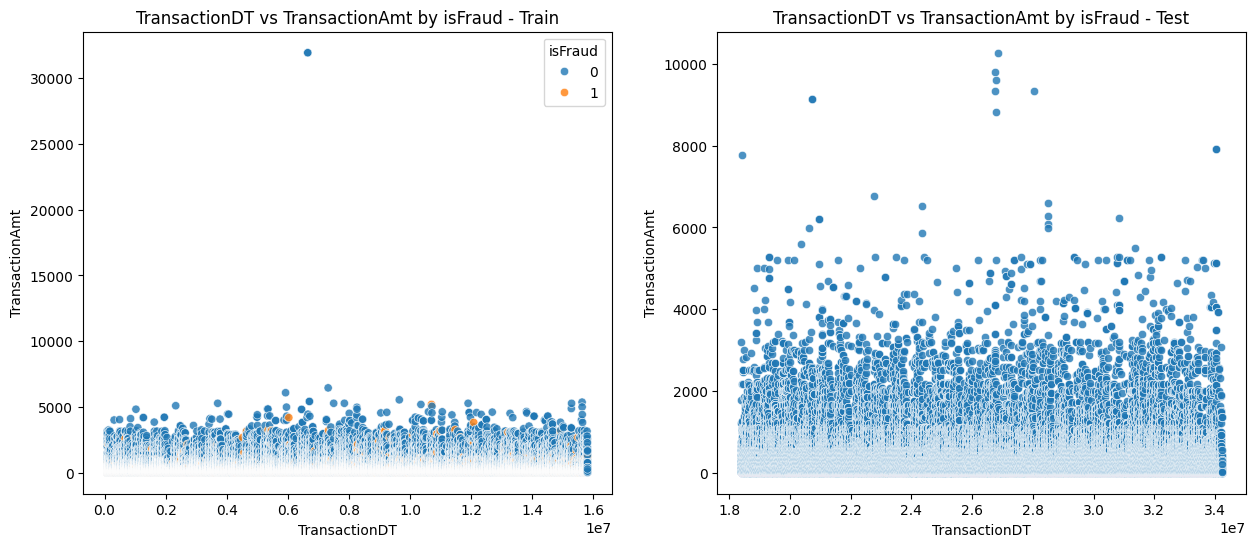

In [51]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
g1 = sns.scatterplot(x = "TransactionDT", y = "TransactionAmt", hue = "isFraud", data = train_df, alpha = 0.8, hue_order = [0,1])

plt.title('TransactionDT vs TransactionAmt by isFraud - Train')
plt.subplot(1,2,2)
sns.scatterplot(x = "TransactionDT",y="TransactionAmt", data=test_df, alpha=0.8, hue_order = [0,1])

plt.title('TransactionDT vs TransactionAmt by isFraud - Test')
plt.show()

In [52]:
#checking outliers datapoints
train_df[train_df.TransactionAmt > 30000]

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
274336        3261336        0        6652360         31936.0         W   
274339        3261339        0        6652391         31936.0         W   

        card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  \
274336  16075  514.0  150.0  mastercard  102.0  credit  205.0   87.0   27.0   
274339  16075  514.0  150.0  mastercard  102.0  credit  205.0   87.0   27.0   

        dist2 P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7  \
274336    NaN     yahoo.com           NaN  1.0  2.0  0.0  0.0  1.0  1.0  0.0   
274339    NaN     yahoo.com           NaN  1.0  2.0  0.0  0.0  1.0  1.0  0.0   

         C8   C9  C10  C11  C12  C13  C14   D1  D2   D3   D4   D5  D6  D7  D8  \
274336  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0 NaN NaN NaN   
274339  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0 NaN NaN NaN   

        D9  D10  D11  D12  D13  D14  D15 M1 M2 M3   M4   M5   M6 M7 M8 M9  \
274336 NaN  0.0  0.0  NaN  NaN  NaN  0.0  T  T  T  NaN  NaN  NaN  F  F  T   
274339 NaN  0.0  0.0  NaN  NaN  NaN  0.0  T  T  T  NaN  NaN  NaN  F  F  T   

         V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  \
274336  1.0  3.0  3.0  2.0  2.0  2.0  2.0  2.0  2.0  1.0  1.0  1.0  1.0  1.0   
274339  1.0  3.0  3.0  2.0  2.0  2.0  2.0  2.0  2.0  1.0  1.0  1.0  1.0  1.0   

        V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  \
274336  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   
274339  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   

        V29  V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  \
274336  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0  0.0  0.0  1.0  0.0   
274339  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0  0.0  0.0  1.0  0.0   

        V43  V44  V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  \
274336  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0   
274339  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0   

        V57  V58  V59  V60  V61  V62  V63  V64  V65  V66  V67  V68  V69  V70  \
274336  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0   
274339  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0   

        V71  V72  V73  V74  V75  V76  V77  V78  V79  V80  V81  V82  V83  V84  \
274336  0.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0  0.0  0.0  0.0  1.0  1.0  0.0   
274339  0.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0  0.0  0.0  0.0  1.0  1.0  0.0   

        V85  V86  V87  V88  V89  V90  V91  V92  V93  V94  V95  V96  V97  V98  \
274336  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
274339  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0   

        V99  V100  V101  V102  V103  V104  V105  V106  V107  V108  V109  V110  \
274336  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   
274339  0.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   

        V111  V112  V113  V114  V115  V116  V117  V118  V119  V120  V121  \
274336   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
274339   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

        V122  V123  V124  V125          V126          V127          V128  \
274336   1.0   1.0   1.0   1.0      0.000000      0.000000      0.000000   
274339   1.0   1.0   1.0   1.0  31937.390625  31937.390625  31937.390625   

        V129  V130  V131          V132          V133          V134  V135  \
274336   0.0   0.0   0.0      0.000000      0.000000      0.000000   0.0   
274339   0.0   0.0   0.0  31937.390625  31937.390625  31937.390625   0.0   

        V136  V137  V138  V139  V140  V141  V142  V143  V144  V145  V146  \
274336   0.0   0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
274339   0.0   0.0   NaN   NaN   NaN   NaN   NaN   NaN   

There are only two transactions with amount larger than $30,000 and they look like duplicated, thus we can remove them to avoid overfitting. (e.g. in tree-based models the leaf nodes might use them as samples)

Notice - We won't be removing the rows in test dataframe as it will be used to predict target varible Y.

In [53]:
#removing outliers from original train
train_df = train_df[train_df['TransactionAmt'] < 30000]

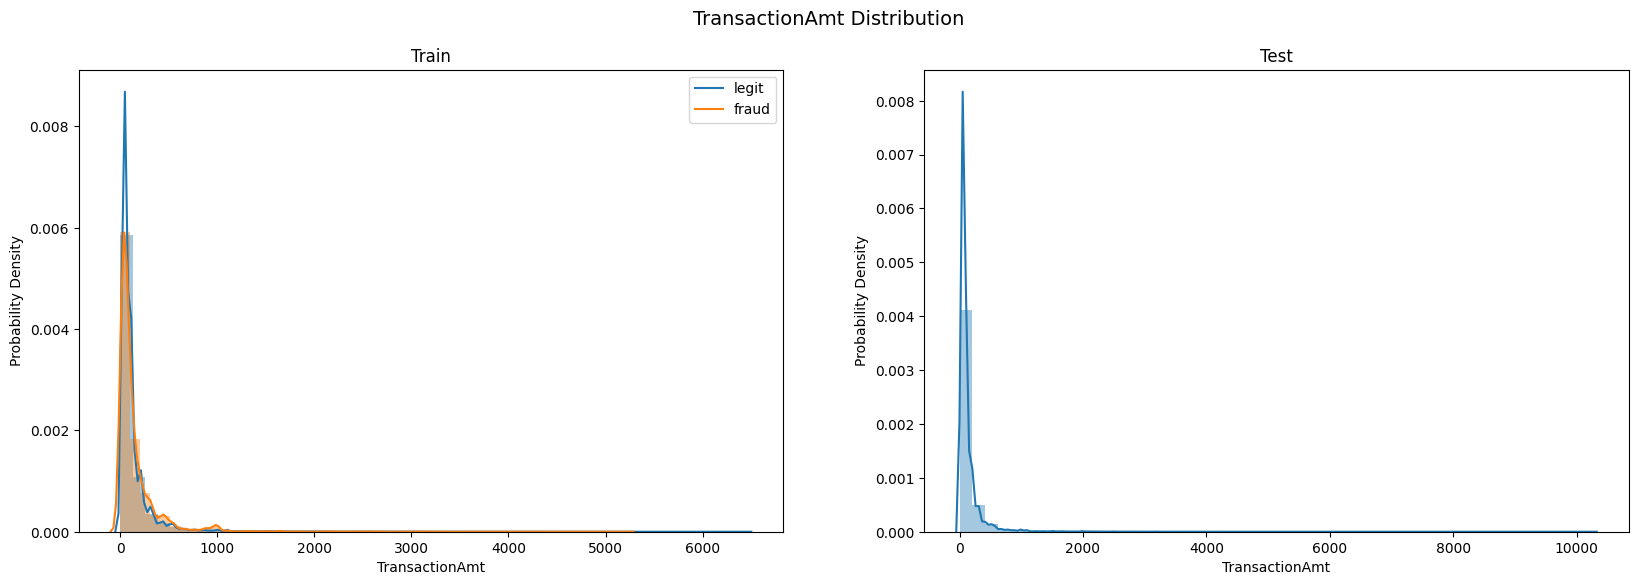

In [54]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)

sns.distplot(train_df[train_df['isFraud']==0]['TransactionAmt'])
sns.distplot(train_df[train_df['isFraud']==1]['TransactionAmt'])
plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])
plt.title('Train')

plt.suptitle('TransactionAmt Distribution' , fontsize = 14)


plt.subplot(1,2,2)

sns.distplot(test_df['TransactionAmt'])
plt.ylabel('Probability Density')
plt.title('Test')
plt.show()

Observations:

Most of the points in the train and test data for TransactionAmt are less than 10000

The distribution of the TransactionAmt is like a skewed distribution.

Due to the some extreme high values in TransactionAmt, we should take a log of this amount and create a new featue to better visualize it. Hence, lets take log of the TransactionAmt which might be like gaussion distribution.

In [55]:
train_df['LogTransactionAmt'] = np.log(train_df['TransactionAmt'])

test_df['LogTransactionAmt'] = np.log(test_df['TransactionAmt'])

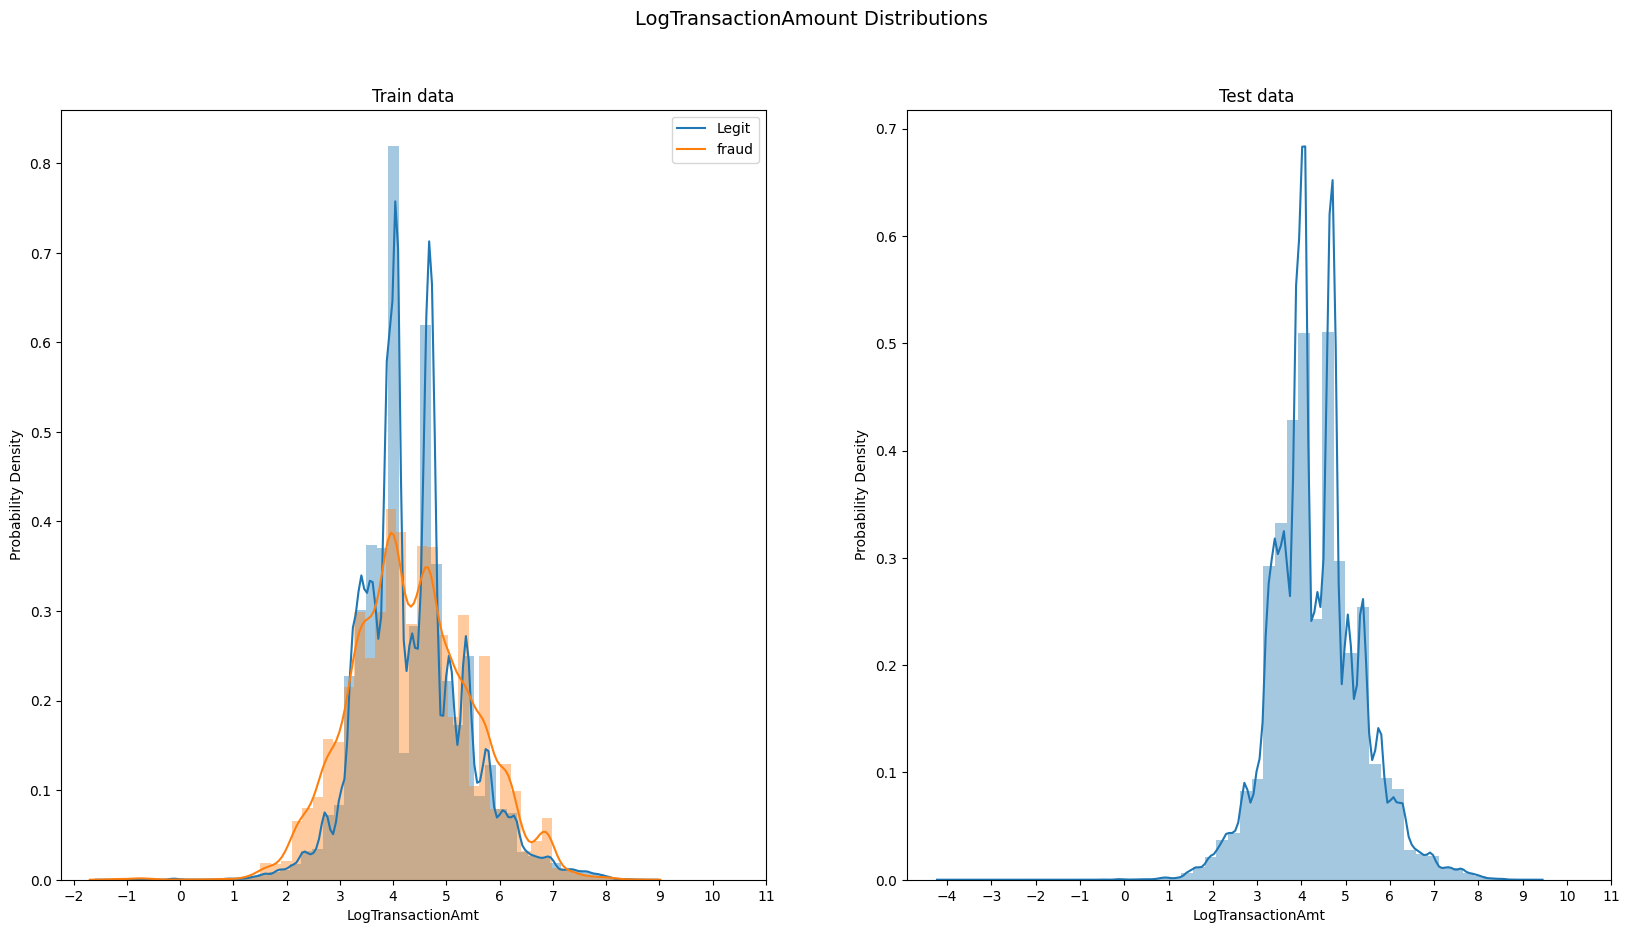

In [56]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)

sns.distplot(train_df[train_df['isFraud'] == 0]['LogTransactionAmt'])
sns.distplot(train_df[train_df['isFraud'] == 1]['LogTransactionAmt'])

plt.xticks(np.arange(-2, 12, 1))

plt.ylabel('Probability Density')
plt.legend(['Legit','fraud'])
plt.title('Train data')

plt.suptitle('LogTransactionAmount Distributions' , fontsize = 14)


plt.subplot(1,2,2)

sns.distplot(test_df['LogTransactionAmt'])
plt.xticks(np.arange(-4, 12, 1))
plt.ylabel('Probability Density')
plt.title('Test data ')

plt.show();


Observations:

Log of TransactionAmt has more separating power than transactionAmt.

As we can see that plot overlaps but logTransactionAmt after 5.3 and before 3 have higher frequency being fraudulent.

And logTransactionAmt from 3 to 5.3 have higher chance it is legit transaction.

**2.4 Product CD**

This is a categorical variable.

This is the product code associated with each transaction.

In [57]:
train_df["ProductCD"].dtype

dtype('O')

In [58]:
train_df["ProductCD"].nunique()

5

In [59]:
print(train_df["ProductCD"].isnull().sum())
print(test_df["ProductCD"].isnull().sum())

0
0


In [60]:
train_df["ProductCD"].value_counts()

ProductCD
W    439668
C     68519
R     37699
H     33024
S     11628
Name: count, dtype: int64

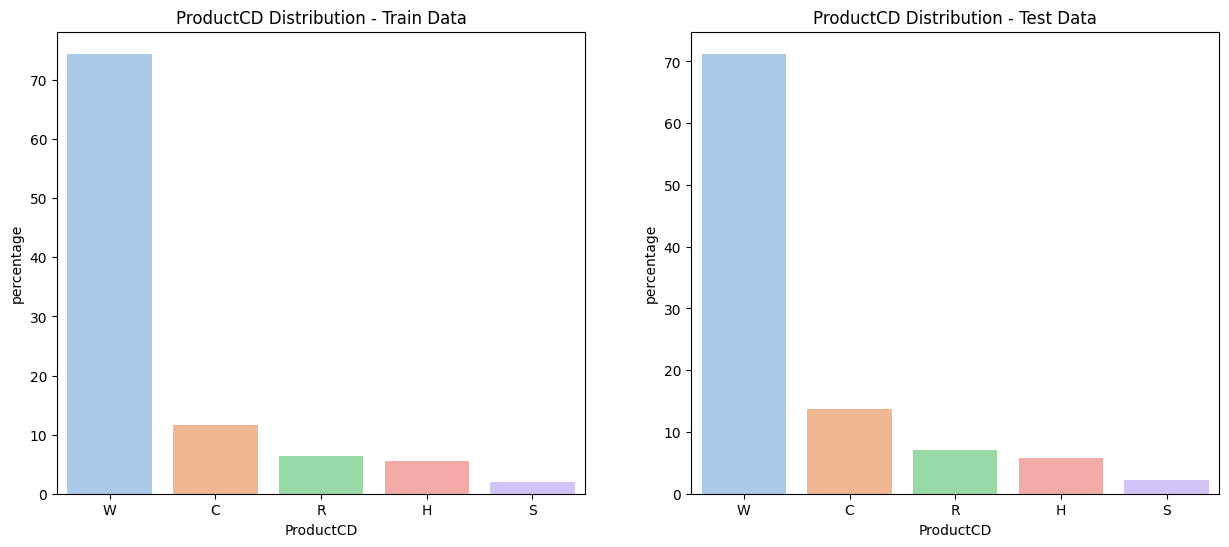

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

# Train Dataset Distribution
plt.subplot(1, 2, 1)
train_ProductCD = train_df['ProductCD'].dropna().value_counts(normalize=True).mul(100).rename_axis('ProductCD').reset_index(name='percentage')
sns.barplot(x="ProductCD", y="percentage", data=train_ProductCD, palette='pastel')
plt.title("ProductCD Distribution - Train Data")

# Test Dataset Distribution
plt.subplot(1, 2, 2)
test_ProductCD = test_df['ProductCD'].dropna().value_counts(normalize=True).mul(100).rename_axis('ProductCD').reset_index(name='percentage')
sns.barplot(x="ProductCD", y="percentage", data=test_ProductCD, palette='pastel')
plt.title("ProductCD Distribution - Test Data")

plt.show()


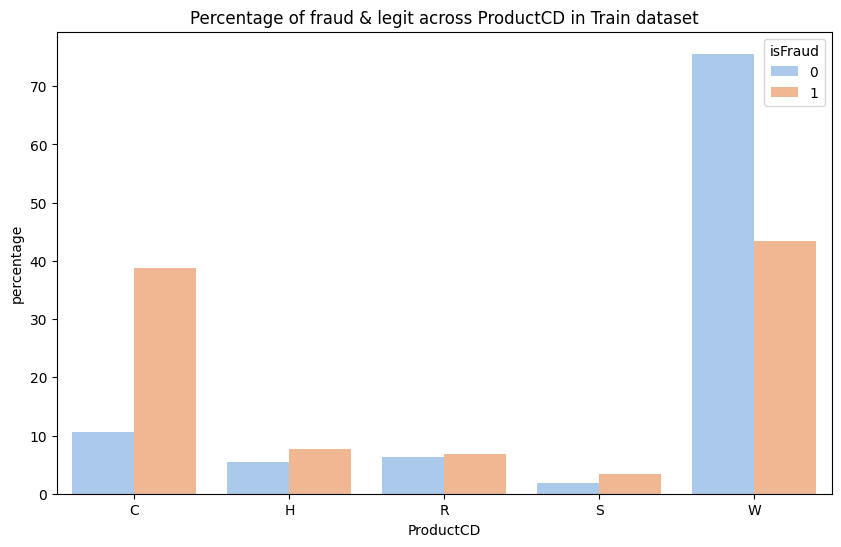

In [62]:
plt.figure(figsize = (10,6))

train_ProductCD = (train_df.groupby(['isFraud'])['ProductCD'].value_counts(normalize = True).rename('percentage').mul(100).reset_index().sort_values('ProductCD'))

sns.barplot(x = "ProductCD", y = "percentage", hue = "isFraud", data = train_ProductCD, palette = 'pastel')

plt.title('Percentage of fraud & legit across ProductCD in Train dataset')

plt.show();


Observations:

From the graph above we can see that if the transaction is fraudulent, there is around 40% chance it's Product C.Considering that only 10% are Legit transaction in C, chances of transaction being fraudent are high if it belongs to product C.

Majority of the transactions have been done for the ProductCD "W" in both train and test datasets.

Transactions whose productCD is C,H,R,S are more likely to be fraudulent transactions

Even though, the no. of transactions having ProductCD "C" are too less as compared to the number of transactions having ProductCD "W", the number of fraudulent transactions are almost similar in both the categories

**2.5 Card1 - Card6**

It is given that these features are categorical. Even though some appear numeric

These features represents payment card information, such as card type, card category, issue bank, country, etc.

In [63]:
#card feature data types
card_features = ['card1','card2','card3','card4','card5','card6']
for i in card_features:

  print(train_df[i].dtype)

int16
float16
float16
object
float16
object


In [64]:
#null values check
train_df[["card1","card2","card3","card4","card5","card6"]].isnull().sum()

card1       0
card2    8933
card3    1565
card4    1577
card5    4259
card6    1571
dtype: int64

In [65]:
#card values
cards = [col for col in train_df.columns if 'card' in col]
train_df[cards].head()

card1  card2  card3       card4  card5   card6
0  13926    NaN  150.0    discover  142.0  credit
1   2755  404.0  150.0  mastercard  102.0  credit
2   4663  490.0  150.0        visa  166.0   debit
3  18132  567.0  150.0  mastercard  117.0   debit
4   4497  514.0  150.0  mastercard  102.0  credit

In [66]:
#unique value count
for col in cards:
    print( col+'  : ' + str(train_df[col].nunique()))

card1  : 13553
card2  : 500
card3  : 114
card4  : 4
card5  : 119
card6  : 4


In [67]:
for col in ['card2','card3','card4','card5','card6']:
    train_df[col] = train_df.groupby(['card1'])[col].transform(lambda x: x.mode(dropna=False).iat[0])
    train_df[col].fillna(train_df[col].mode()[0], inplace = True)
    print(col+' feature has : '+str(train_df[col].isnull().sum())+' missing values')

card2 feature has : 0 missing values
card3 feature has : 0 missing values
card4 feature has : 0 missing values
card5 feature has : 0 missing values
card6 feature has : 0 missing values


In [68]:

#CARD1
print(train_df["card1"].describe())
print("**************************")
print(test_df["card1"].describe())

count    590538.000000
mean       9898.713741
std        4901.165273
min        1000.000000
25%        6019.000000
50%        9678.000000
75%       14182.750000
max       18396.000000
Name: card1, dtype: float64
**************************
count    506691.000000
mean       9957.222175
std        4884.960969
min        1001.000000
25%        6019.000000
50%        9803.000000
75%       14276.000000
max       18397.000000
Name: card1, dtype: float64


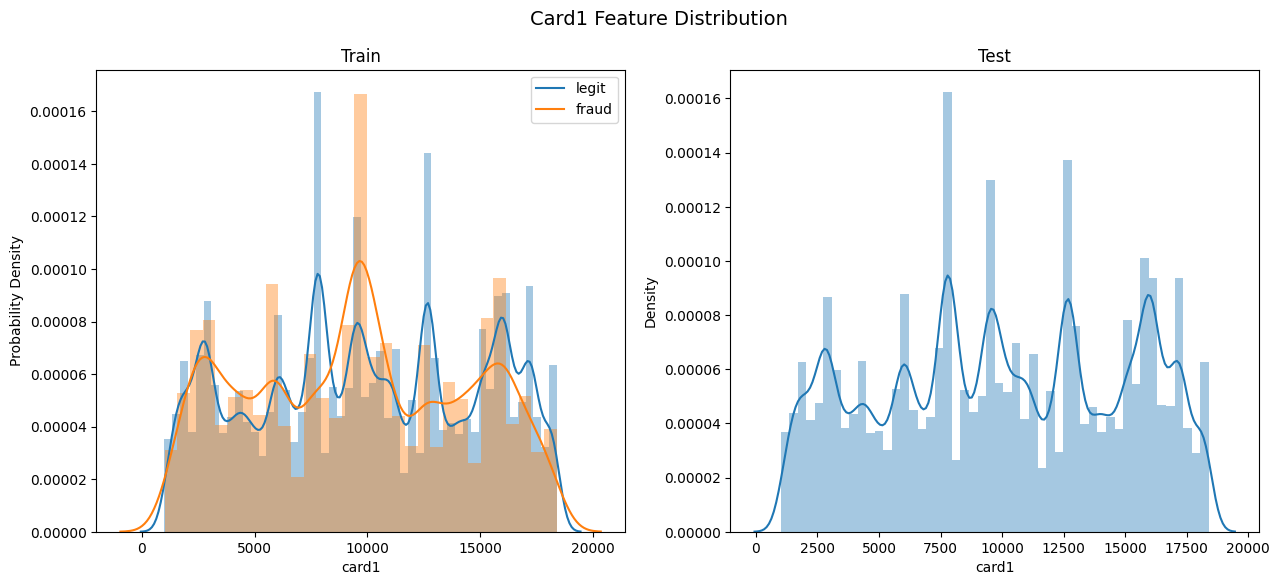

In [69]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)

sns.distplot(train_df[train_df['isFraud'] == 0]['card1'])
sns.distplot(train_df[train_df['isFraud'] == 1]['card1'])

plt.ylabel('Probability Density')
plt.title('Train')
plt.legend(['legit','fraud'])

plt.suptitle('Card1 Feature Distribution' , fontsize = 14)


plt.subplot(1,2,2)
sns.distplot(test_df['card1'])
plt.title('Test')
plt.show()

In [70]:
#CARD2
print(train_df["card2"].describe())
print("**************************")
print(test_df["card2"].describe())

count    590538.0
mean          NaN
std           NaN
min         100.0
25%         215.0
50%         360.0
75%         512.0
max         600.0
Name: card2, dtype: float64
**************************
count    498037.0
mean          NaN
std           NaN
min         100.0
25%         207.0
50%         369.0
75%         512.0
max         600.0
Name: card2, dtype: float64


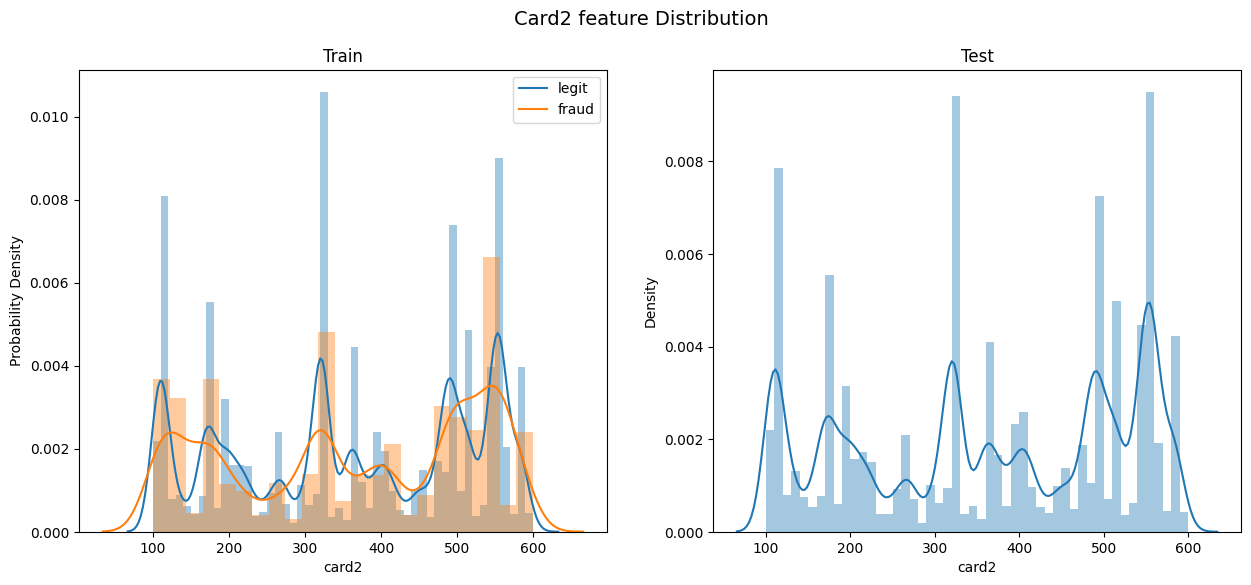

In [71]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)

sns.distplot(train_df[(train_df['isFraud'] == 0) & (~train_df['card2'].isnull())]['card2'])
sns.distplot(train_df[(train_df['isFraud'] == 1) & (~train_df['card2'].isnull())]['card2'])

plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])
plt.title('Train')

plt.suptitle('Card2 feature Distribution' , fontsize = 14)

plt.subplot(1,2,2)
sns.distplot(test_df[~test_df['card2'].isnull()]['card2'])
plt.title('Test')

plt.show();

In [72]:
#CARD3
print(train_df["card3"].describe())
print("**************************")
print(test_df["card3"].describe())

count    590538.0
mean          NaN
std           0.0
min         100.0
25%         150.0
50%         150.0
75%         150.0
max         231.0
Name: card3, dtype: float64
**************************
count    503689.0
mean          NaN
std           0.0
min         100.0
25%         150.0
50%         150.0
75%         150.0
max         232.0
Name: card3, dtype: float64


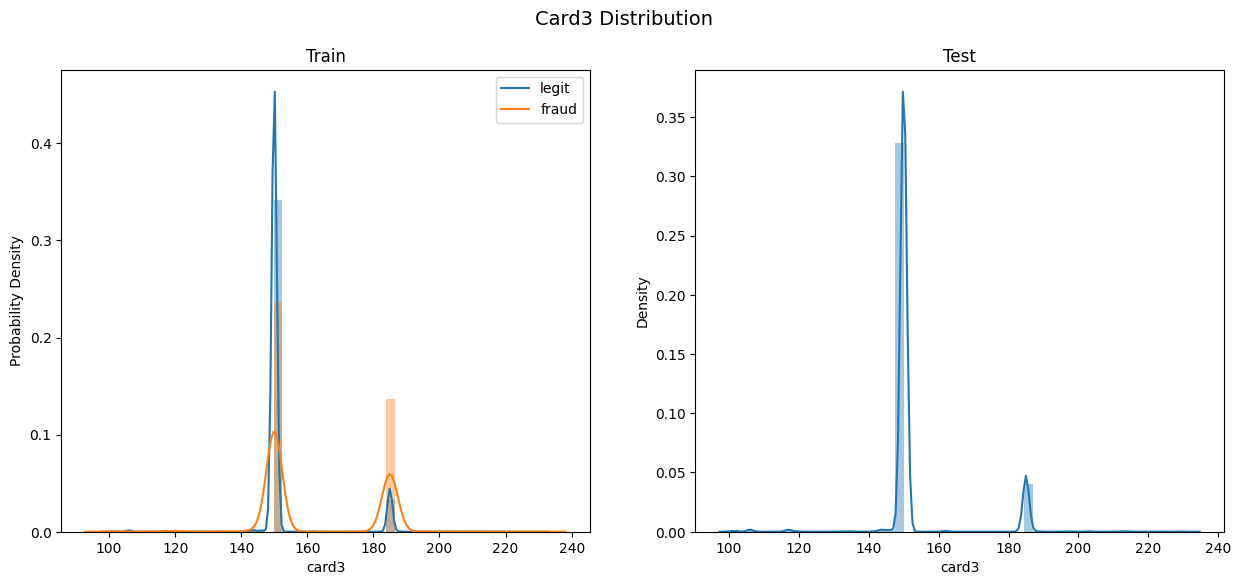

In [73]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)

sns.distplot(train_df[(train_df['isFraud'] == 0) & (~train_df['card3'].isnull())]['card3'])
sns.distplot(train_df[(train_df['isFraud'] == 1) & (~train_df['card3'].isnull())]['card3'])

plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])

plt.title('Train')

plt.suptitle('Card3 Distribution', fontsize = 14)

plt.subplot(1,2,2)
sns.distplot(test_df[~test_df['card3'].isnull()]['card3'])
plt.title('Test')

plt.show()

Observations:

It can be found that card3 contains only majority of 2 values only.

And if the value is greater than 150 around the probability of transaction being fraud increases found by the describe function.

We can create another feature like if the value is greater than 160 marked it as T/P(means fraud) otherwise F.

In [74]:
def new_card3(row):
    if row == np.nan:
        return row
    else:

        if row > 160:
            return 'Positive'
        else:
            return 'Negative'

train_df['new_card3'] = train_df['card3'].apply(new_card3)
test_df['new_card3'] = train_df['card3'].apply(new_card3)

In [75]:
train_df['card4'].value_counts()

card4
visa                385816
mastercard          189723
american express      8328
discover              6671
Name: count, dtype: int64

In [76]:
train_df['card4'].unique()

array(['discover', 'mastercard', 'visa', 'american express'], dtype=object)

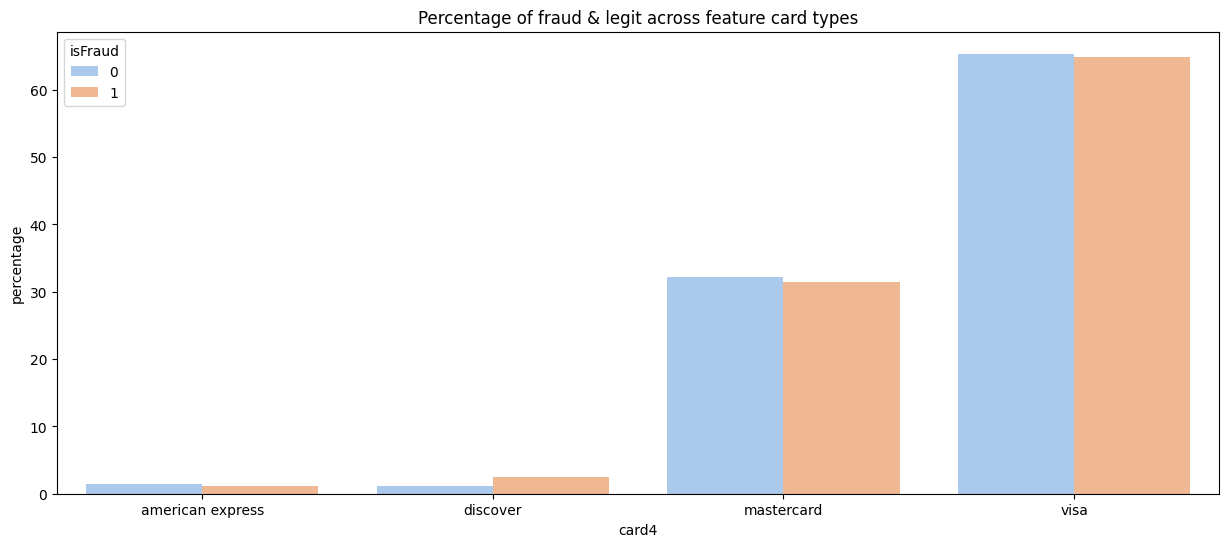

In [77]:
#card 4
plt.figure(figsize = (15, 6))
train_card4 = (train_df[~train_df['card4'].isnull()].groupby(['isFraud'])['card4'].value_counts(normalize = True).rename('percentage').mul(100).reset_index().sort_values('card4'))
sns.barplot(x = "card4", y = "percentage", hue = "isFraud", data = train_card4, palette = 'pastel')

plt.title('Percentage of fraud & legit across feature card types')

plt.show()

Observation:

Most of the transaction happend through visa card type and master card

One observation is that in fraud transaction - uses of card discover is more than the legit transaction.

Otherwise other cards are relatively having almost same frquency.

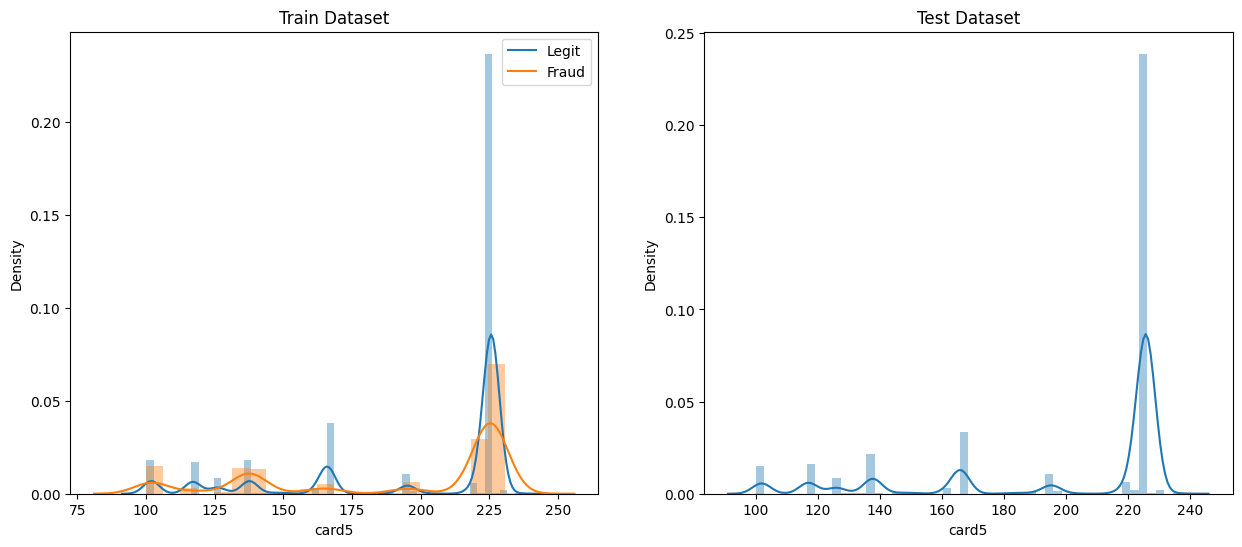

In [78]:
#card 5

plt.figure(figsize = (15,6))

plt.subplot(1,2,1)

sns.distplot(train_df[(train_df['isFraud'] == 0) & (~train_df['card5'].isnull())]['card5'])
sns.distplot(train_df[(train_df['isFraud'] == 1) & (~train_df['card5'].isnull())]['card5'])

plt.legend(['Legit','Fraud'])
plt.title('Train Dataset')

plt.subplot(1,2,2)

sns.distplot(test_df[~test_df['card5'].isnull()]['card5'])
plt.title('Test Dataset')

plt.show();

Observation:

There is a overlaps but in some intervals range the frquency is high for fraud and in some intervals frequency for legit transactions is high.

Card5 feature shows periodic nature but the frequency of points whose values lies near 220 are very high.

In [79]:
#card6

train_df["card6"].value_counts()

card6
debit              440829
credit             149666
debit or credit        40
charge card             3
Name: count, dtype: int64

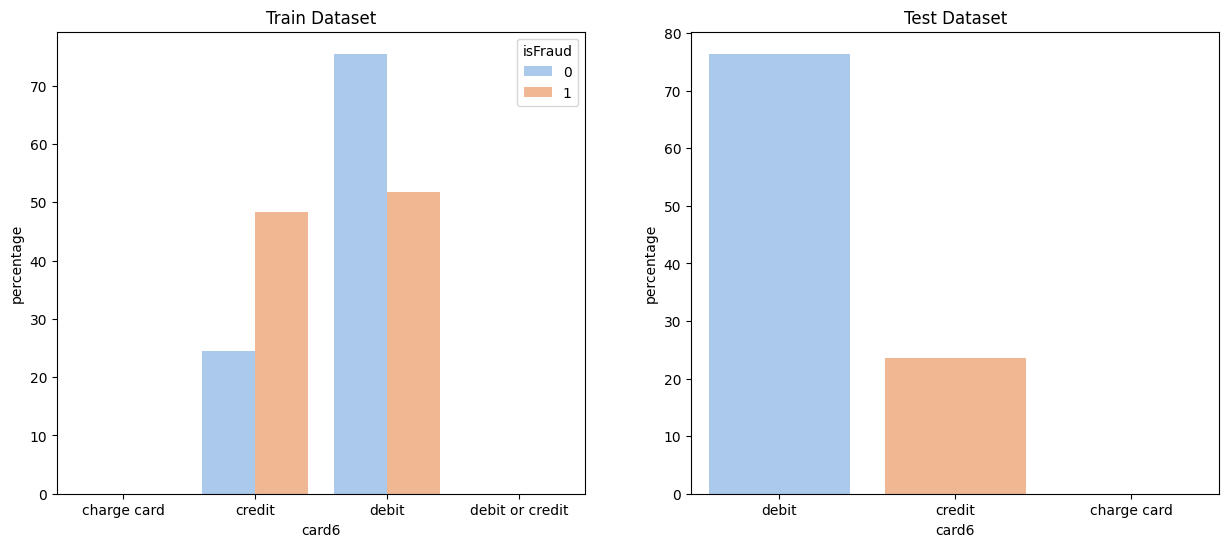

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

# Train Dataset
plt.subplot(1, 2, 1)
train_card6 = (train_df[~train_df['card6'].isnull()]
               .groupby(['isFraud'])['card6']
               .value_counts(normalize=True)
               .rename('percentage')
               .mul(100)
               .reset_index()
               .sort_values('card6'))

sns.barplot(x="card6", y="percentage", hue="isFraud", data=train_card6, palette='pastel')
plt.title('Train Dataset')

# Test Dataset
plt.subplot(1, 2, 2)
test_card6 = (test_df[~test_df['card6'].isnull()]
              ['card6']
              .value_counts(normalize=True)
              .mul(100)
              .reset_index())
test_card6.columns = ['card6', 'percentage']  # ✅ Rename columns to match train dataset

sns.barplot(x="card6", y="percentage", data=test_card6, palette='pastel')
plt.title('Test Dataset')

plt.show()


Observations:

Debit or credit and charge card are almost 0% in the dataset. And no "debit or credit" in test data set.

Lets combine them in to other majority class card category.

Credit card transactions tends to have more fraudulent transaction then the debit card holders.

In [81]:
def replacetodbcard(row):
    if row == np.nan:
        return row
    if row == 'debit or credit' or row == 'charge card':
        return 'debit'
    else:
        return row

In [82]:

train_df['card6'] = train_df['card6'].apply(replacetodbcard)
test_df['card6'] = test_df['card6'].apply(replacetodbcard)

Observation

card1, card2, card3 and card5 are encoded as a numerical categorical variable and their real meaning is not that clear just by seeing the values. and card 1 has more no. of unique values.

card4 feature corresponds to the type of card whereas card6 feature corresponds to the card company. Majority of card holders use "debit" cards and the most used companies are "visa" and "mastercard".

The percentage of fraud is higher with the "credit" cards than any other card

**2.6 addr1,addr2**

The data description states that these are categorical even though they look numeric. This feature is giving address information.

addr1 is the billing region(zip code).

addr2 is the billing country.

Both the address are for the purchaser.

In [83]:
address = ['addr1','addr2']

In [84]:

for i in address:
    print(train_df[i].dtype)

float16
float16


In [85]:
#checking for null values
print(' addr1 - has {} Null values'.format(train_df['addr1'].isnull().sum()))
print(' addr2 - has {} Null values'.format(train_df['addr2'].isnull().sum()))

 addr1 - has 65706 Null values
 addr2 - has 65706 Null values


In [86]:
print('There are %d regions in addr1 for Train data' % len(train_df['addr1'].value_counts()))
print(train_df['addr1'].value_counts().head(4))

print('There are %d regions in addr1 for Test data' % len(test_df['addr1'].value_counts()))
print(test_df['addr1'].value_counts().head(4))

There are 332 regions in addr1 for Train data
addr1
299.0    46335
325.0    42751
204.0    42020
264.0    39870
Name: count, dtype: int64
There are 292 regions in addr1 for Test data
addr1
299.0    38710
204.0    35049
325.0    34151
264.0    32710
Name: count, dtype: int64


In [87]:
print("Train description\n", train_df['addr1'].describe())

print("*************************")

print("Test description\n", test_df['addr1'].describe())

Train description
 count    524832.0
mean          NaN
std           NaN
min         100.0
25%         204.0
50%         299.0
75%         330.0
max         540.0
Name: addr1, dtype: float64
*************************
Test description
 count    441082.0
mean          NaN
std           NaN
min         100.0
25%         204.0
50%         299.0
75%         330.0
max         540.0
Name: addr1, dtype: float64


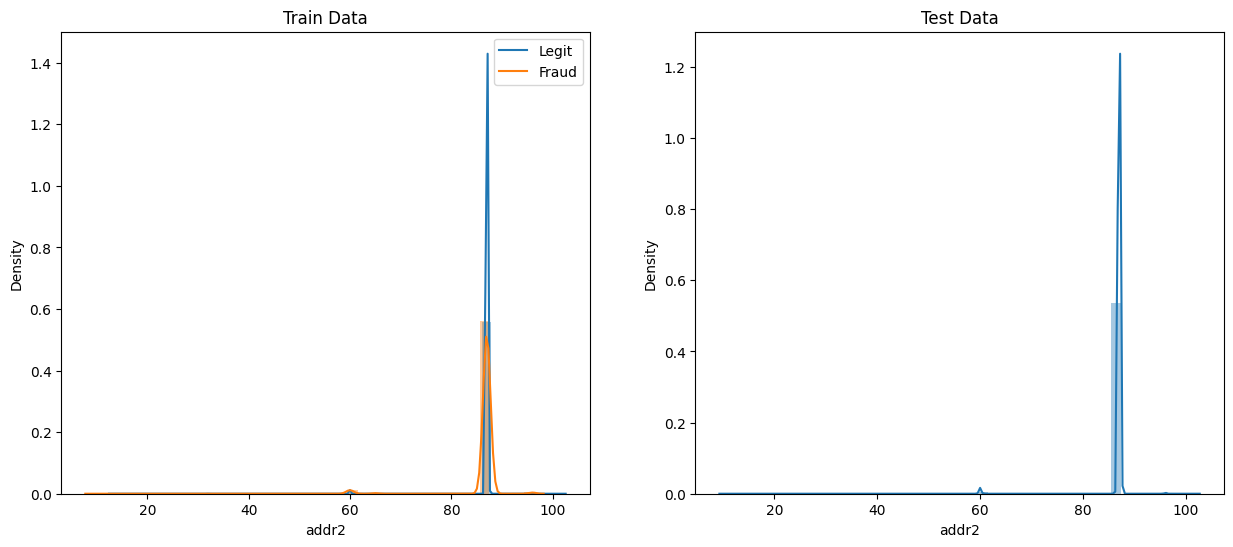

In [88]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)

sns.distplot(train_df[(train_df['isFraud'] == 0) & (~train_df['addr2'].isnull())]['addr2'])
sns.distplot(train_df[(train_df['isFraud'] == 1) & (~train_df['addr2'].isnull())]['addr2'] )

plt.legend(['Legit','Fraud'])
plt.title('Train Data')

plt.subplot(1,2,2)

sns.distplot(test_df[~test_df['addr2'].isnull()]['addr2'])

plt.title('Test Data')
plt.show()

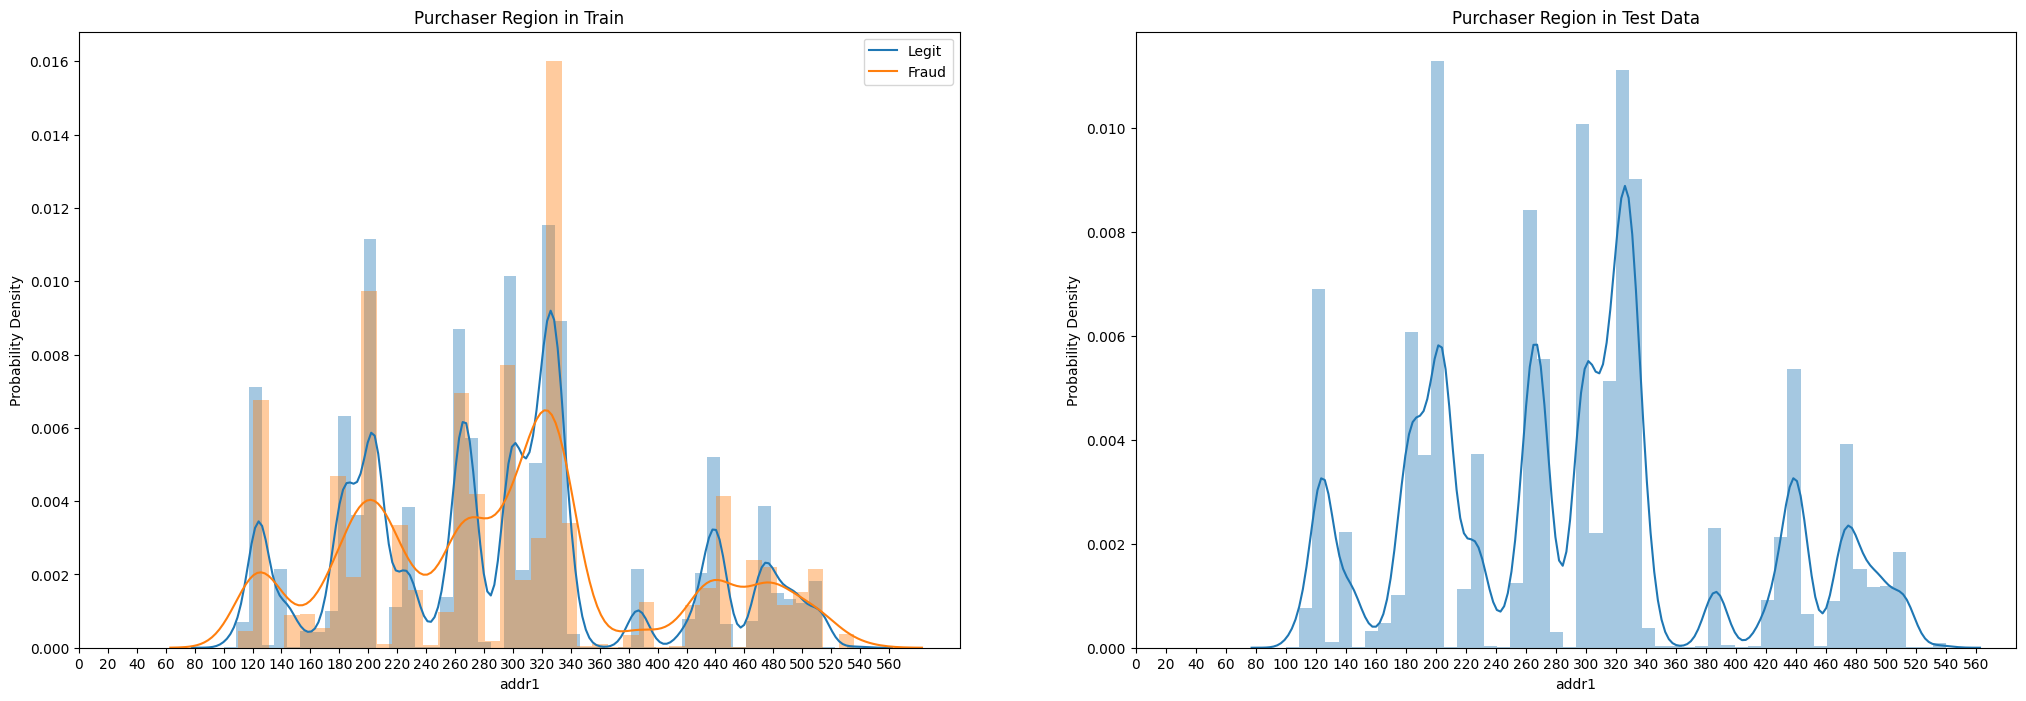

In [89]:
plt.figure(figsize = (25,8))

plt.subplot(1,2,1)

sns.distplot(train_df[(train_df['isFraud'] == 0) & (~train_df['addr1'].isnull())]['addr1'])
sns.distplot(train_df[(train_df['isFraud'] == 1) & (~train_df['addr1'].isnull())]['addr1'])

plt.legend(['Legit','Fraud'])

plt.xticks(np.arange(0, 580, 20))

plt.ylabel('Probability Density')
plt.title('Purchaser Region in Train')

plt.subplot(1,2,2)

sns.distplot(test_df[~test_df['addr1'].isnull()]['addr1'])

plt.xticks(np.arange(0, 580, 20))
plt.ylabel('Probability Density')
plt.title('Purchaser Region in Test Data')

plt.show();

Observation:

330-340 seems have higher frequency of fraud.

In some regions fraud transactions happened more and in some other regions legit transactions happened more. So this would be an important feature in classification.

In [90]:
print('There are %d billing countries in addr2 of Train & the country 87 accounts for %.3f%%' % (len(train_df['addr2'].value_counts()), train_df['addr2'].value_counts().values[0] / len(train_df['addr2'])*100))
print(train_df['addr2'].value_counts().head(4))

print("*"*50)

print('There are %d billing countries in addr2 of Test. And the country 87 accounts for  %.3f%%' % (len(test_df['addr2'].value_counts()), test_df['addr2'].value_counts().values[0] / len(test_df['addr2'])*100))

print(test_df['addr2'].value_counts().head(4))

There are 74 billing countries in addr2 of Train & the country 87 accounts for 88.136%
addr2
87.0    520479
60.0      3084
96.0       638
32.0        91
Name: count, dtype: int64
**************************************************
There are 72 billing countries in addr2 of Test. And the country 87 accounts for  86.035%
addr2
87.0    435934
60.0      4041
96.0       608
32.0        61
Name: count, dtype: int64


In [91]:
print("Train description", train_df['addr2'].describe())

print("*************************")

print("Test description",test_df['addr2'].describe())

Train description count    524832.0
mean          NaN
std           0.0
min          10.0
25%          87.0
50%          87.0
75%          87.0
max         102.0
Name: addr2, dtype: float64
*************************
Test description count    441082.0
mean          NaN
std           0.0
min          10.0
25%          87.0
50%          87.0
75%          87.0
max         102.0
Name: addr2, dtype: float64


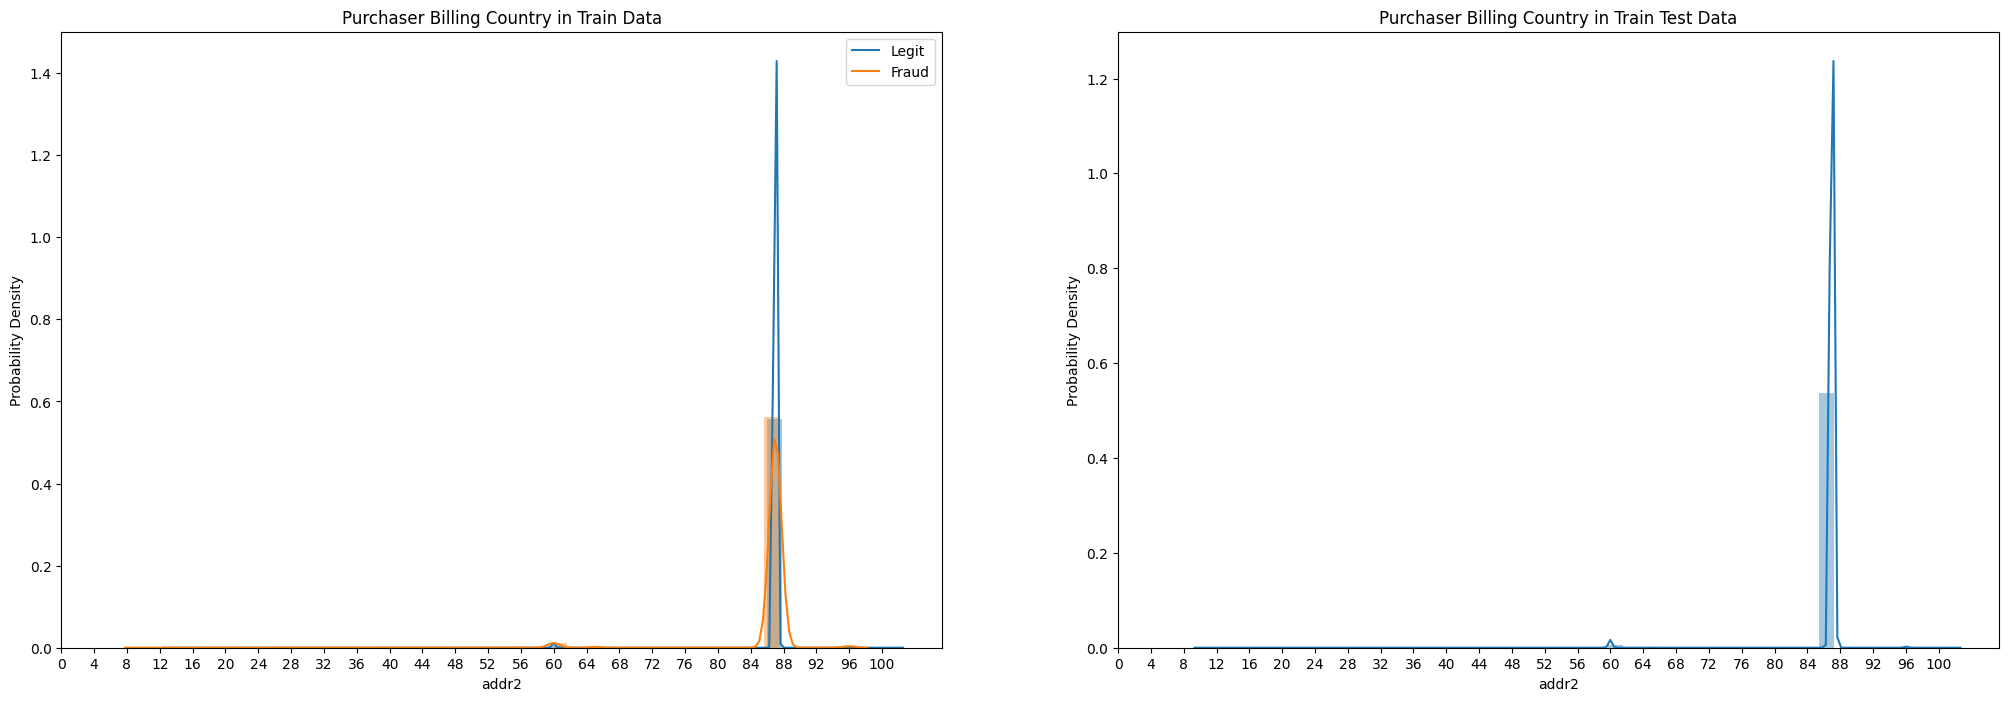

In [92]:
plt.figure(figsize = (25, 8))

plt.subplot(1,2,1)

sns.distplot(train_df[(train_df['isFraud'] == 0) & (~train_df['addr2'].isnull())]['addr2'])
sns.distplot(train_df[(train_df['isFraud'] == 1) & (~train_df['addr2'].isnull())]['addr2'])

plt.legend(['Legit','Fraud'])

plt.xticks(np.arange(0, 102, 4))

plt.ylabel('Probability Density')
plt.title('Purchaser Billing Country in Train Data')


plt.subplot(1,2,2)
sns.distplot(test_df[~test_df['addr2'].isnull()]['addr2'])
plt.xticks(np.arange(0, 102, 4))

plt.ylabel('Probability Density')
plt.title('Purchaser Billing Country in Train Test Data')

plt.show();

Observations:

addr1 feature corresponds to the city zip code but its value is encoded.

Majority transactions happened in the country whose code lies between 80 - 100 for both legit and fraud transactions and test and train data.

It is conclude that zip code is spread across all the values BUT most of the time country code value stick to a particular value, most of the transactions are from single country only.

**2.7 dist1,dist2**

This is the numerical data

Distance - "distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.”

In [93]:
distance = ['dist1','dist2']

In [95]:
for i in distance:
    print(train_df[i].dtype)

float16
float16


In [96]:
print(train_df['dist1'].describe())
print("============================")
print(train_df['dist2'].describe())

count    238267.0
mean          NaN
std           NaN
min           0.0
25%           3.0
50%           8.0
75%          24.0
max       10288.0
Name: dist1, dtype: float64
count    37627.0
mean         inf
std          inf
min          0.0
25%          7.0
50%         37.0
75%        206.0
max      11624.0
Name: dist2, dtype: float64


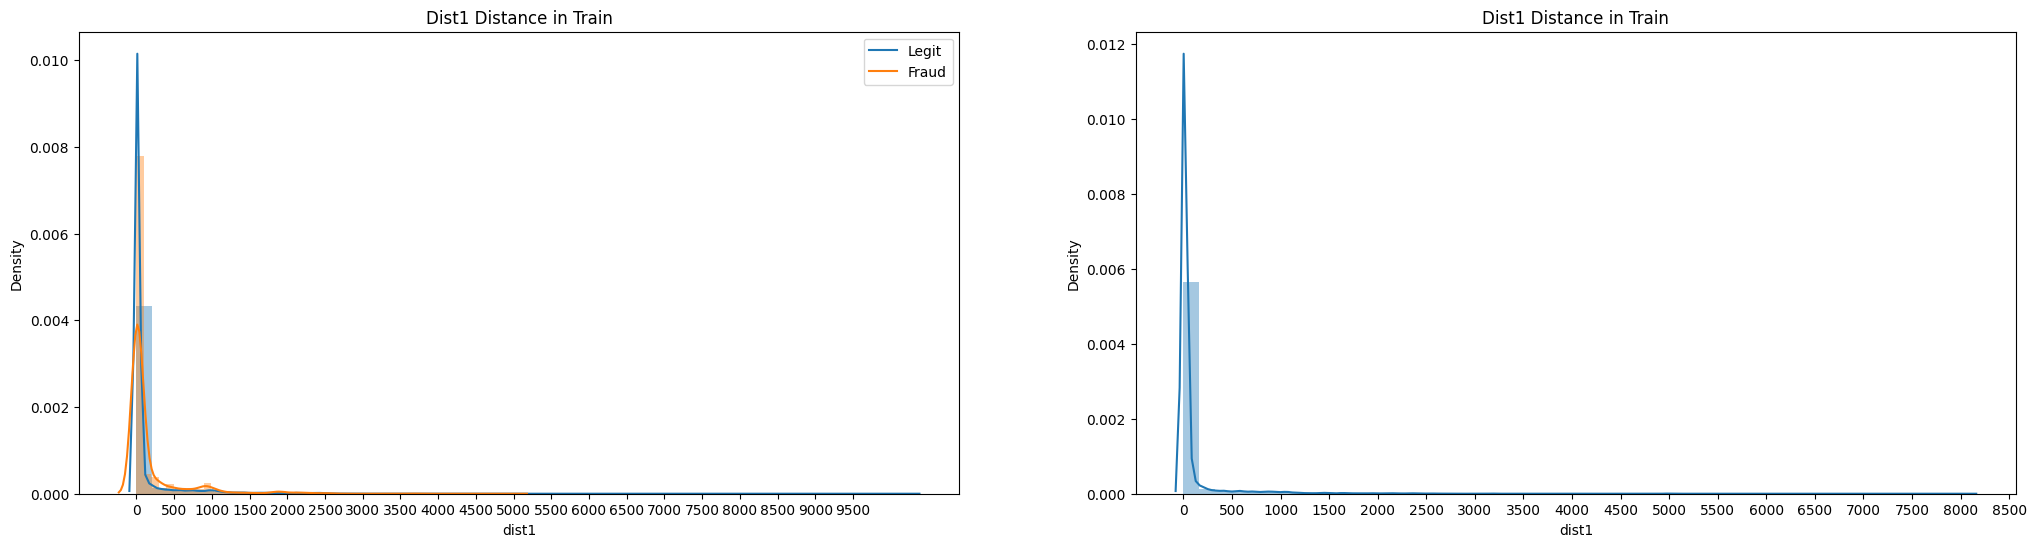

In [97]:
plt.figure(figsize = (25,6))
plt.subplot(1,2,1)
sns.distplot(train_df[(train_df['isFraud'] == 0) & (~train_df['dist1'].isnull())]['dist1'])

sns.distplot(train_df[(train_df['isFraud'] == 1) & (~train_df['dist1'].isnull())]['dist1'])

plt.legend(['Legit','Fraud'])

plt.xticks(np.arange(0, 10000, 500))
plt.title('Dist1 Distance in Train')

plt.subplot(1,2,2)
plt.xticks(np.arange(0, 10000, 500))
plt.title('Dist1 Distance in Train')
sns.distplot(test_df[~test_df['dist1'].isnull()]['dist1'])
plt.show();

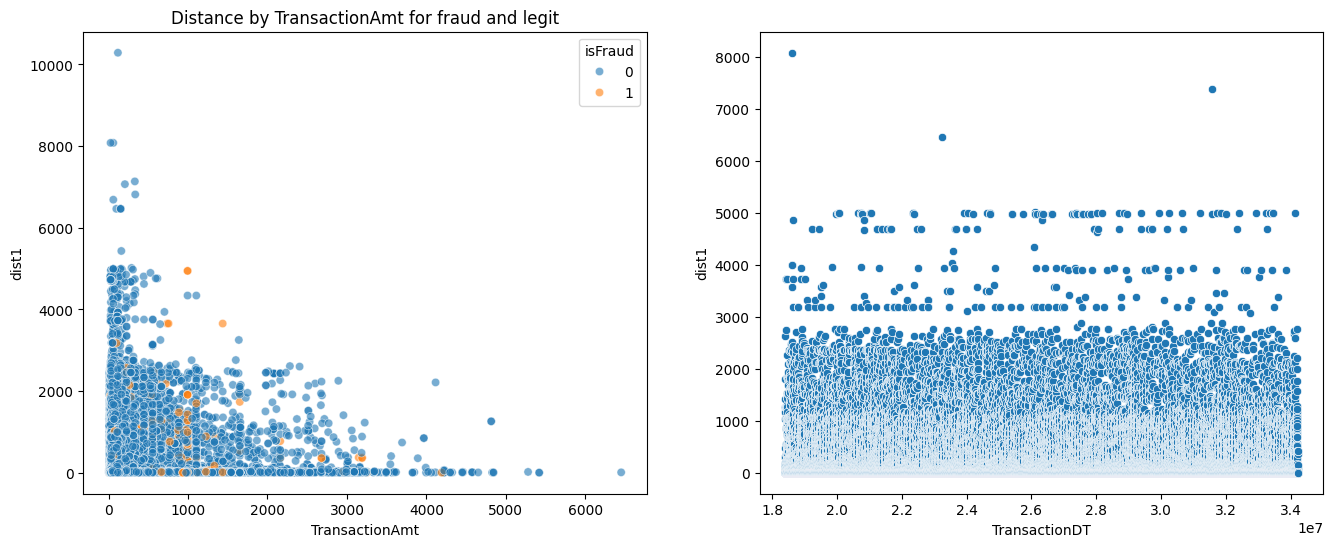

In [98]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)

sns.scatterplot(x = "TransactionAmt", y = "dist1", hue = "isFraud",data=train_df[~train_df['dist1'].isnull()], alpha = 0.6, hue_order = [0,1])
plt.title('Distance by TransactionAmt for fraud and legit')

plt.subplot(1,2,2)
sns.scatterplot(x = "TransactionDT", y = "dist1", data=test_df[~test_df['dist1'].isnull()])
plt.show()

It's clear that observations dist1 > 6000 are outliers in Train so let's remove them

In [100]:
train_df.drop(train_df[train_df['dist1'] > 6000].index, axis=0, inplace = True)

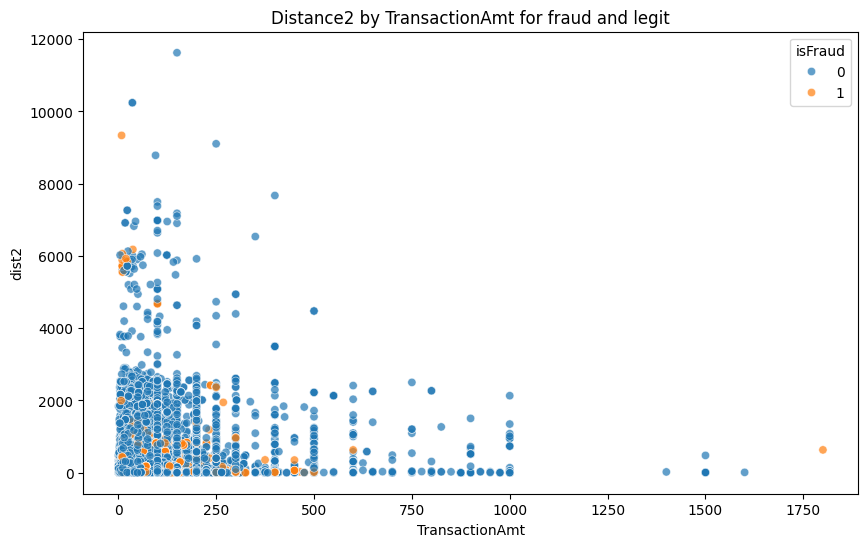

In [101]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "TransactionAmt", y = "dist2", hue = "isFraud", data = train_df[~train_df['dist2'].isnull()], alpha = 0.7, hue_order = [0,1])
plt.title('Distance2 by TransactionAmt for fraud and legit')
plt.show()

It's clear that observations dist2 > 8000 are outliers in Train so let's remove them

In [102]:
train_df.drop(train_df[train_df['dist2'] > 8000].index, axis=0, inplace=True)


**2.8 P_email domain and R_email domain**

This is the categorical variable.

Email domain of purchaser and email domain of recipient.

In [103]:
email = ['P_emaildomain','R_emaildomain']

In [104]:
for i in email:
    print(train_df[i].dtype)

object
object


In [105]:
print(train_df['P_emaildomain'].isnull().sum())
print("=======================================")
print(train_df['R_emaildomain'].isnull().sum())

94456
453236


In [106]:
#email
print(train_df['R_emaildomain'].value_counts())
print("================================================")
print(train_df['P_emaildomain'].value_counts().head(10))

R_emaildomain
gmail.com           57144
hotmail.com         27509
anonymous.com       20527
yahoo.com           11841
aol.com              3701
outlook.com          2507
comcast.net          1812
yahoo.com.mx         1508
icloud.com           1398
msn.com               852
live.com              762
live.com.mx           754
verizon.net           620
me.com                556
sbcglobal.net         552
cox.net               459
outlook.es            433
att.net               430
bellsouth.net         422
hotmail.fr            293
hotmail.es            292
web.de                237
mac.com               218
prodigy.net.mx        207
ymail.com             207
optonline.net         187
gmx.de                147
yahoo.fr              137
charter.net           127
mail.com              122
hotmail.co.uk         105
gmail                  95
earthlink.net          79
yahoo.de               75
rocketmail.com         69
embarqmail.com         68
scranton.edu           63
yahoo.es               5

Observation:

We can clearly see that the most common P_emaildomain used is "gmail.com".

The next most common email domain used for the payment is yahoo.com and the rest are comparatively having very less count.

As we can see we have mails from jp - japan, fr - france, de - german, uk - britain, mx - mexico, es - spain are country specific and have very less count.

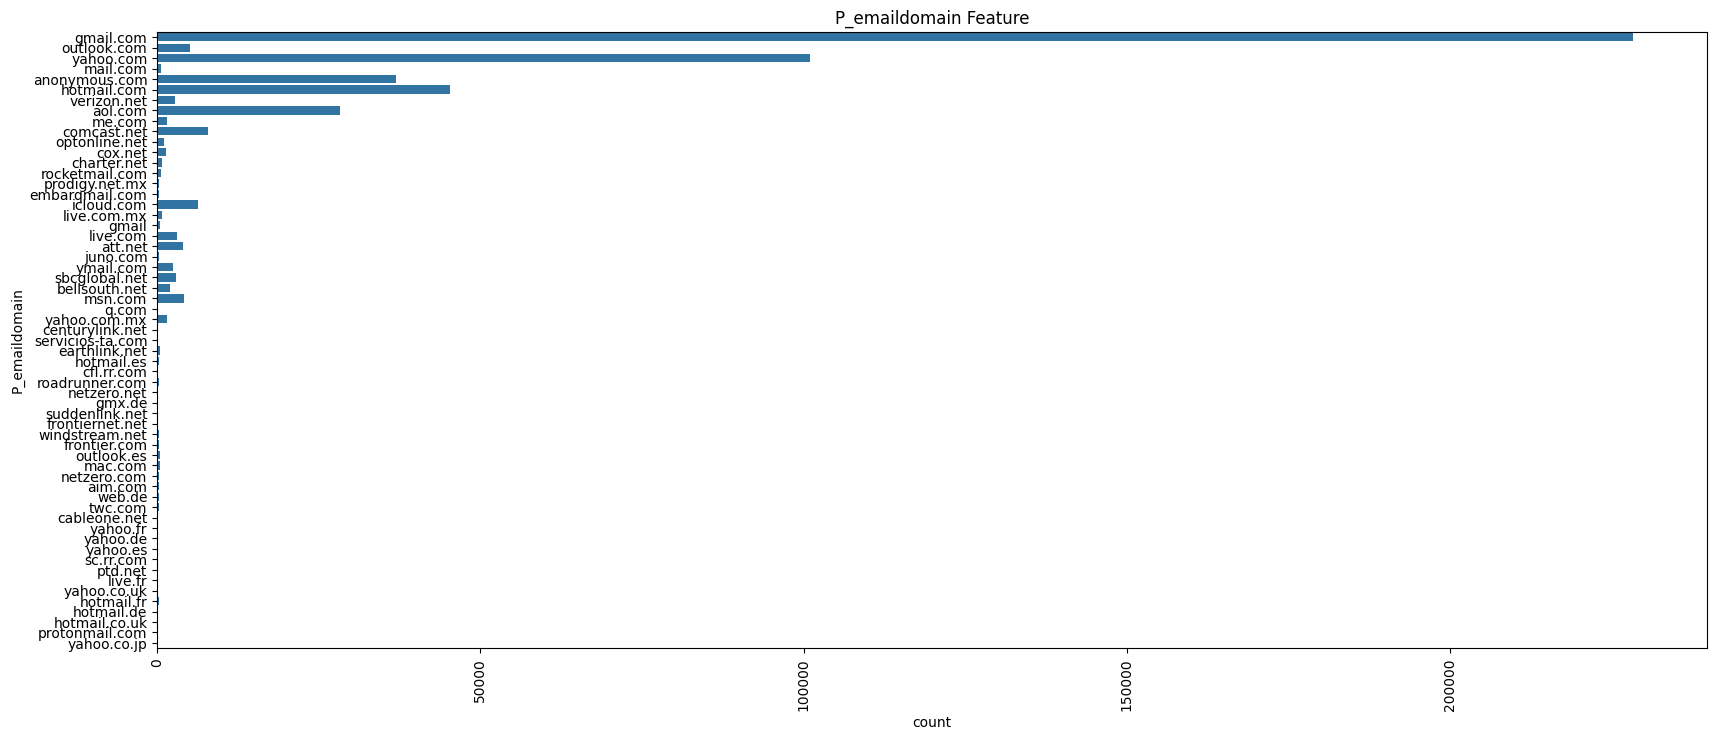

In [108]:
fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize = (20,8))

sns.countplot(train_df['P_emaildomain'])
axes.title.set_text('P_emaildomain Feature')
axes.set_xticklabels(axes.get_xticklabels(), rotation = 90)

plt.show();

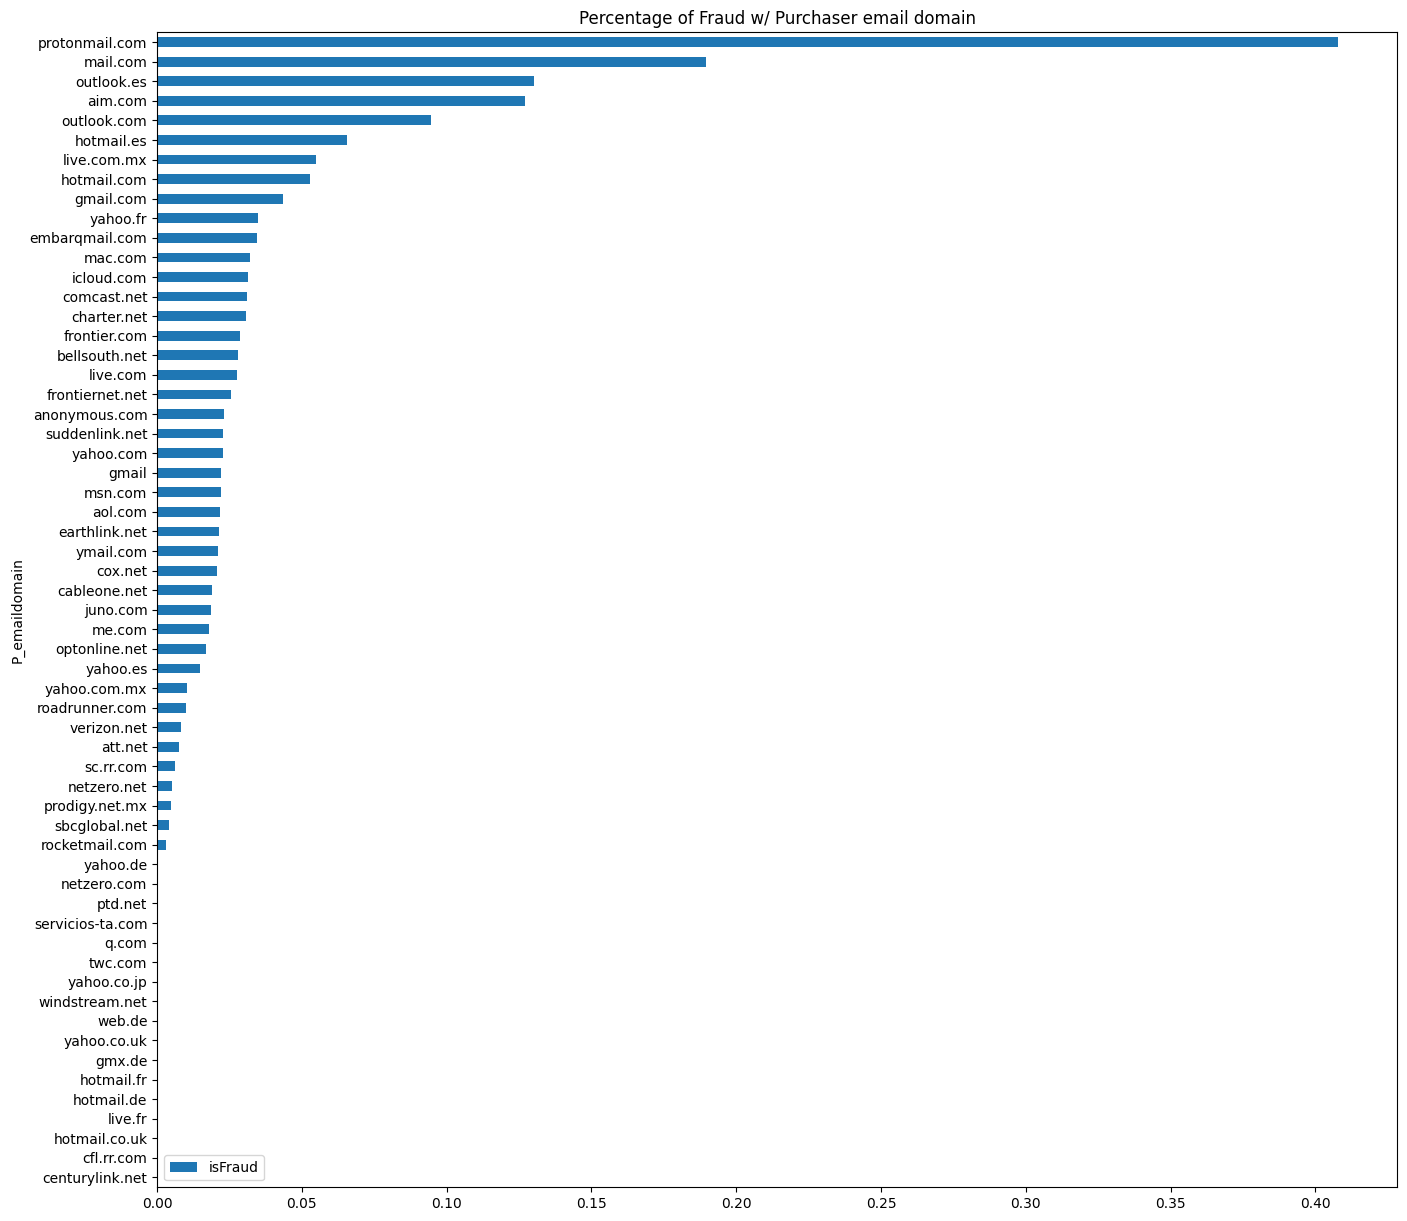

In [107]:
train_df[['P_emaildomain','isFraud']].groupby(by = ['P_emaildomain']).mean() \
        .sort_values(by = ['isFraud']).plot(kind = 'barh',
        figsize = (16, 15),
         title = 'Percentage of Fraud w/ Purchaser email domain')
plt.show()

Observation:

In purchaser email domains, majority of mails are from gmail.com.

Among those More fraud transaction are from "protonmail.com" domain which is more than around 40%.

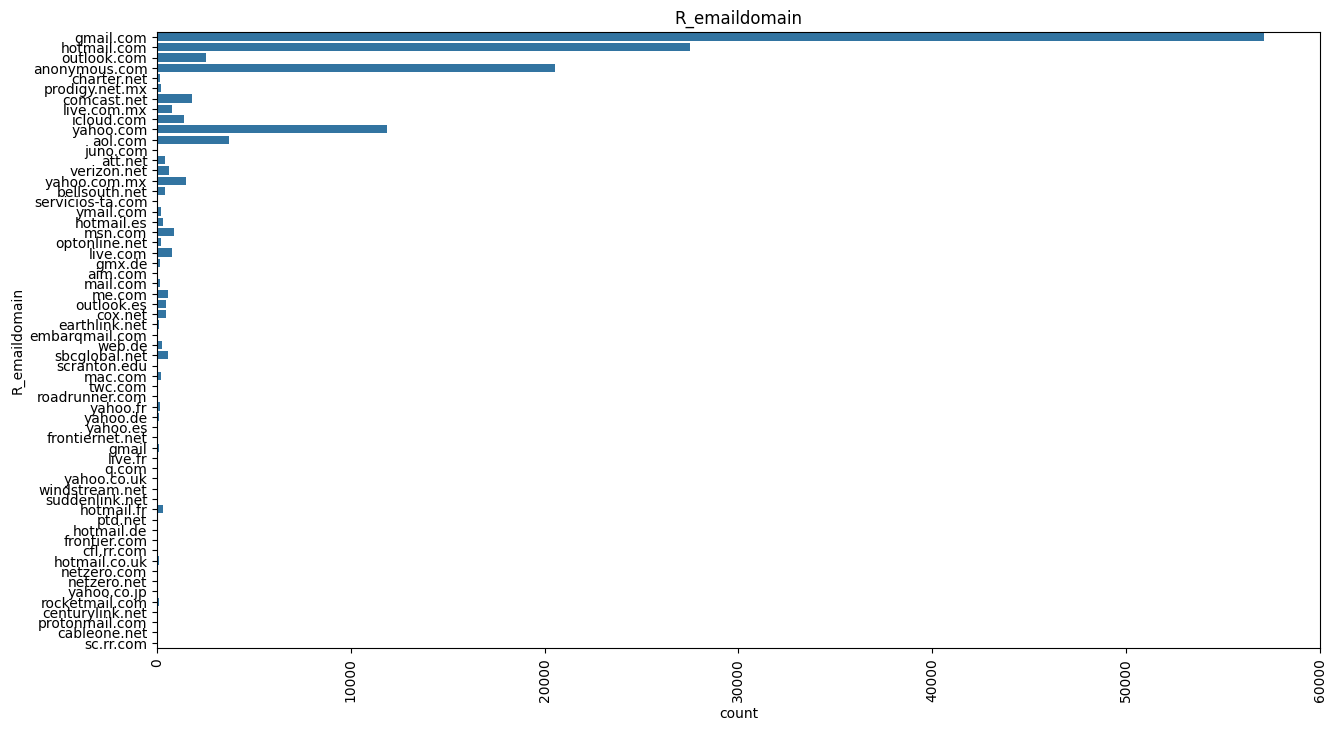

In [109]:
fig , axes = plt.subplots(nrows = 1, ncols = 1,figsize = (15, 8))

sns.countplot(train_df['R_emaildomain'])
axes.title.set_text('R_emaildomain')

axes.set_xticklabels(axes.get_xticklabels(), rotation = 90)
plt.show()

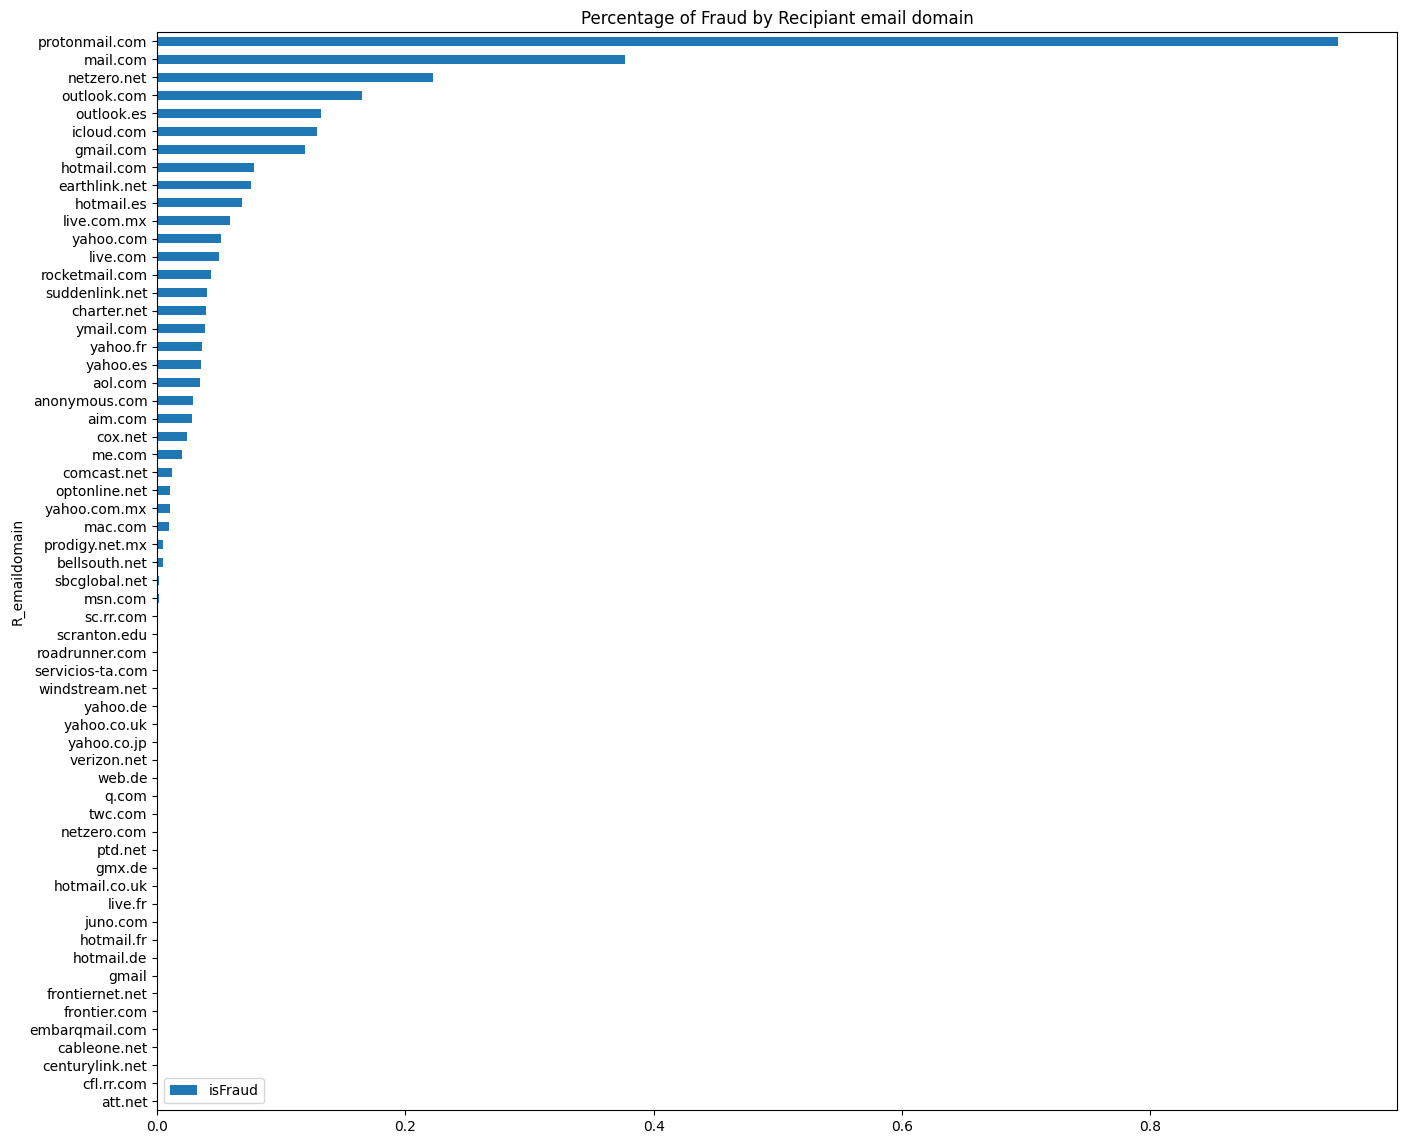

In [110]:
train_df[['R_emaildomain','isFraud']].groupby(by = ['R_emaildomain']).mean() \
        .sort_values(by = ['isFraud']).plot(kind = 'barh',
        figsize = (16, 14),
         title = 'Percentage of Fraud by Recipiant email domain')
plt.show()

Observation:

In purchaser email domains most mails are from gmail.com.

Among those More fraud transaction comes from domain protonmail.com which is more than 90% which is a serious issue.

We will group all the similar e-mail domains by the respective enterprises.

Set all values with less than 500 entries as "Others" for P_emaildomain and less than 300 as others for R_emaildomain.

Also fill NaN by 'NoInf'.

In [111]:
# Reference: https://www.kaggle.com/kabure/extensive-eda-and-modeling-xgb-hyperopt/notebook#Ploting-Transaction-Amount-Values-Distribution
train_df.loc[train_df['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'

train_df.loc[train_df['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk', 'yahoo.co.jp', 'yahoo.de', 'yahoo.fr', 'yahoo.es']), 'P_emaildomain'] = 'Yahoo'

train_df.loc[train_df['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 'hotmail.es','hotmail.co.uk', 'hotmail.de', 'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'

train_df.loc[train_df.P_emaildomain.isin(train_df.P_emaildomain.value_counts()[train_df.P_emaildomain.value_counts() <= 500 ].index), 'P_emaildomain'] = "Others"

train_df.P_emaildomain.fillna("NoInfo", inplace=True)



train_df.loc[train_df['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

train_df.loc[train_df['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk', 'yahoo.co.jp', 'yahoo.de', 'yahoo.fr', 'yahoo.es']), 'R_emaildomain'] = 'Yahoo'

train_df.loc[train_df['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 'hotmail.es','hotmail.co.uk', 'hotmail.de', 'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'

train_df.loc[train_df.R_emaildomain.isin(train_df.R_emaildomain.value_counts()[train_df.R_emaildomain.value_counts() <= 300 ].index), 'R_emaildomain'] = "Others"

train_df.R_emaildomain.fillna("NoInfo", inplace=True)

In [112]:
test_df.loc[test_df['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'

test_df.loc[test_df['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk', 'yahoo.co.jp', 'yahoo.de', 'yahoo.fr', 'yahoo.es']), 'P_emaildomain'] = 'Yahoo'

test_df.loc[test_df['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 'hotmail.es','hotmail.co.uk', 'hotmail.de', 'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'

test_df.loc[test_df.P_emaildomain.isin(test_df.P_emaildomain.value_counts()[test_df.P_emaildomain.value_counts() <= 500 ].index), 'P_emaildomain'] = "Others"

test_df.P_emaildomain.fillna("NoInfo", inplace=True)



test_df.loc[test_df['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

test_df.loc[test_df['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk', 'yahoo.co.jp', 'yahoo.de', 'yahoo.fr', 'yahoo.es']), 'R_emaildomain'] = 'Yahoo'

test_df.loc[test_df['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 'hotmail.es','hotmail.co.uk', 'hotmail.de', 'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'

test_df.loc[test_df.R_emaildomain.isin(test_df.R_emaildomain.value_counts()[test_df.R_emaildomain.value_counts() <= 300 ].index), 'R_emaildomain'] = "Others"

test_df.R_emaildomain.fillna("NoInfo", inplace=True)

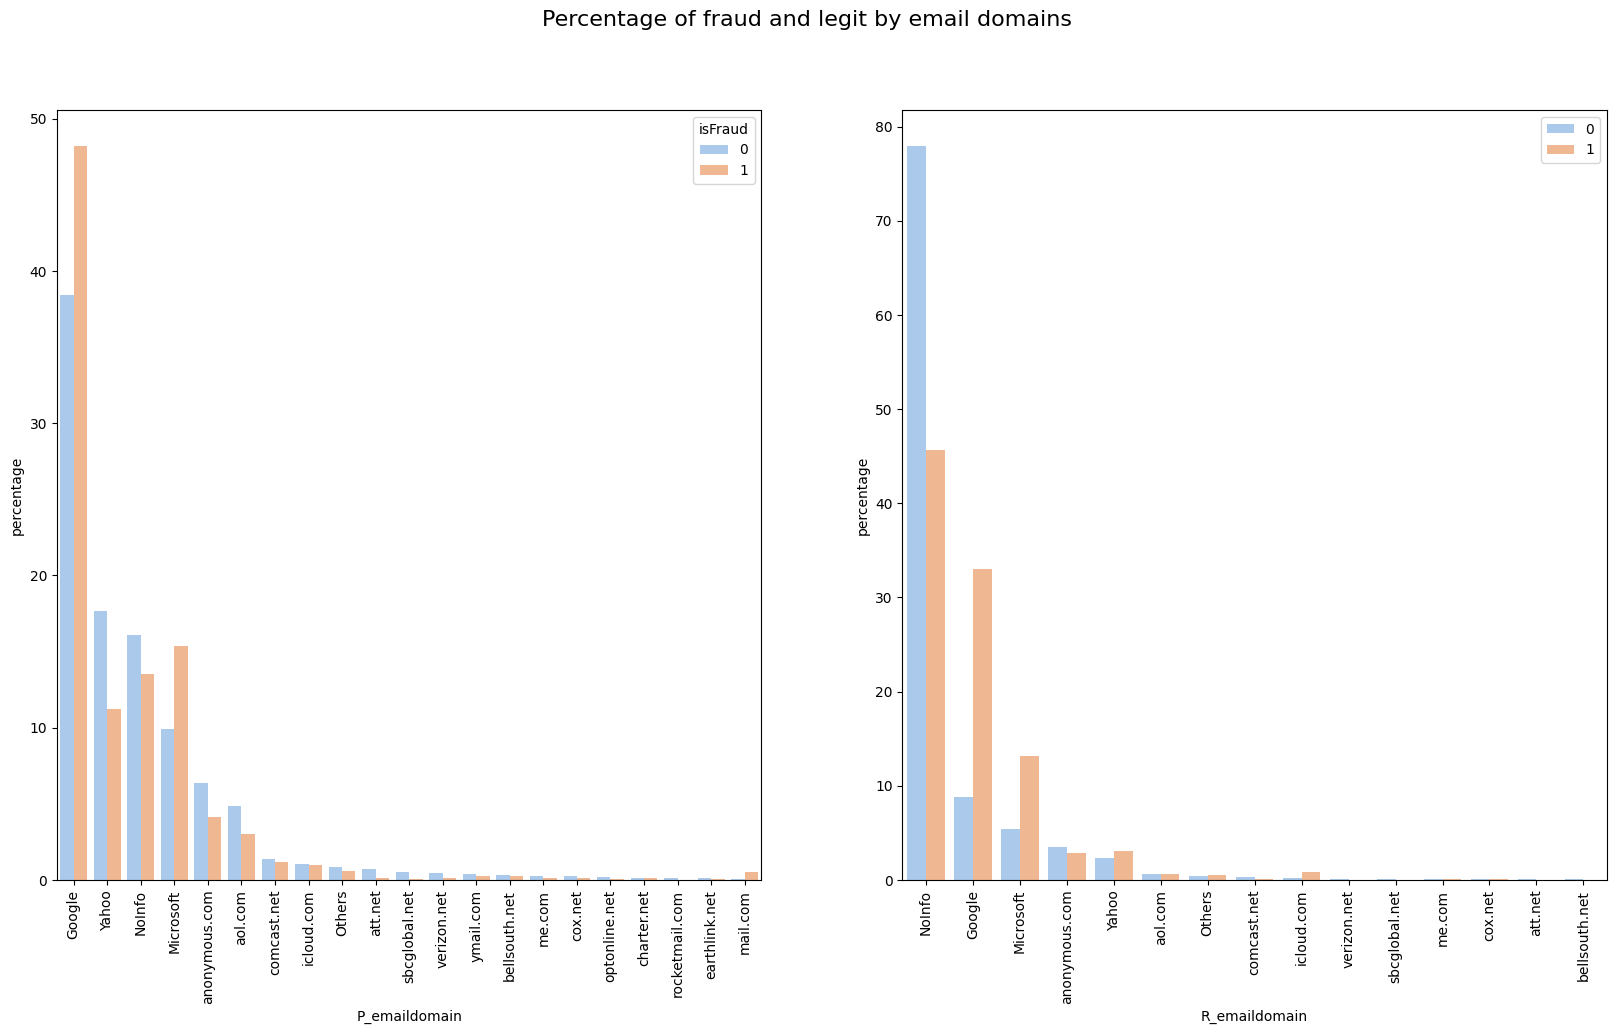

In [113]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)

train_P_email = (train_df[~train_df['P_emaildomain'].isnull()].groupby(['isFraud'])['P_emaildomain'].value_counts(normalize=True).rename('percentage').mul(100).reset_index())
sns.barplot(x = "P_emaildomain", y = "percentage", hue = "isFraud", data = train_P_email, palette = 'pastel')
plt.xticks(rotation = 90)
plt.subplot(1,2,2)

train_R_email = train_df[~train_df['R_emaildomain'].isnull()].groupby(['isFraud'])['R_emaildomain'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
sns.barplot(x="R_emaildomain", y="percentage", hue="isFraud", data = train_R_email, palette = 'pastel')
plt.xticks(rotation=90)
plt.legend(loc = 'upper right')
plt.suptitle('Percentage of fraud and legit by email domains', fontsize = 16)

plt.show()


**2.9 C1-C14:**

These are continous numerical features

Counts such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked. These are like count of phone numbers, email addresses, name associated with user, device, billingaddr for both purchaser and recipient that doubles the

C1-C14 don't have any missing value in train dataset

In [114]:
C_features = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']

In [115]:
for i in C_features:
    print(train_df[i].dtype)

float16
float16
float16
float16
float16
float16
float16
float16
float16
float16
float16
float16
float16
float16


In [116]:
#null values in C1-C14

for i in C_features:
  nullcount = train_df[i].isnull().sum()
  print("Feature " +i+ " has", nullcount, "null values")

Feature C1 has 0 null values
Feature C2 has 0 null values
Feature C3 has 0 null values
Feature C4 has 0 null values
Feature C5 has 0 null values
Feature C6 has 0 null values
Feature C7 has 0 null values
Feature C8 has 0 null values
Feature C9 has 0 null values
Feature C10 has 0 null values
Feature C11 has 0 null values
Feature C12 has 0 null values
Feature C13 has 0 null values
Feature C14 has 0 null values


In [117]:
#null values in C1-C14

for i in C_features:

  nullcount = test_df[i].isnull().sum()
  print("Feature " +i+ " has", nullcount,"null values")

Feature C1 has 3 null values
Feature C2 has 3 null values
Feature C3 has 3 null values
Feature C4 has 3 null values
Feature C5 has 3 null values
Feature C6 has 3 null values
Feature C7 has 3 null values
Feature C8 has 3 null values
Feature C9 has 3 null values
Feature C10 has 3 null values
Feature C11 has 3 null values
Feature C12 has 3 null values
Feature C13 has 4748 null values
Feature C14 has 3 null values


In [118]:
c_cols = [c for c in train_df if c[0] == 'C']

train_df[c_cols].head()

C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12   C13  C14
0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0  0.0   1.0  1.0
1  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   1.0  1.0
2  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0
3  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0  0.0  25.0  1.0
4  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   1.0  1.0

In [119]:
train_df[c_cols].describe()

C1        C2             C3        C4        C5        C6  \
count  590521.0  590521.0  590521.000000  590521.0  590521.0  590521.0   
mean        NaN       NaN       0.000000       NaN       NaN       NaN   
std         NaN       NaN       0.150635       NaN       NaN       NaN   
min         0.0       0.0       0.000000       0.0       0.0       0.0   
25%         1.0       1.0       0.000000       0.0       0.0       1.0   
50%         1.0       1.0       0.000000       0.0       0.0       1.0   
75%         3.0       3.0       0.000000       0.0       1.0       2.0   
max      4684.0    5692.0      26.000000    2252.0     349.0    2252.0   

             C7        C8        C9       C10       C11       C12       C13  \
count  590521.0  590521.0  590521.0  590521.0  590521.0  590521.0  590521.0   
mean        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
std         NaN       NaN       0.0       NaN       NaN       NaN       NaN   
min         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25%         0.0       0.0       0.0       0.0       1.0       0.0       1.0   
50%         0.0       0.0       1.0       0.0       1.0       0.0       3.0   
75%         0.0       0.0       2.0       0.0       2.0       0.0      12.0   
max      2256.0    3332.0     210.0    3256.0    3188.0    3188.0    2918.0   

            C14  
count  590521.0  
mean        NaN  
std         NaN  
min         0.0  
25%         1.0  
50%         1.0  
75%         2.0  
max      1429.0

In [120]:
plt.figure(figsize = (20, 50))

var = ['C' + str(i) for i in range(1, 15)]
i = 1
for col in var:
    plt.subplot(7,4,i)
    sns.scatterplot(x = "TransactionDT", y = col, hue = "isFraud", data = train_df[~train_df[col].isnull()])
    plt.title('Train '+ col)
    i += 1

    plt.subplot(7,4,i)
    sns.scatterplot(x = "TransactionDT", y = col, data = test_df[~test_df[col].isnull()] )
    plt.title('Test '+ col)

    i += 1

plt.show();

Output hidden; open in https://colab.research.google.com to view.


Observation:

All features looks important, also No null values present in train data.

Few outliers are observed in train data, Let's remove outliers from C features

In [121]:
train_df.drop(train_df[train_df.C1 > 2500].index, axis=0, inplace=True)
train_df.drop(train_df[train_df.C2 > 2500].index, axis=0, inplace=True)
train_df.drop(train_df[train_df.C4 > 1400].index, axis=0, inplace=True)
train_df.drop(train_df[train_df.C6 > 1400].index, axis=0, inplace=True)
train_df.drop(train_df[train_df.C7 > 1400].index, axis=0, inplace=True)
train_df.drop(train_df[train_df.C8 > 2000].index, axis=0, inplace=True)
train_df.drop(train_df[train_df.C10 > 2000].index, axis=0, inplace=True)
train_df.drop(train_df[train_df.C11 > 2000].index, axis=0, inplace=True)
train_df.drop(train_df[train_df.C12 > 2000].index, axis=0, inplace=True)
train_df.drop(train_df[train_df.C13 > 1800].index, axis=0, inplace=True)
train_df.drop(train_df[train_df.C14 > 800].index, axis=0, inplace=True)

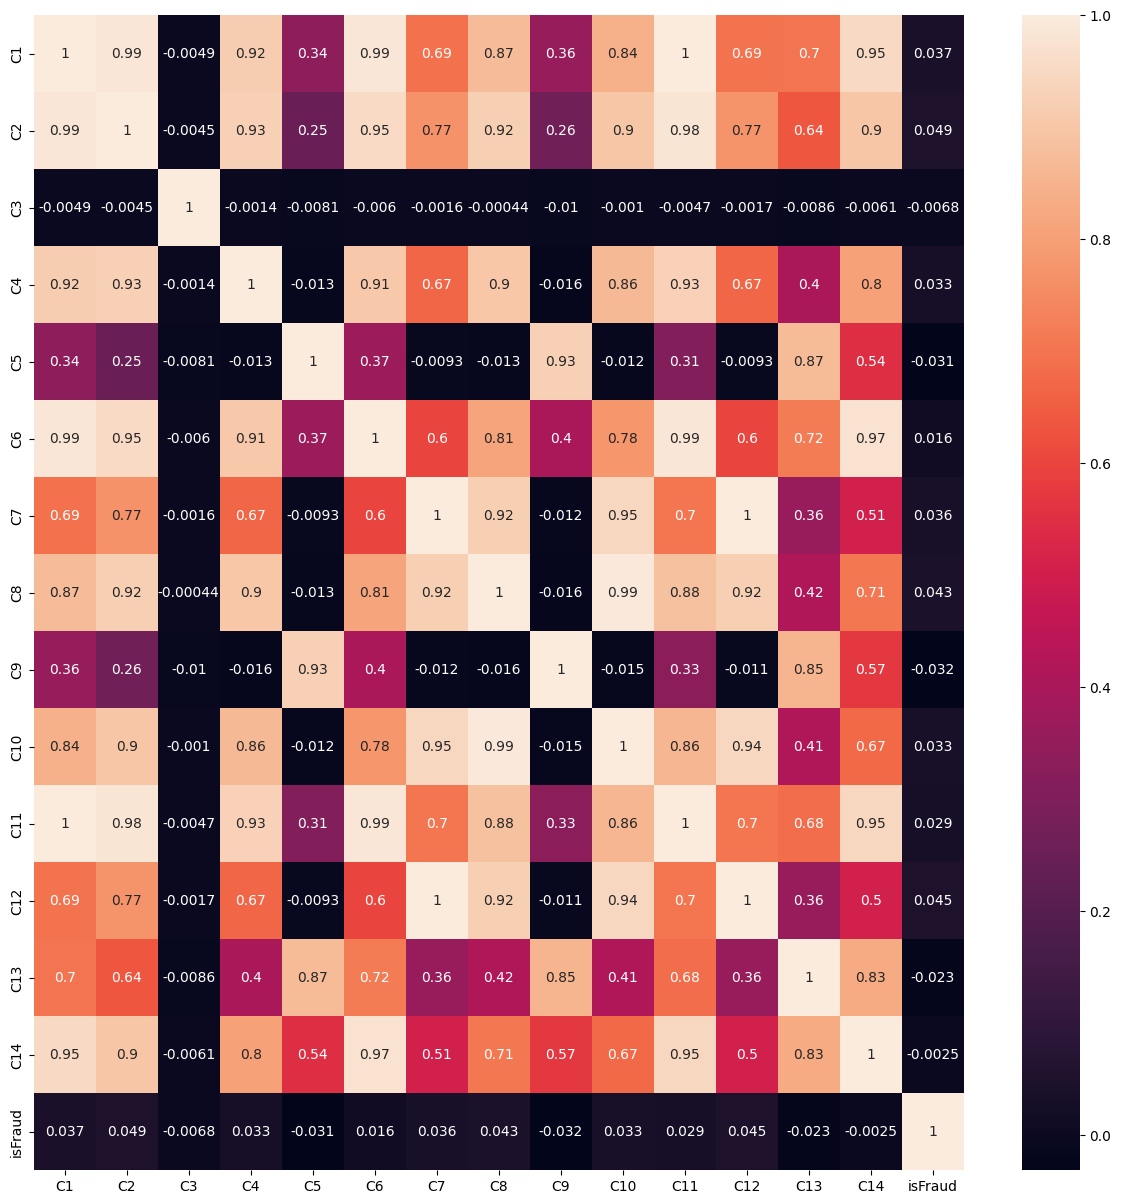

In [122]:
#Many C features have similar data distribution. Lets see correlated features
c_cols = train_df[['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','isFraud']]
f = c_cols.corr()
plt.figure(1,figsize = (15,15))
sns.heatmap(f,annot = True)
plt.show();

Observation:

From the scatter plot it is confirm that many C features have similar distribution. Most of the values in C1 lies near to 0.

Few outliers are observerd in some of features in dataset, C5 and C9 don't have any outliers. We have removed them while building the outliers.

All these feature have integral values with equal intervals and majority of the values corresponding to the C_features are 0.

Some C features seems to be highly inter-correlated.

**2.10 D1-D15:**

These are numerical features.

Timedelta, such as days between previous transaction, etc.

The hour of the day is D9: train['D9'] = (train['TransactionDT']%(3600*24)/3600//1)/24.0.

In [123]:
train_df.iloc[:, 31:46].head()

D1     D2    D3    D4   D5  D6  D7  D8  D9   D10    D11  D12  D13  D14  \
0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN  13.0   13.0  NaN  NaN  NaN   
1    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   0.0    NaN  NaN  NaN  NaN   
2    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   0.0  315.0  NaN  NaN  NaN   
3  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN  84.0    NaN  NaN  NaN  NaN   
4    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   NaN    NaN  NaN  NaN  NaN   

     D15  
0    0.0  
1    0.0  
2  315.0  
3  111.0  
4    NaN

In [124]:
Dvalues = ['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15']

for i in Dvalues:
    print(train_df[i].describe())

count    588707.0
mean          NaN
std           NaN
min           0.0
25%           0.0
50%           3.0
75%         122.0
max         640.0
Name: D1, dtype: float64
count    309574.0
mean          NaN
std           NaN
min           0.0
25%          26.0
50%          97.0
75%         276.0
max         640.0
Name: D2, dtype: float64
count    327429.0
mean          NaN
std           NaN
min           0.0
25%           1.0
50%           8.0
75%          27.0
max         819.0
Name: D3, dtype: float64
count    421065.0
mean          NaN
std           NaN
min        -122.0
25%           0.0
50%          26.0
75%         254.0
max         869.0
Name: D4, dtype: float64
count    280419.0
mean          NaN
std           NaN
min           0.0
25%           1.0
50%          10.0
75%          32.0
max         819.0
Name: D5, dtype: float64
count    72647.0
mean         NaN
std          NaN
min        -83.0
25%          0.0
50%          0.0
75%         40.0
max        873.0
Name: D6, dtype: fl

Observation:

Some D features contain few negative values. Since D features represent some time references and it can't be negative. We need to remove them before building a model.

In [125]:
plt.figure(figsize = (25,52))

vars = ['D' + str(i) for i in range(1,16)]
i = 1
for col in vars:
    plt.subplot(8,4,i)
    sns.scatterplot(x = "TransactionDT", y = col, hue = "isFraud", data = train_df[~train_df[col].isnull()])
    plt.title('Train Feature '+col)
    i += 1


    plt.subplot(8,4,i)
    sns.scatterplot(x = "TransactionDT", y = col, data = test_df[~test_df[col].isnull()])
    plt.title('Test Feature '+col)
    i += 1

plt.show();

Observation:

Most of D features are graphically increasing with TransactionDT as the number of days between previous transaction (time period) increases.

2.11 M1-M9:

In [ ]:
#M features value samples

m_cols = [c for c in train_df if c[0] == 'M']
train_df[m_cols].head()

M1   M2   M3   M4   M5   M6   M7   M8   M9
0    T    T    T   M2    F    T  NaN  NaN  NaN
1  NaN  NaN  NaN   M0    T    T  NaN  NaN  NaN
2    T    T    T   M0    F    F    F    F    F
3  NaN  NaN  NaN   M0    T    F  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

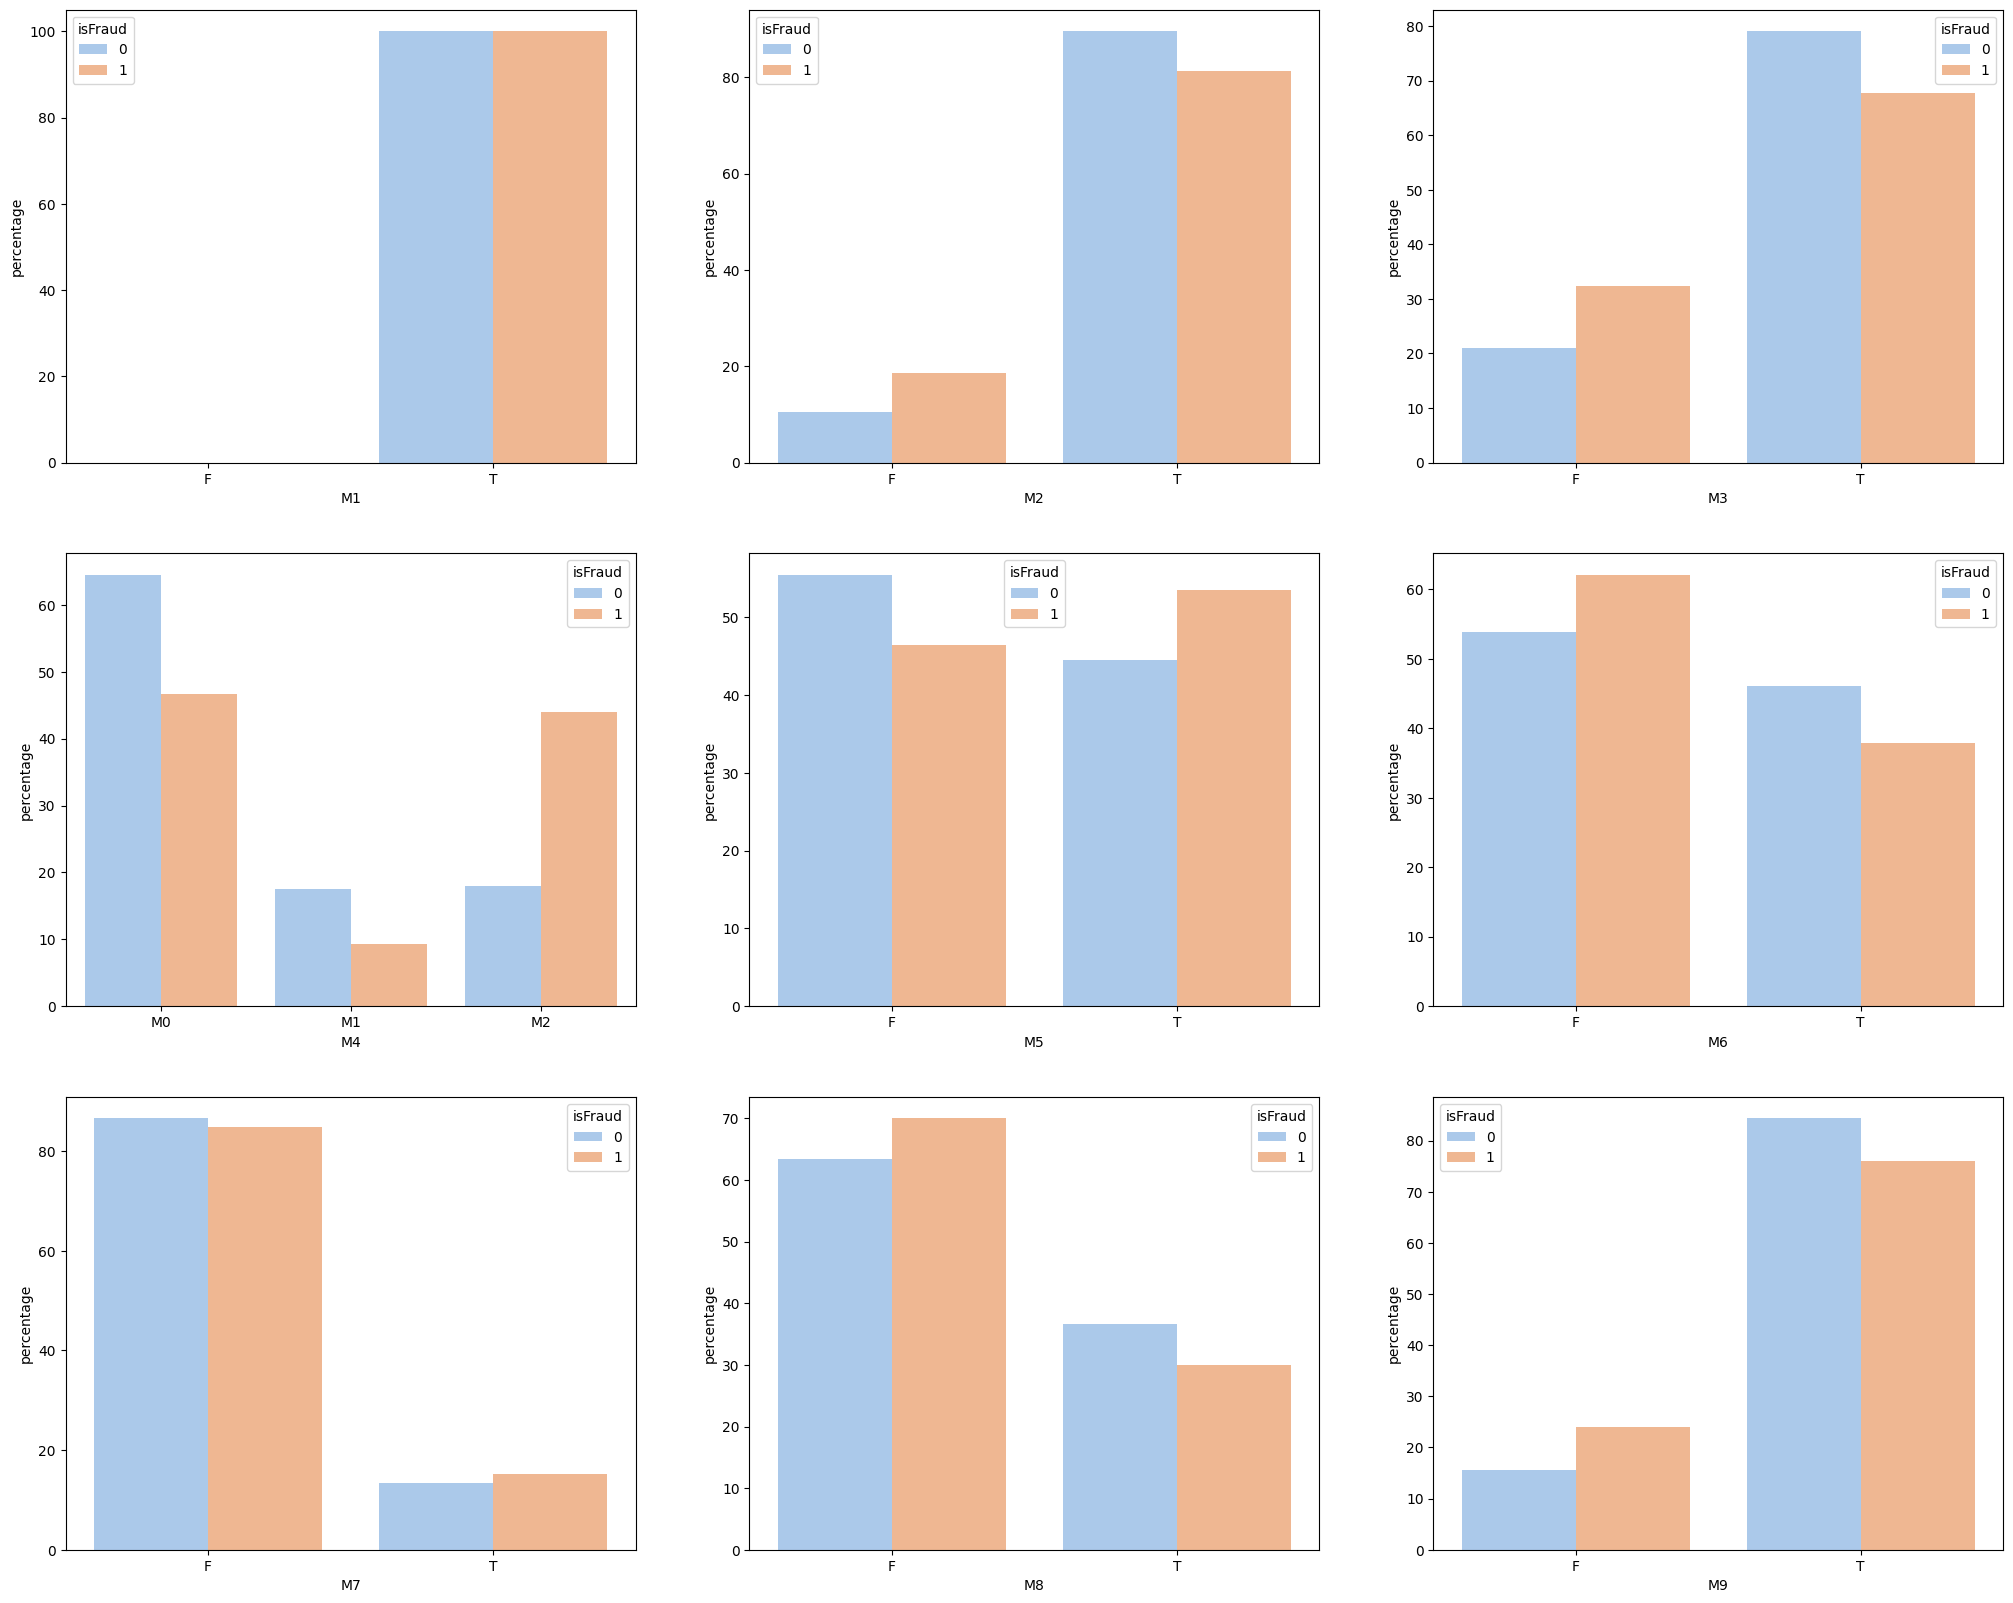

In [ ]:
plt.figure(figsize = (25,20))

var = ['train_m' + str(i) for i in range(1,10)]
col = ['M' + str(i) for i in range(1,10)]

for i, j, k in zip( var, col, range(1,10)):

    i = (train_df.groupby(['isFraud'])[j]

                         .value_counts(normalize = True)
                         .rename('percentage')
                         .mul(100)
                         .reset_index()
                         .sort_values(j))

    plt.subplot(3,3,k)
    sns.barplot(x = j, y = "percentage", hue = "isFraud", data = i, palette = 'pastel')

plt.show();

2.12 Vxxx:

In [ ]:
v_feature = [c for c in train_df if c[0] == 'V']
train_df[v_feature].head()

V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0  0.0   
2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  \
0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  \
0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  V60  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V61  V62  V63  V64  V65  V66  V67  V68  V69  V70  V71  V72  V73  V74  V75  \
0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
1  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
3  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V76  V77  V78  V79  V80  V81  V82  V83  V84  V85  V86  V87  V88  V89  V90  \
0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0   
1  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0   
2  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0   
3  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V91  V92  V93  V94  V95   V96   V97  V98   V99  V100  V101  V102  V103  \
0  0.0  0.0  0.0  0.0  0.0   1.0   0.0  0.0   0.0   0.0   0.0   1.0   0.0   
1  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
3  0.0  0.0  0.0  0.0  1.0  48.0  28.0  0.0  10.0   4.0   1.0  38.0  24.0   
4  NaN  NaN  NaN  NaN  0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   

   V104  V105  V106  V107  V108  V109  V110  V111  V112  V113  V114  V115  \
0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
1   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
2   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
3   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
4   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

   V116  V117  V118  V119  V120  V121  V122  V123  V124  V125  V126    V127  \
0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   0.0   117.0   
1   1.0   1.0   1.0   1.0   1.0   

In [ ]:
train_df[v_feature].describe()

V1        V2        V3        V4        V5        V6        V7  \
count  311240.0  311240.0  311240.0  311240.0  311240.0  311240.0  311240.0   
mean        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
std         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
min         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25%         1.0       1.0       1.0       1.0       1.0       1.0       1.0   
50%         1.0       1.0       1.0       1.0       1.0       1.0       1.0   
75%         1.0       1.0       1.0       1.0       1.0       1.0       1.0   
max         1.0       8.0       9.0       6.0       6.0       9.0       9.0   

             V8        V9       V10       V11       V12       V13       V14  \
count  311240.0  311240.0  311240.0  311240.0  514450.0  514450.0  514450.0   
mean        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
std         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
min         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25%         1.0       1.0       0.0       0.0       0.0       0.0       1.0   
50%         1.0       1.0       0.0       0.0       1.0       1.0       1.0   
75%         1.0       1.0       1.0       1.0       1.0       1.0       1.0   
max         8.0       8.0       4.0       5.0       3.0       6.0       1.0   

                 V15            V16       V17       V18       V19       V20  \
count  514450.000000  514450.000000  514450.0  514450.0  514450.0  514450.0   
mean        0.000000       0.000000       NaN       NaN       NaN       NaN   
std         0.332031       0.342529       0.0       0.0       0.0       0.0   
min         0.000000       0.000000       0.0       0.0       0.0       0.0   
25%         0.000000       0.000000       0.0       0.0       1.0       1.0   
50%         0.000000       0.000000       0.0       0.0       1.0       1.0   
75%         0.000000       0.000000       0.0       0.0       1.0       1.0   
max         7.000000      15.000000      15.0      15.0       7.0      15.0   

            V21       V22       V23       V24       V25       V26  \
count  514450.0  514450.0  514450.0  514450.0  514450.0  514450.0   
mean        NaN       NaN       NaN       NaN       NaN       NaN   
std         0.0       0.0       0.0       0.0       0.0       0.0   
min         0.0       0.0       0.0       0.0       0.0       0.0   
25%         0.0       0.0       1.0       1.0       1.0       1.0   
50%         0.0       0.0       1.0       1.0       1.0       1.0   
75%         0.0       0.0       1.0       1.0       1.0       1.0   
max         5.0       8.0      13.0      13.0       7.0      13.0   

                 V27            V28       V29       V30       V31       V32  \
count  514450.000000  514450.000000  514450.0  514450.0  514450.0  514450.0   
mean        0.000000       0.000000       NaN       NaN       NaN       NaN   
std         0.028595       0.031128       0.0       0.0       0.0       0.0   
min         0.000000       0.000000       0.0       0.0       0.0       0.0   
25%         0.000000       0.000000       0.0       0.0       0.0       0.0   
50%         0.000000       0.000000       0.0       0.0       0.0       0.0   
75%         0.000000       0.000000       1.0       1.0       0.0       0.0   
max         4.000000       4.000000       5.0       9.0       7.0      15.0   

            V33       V34       V35       V36       V37       V38       V39  \
count  514450.0  514450.0  421018.0  421018.0  421018.0  421018.0  421018.0   
mean        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
std         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
min         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25%         0.0       0.0       0.0       0.0       1.0       1.0       0.0   
50%         0.0       0.0       1.0       1.0       1.0       1.0    

In [ ]:
for f in v_feature:
    print('\n',"="*8,f,"="*8,'\n')

    len_unique_cat = len(np.unique(train_df[f]))
    Topvaluecount = train_df[f].value_counts().head(1)
    print("Top value count: ",Topvaluecount)
    print("\n{} feature has {} unique categories\n".format(f, len_unique_cat))


 ======== V1 ======== 

Top value count:  V1
1.0    311223
Name: count, dtype: int64

V1 feature has 3 unique categories


 ======== V2 ======== 

Top value count:  V2
1.0    298883
Name: count, dtype: int64

V2 feature has 10 unique categories


 ======== V3 ======== 

Top value count:  V3
1.0    290572
Name: count, dtype: int64

V3 feature has 11 unique categories


 ======== V4 ======== 

Top value count:  V4
1.0    246489
Name: count, dtype: int64

V4 feature has 8 unique categories


 ======== V5 ======== 

Top value count:  V5
1.0    242872
Name: count, dtype: int64

V5 feature has 8 unique categories


 ======== V6 ======== 

Top value count:  V6
1.0    298616
Name: count, dtype: int64

V6 feature has 11 unique categories


 ======== V7 ======== 

Top value count:  V7
1.0    291474
Name: count, dtype: int64

V7 feature has 11 unique categories


 ======== V8 ======== 

Top value count:  V8
1.0    303455
Name: count, dtype: int64

V8 feature has 10 unique categories


 ======== 


2.13 DeviceType

In [ ]:
train_df["DeviceType"].dtype

dtype('O')

In [ ]:
train_df['DeviceType'].isnull().sum()

449639

In [ ]:
train_df['DeviceType'].describe()

count      140337
unique          2
top       desktop
freq        84874
Name: DeviceType, dtype: object

In [ ]:
train_df['DeviceType'].value_counts()

DeviceType
desktop    84874
mobile     55463
Name: count, dtype: int64

In [ ]:
train_df['DeviceType'].unique()

array([nan, 'mobile', 'desktop'], dtype=object)

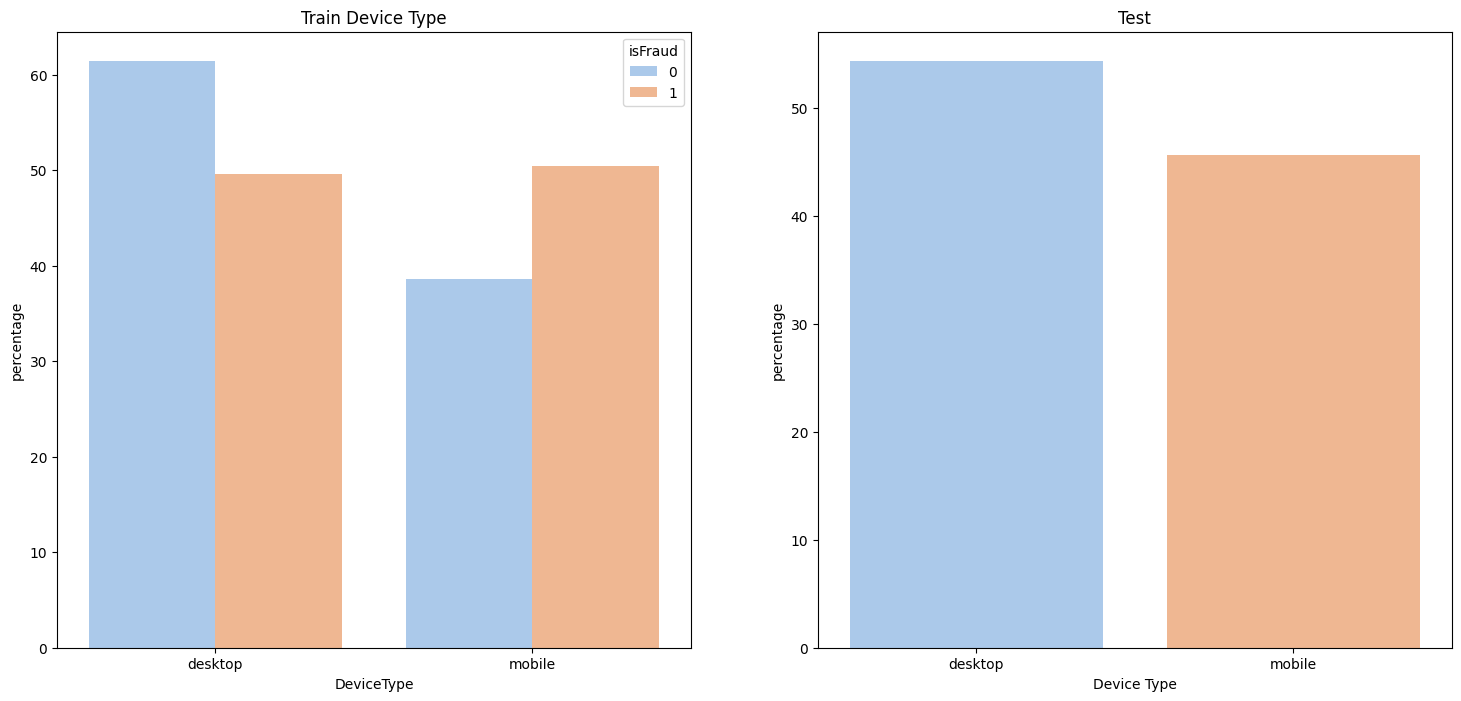

In [ ]:
plt.figure(figsize = (18,8))

plt.subplot(1,2,1)

train_DeviceType = (train_df[~train_df['DeviceType'].isnull()].groupby(['isFraud'])['DeviceType'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('DeviceType'))
sns.barplot(x = "DeviceType", y = "percentage", hue = "isFraud", data = train_DeviceType, palette = 'pastel')
plt.title('Train Device Type')

plt.subplot(1,2,2)

test_DeviceType = test_df[~test_df['DeviceType'].isnull()]['DeviceType'].value_counts(normalize = True).mul(100).rename('percentage').reset_index()

sns.barplot( x = "DeviceType", y = "percentage", data=test_DeviceType, palette = 'pastel')
plt.xlabel('Device Type')
plt.title('Test')

plt.show()


2.14 DeviceInfo

In [ ]:
train_df["DeviceInfo"].dtype

dtype('O')

In [ ]:
train_df['DeviceInfo'].isnull().sum()

471658

In [ ]:
train_df['DeviceInfo'].describe()

count      118318
unique       1784
top       Windows
freq        47550
Name: DeviceInfo, dtype: object

In [ ]:
# Top 5 DeviceInfo Value Counts

train_df['DeviceInfo'].value_counts()[:5]

DeviceInfo
Windows        47550
iOS Device     19781
MacOS          12573
Trident/7.0     7428
rv:11.0         1899
Name: count, dtype: int64

In [ ]:
train_df['DeviceInfo'].nunique()

1784

In [ ]:
DeviceTypetrain = train_df.groupby(['isFraud'])['DeviceInfo'].value_counts(normalize = True).rename('percentage').mul(100)
DeviceTypetrain

isFraud  DeviceInfo                                 
0        Windows                                        40.494347
         iOS Device                                     16.892157
         MacOS                                          11.201611
         Trident/7.0                                     6.679968
         rv:11.0                                         1.660881
         rv:57.0                                         0.775321
         SM-J700M Build/MMB29K                           0.440047
         SM-G610M Build/MMB29K                           0.383561
         SM-G531H Build/LMY48B                           0.341651
         rv:59.0                                         0.289720
         SM-G532M Build/MMB29T                           0.276054
         SM-G935F Build/NRD90M                           0.275143
         SM-G955U Build/NRD90M                           0.268766
         ALE-L23 Build/HuaweiALE-L23                     0.257833
         SM-G930V Build/NRD90M                           0.249633
         SM-G950U Build/NRD90M                           0.249633
         rv:52.0                                         0.221390
         SAMSUNG                                         0.207724
         rv:58.0                                         0.200435
         SM-N950U Build/NMF26X                           0.178570
         SM-G950F Build/NRD90M                           0.169459
         Moto G (4) Build/NPJ25.93-14.7                  0.163082
         SM-G570M Build/MMB29K                           0.163082
         rv:48.0                                         0.159437
         SM-J730GM Build/NRD90M                          0.143038
         CAM-L03 Build/HUAWEICAM-L03                     0.136661
         LG-D693n Build/LRX22G                           0.133016
         SM-A520F Build/NRD90M                           0.131194
         SM-J510MN Build/MMB29M                          0.128461
         SM-G930F Build/NRD90M                           0.127550
         LG-M700 Build/NMF26X                            0.126639
         SM-G935V Build/NRD90M                           0.124817
         Moto G (4) Build/NPJS25.93-14-13                0.122083
         LG-K410 Build/LRX22G                            0.120261
         PRA-LX3 Build/HUAWEIPRA-LX3                     0.119350
         Moto E (4) Plus Build/NMA26.42-69               0.115706
         SM-J701M Build/NRD90M                           0.112973
         Moto G (5) Plus Build/NPN25.137-92              0.108417
         SM-J320M Build/LMY47V                           0.102040
         Moto G Play Build/MPIS24.241-15.3-7             0.099307
         Moto X Play Build/NPD26.48-24-1                 0.099307
         HUAWEI VNS-L53 Build/HUAWEIVNS-L53              0.098396
         Moto G (5) Build/NPP25.137-93                   0.097485
         Moto E (4) Build/NMA26.42-19                    0.096573
         TRT-L53 Build/HUAWEITRT-L53                     0.094751
         SAMSUNG SM-G950U Build/NRD90M                   0.093840
         SM-G955F Build/NRD90M                           0.093840
         Linux x86_64                                    0.092929
         Moto E (4) Build/NMA26.42-69                    0.092929
         SAMSUNG SM-J700M Build/MMB29K                   0.092018
         HUAWEI TAG-L13 Build/HUAWEITAG-L13              0.091107
         LG-K580 Build/MRA58K                            0.091107
         LG-X230 Build/MRA58K                            0.090196
         Moto Z2 Play Build/NPSS26.118-19-14             0.090196
         SM-A720F Build/NRD90M                           0.089285
         rv:56.0                                         0.088374
         HUAWEI VNS-L23 Build/HUAWEIVNS-L23              0.087463
         F3213 Build/36.1.A.1.86                         0.085641
         SAMSUNG SM-G532M Build/MMB29T                   0.085641
         LG-K500 Build/MMB29M                        

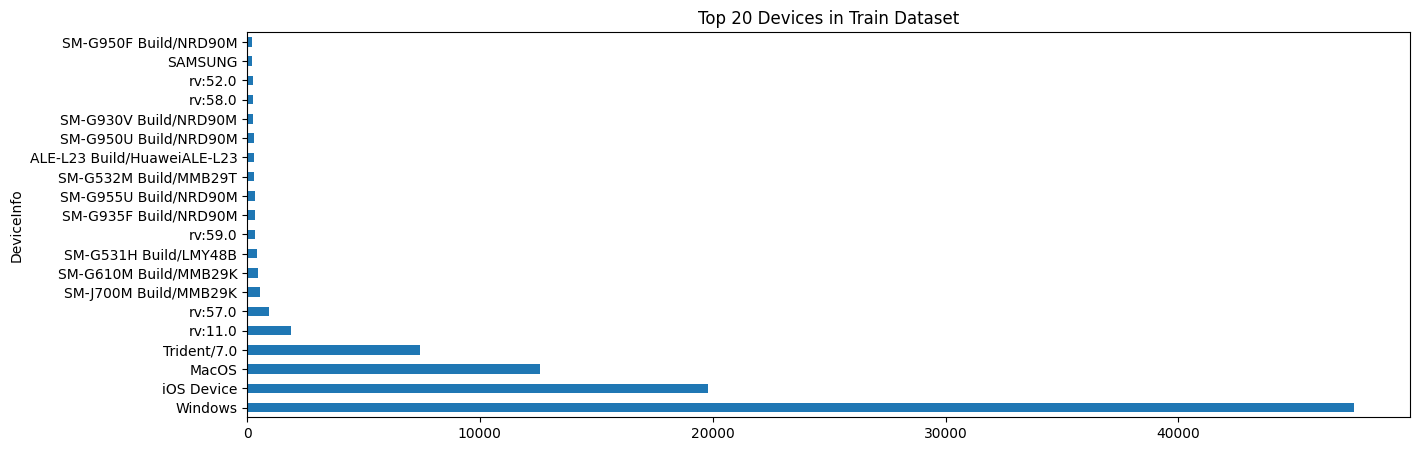

In [ ]:
train_df.groupby('DeviceInfo') \
    .count()['TransactionID'] \
    .sort_values(ascending = False) \
    .head(20) \
    .plot(kind = 'barh', figsize = (15 , 5), title = 'Top 20 Devices in Train Dataset')

plt.show()


2.15 id_01 to id_11

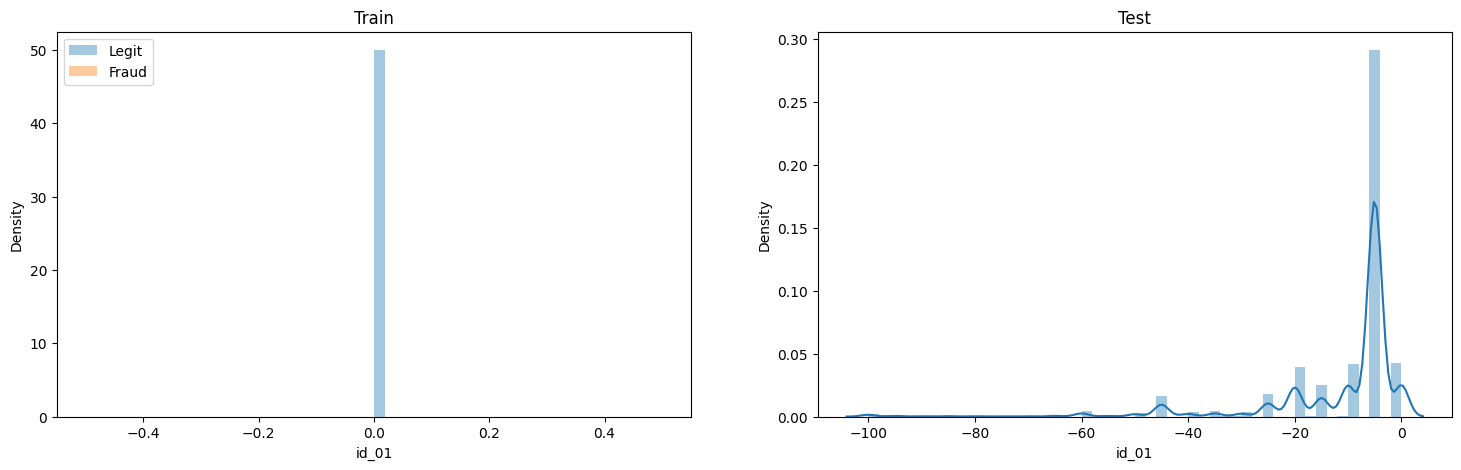

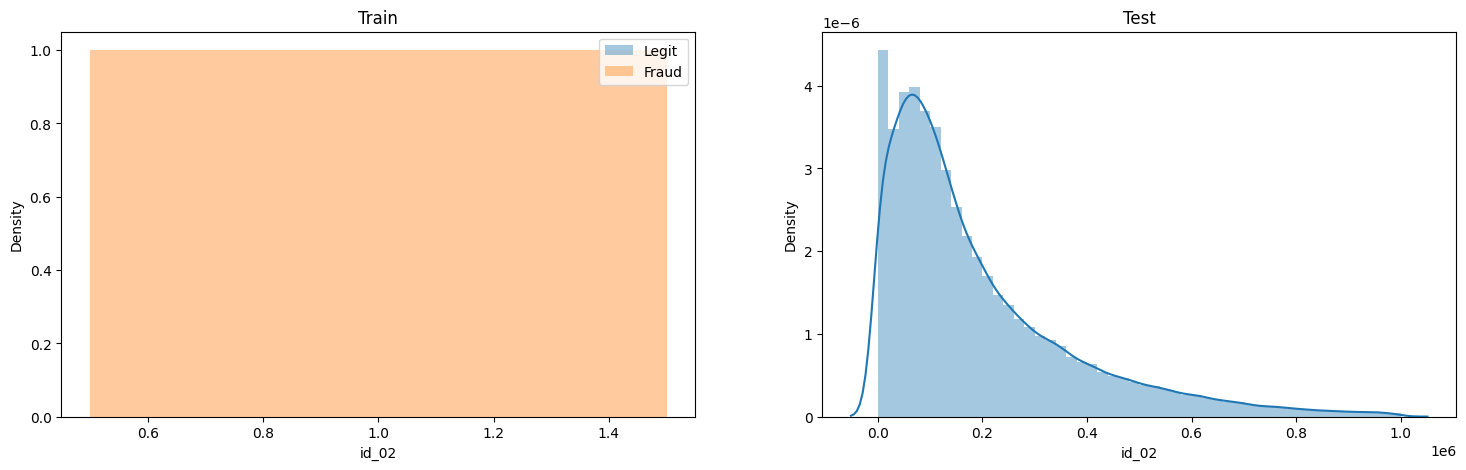

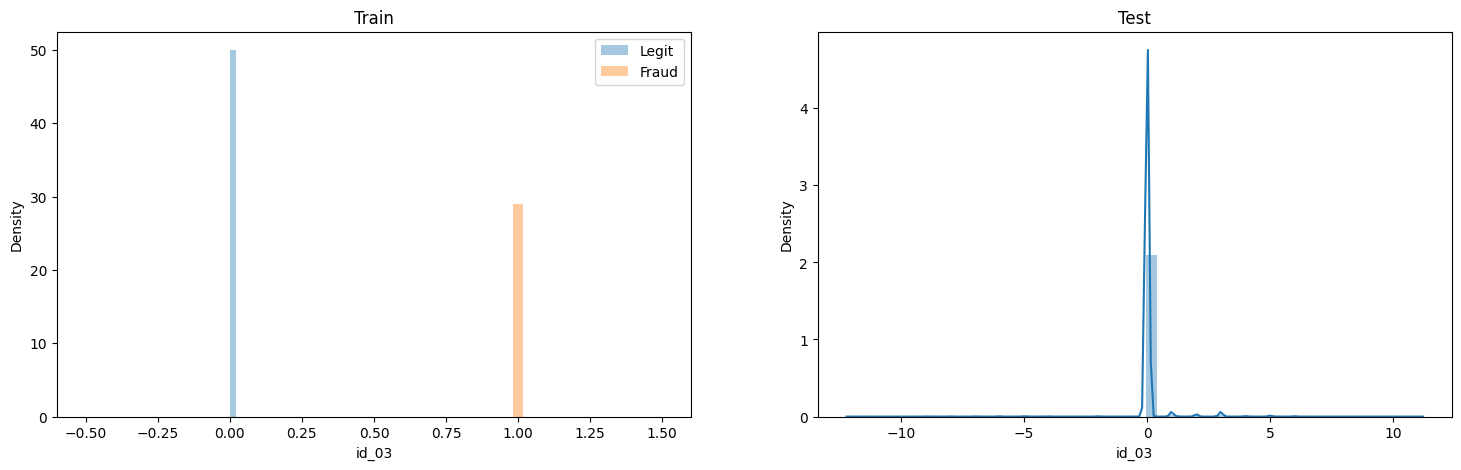

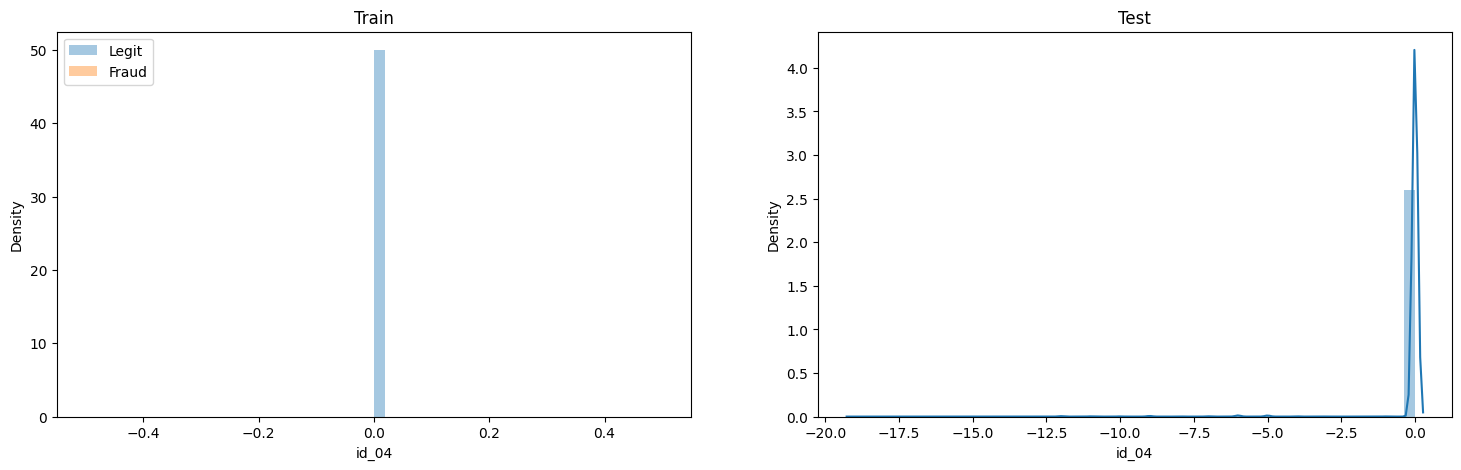

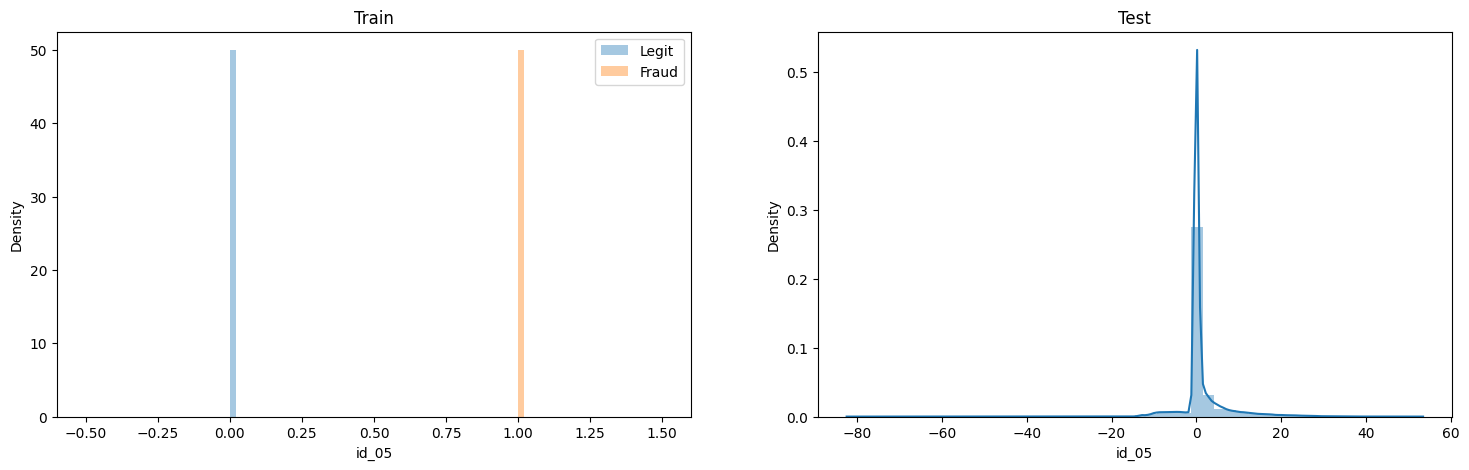

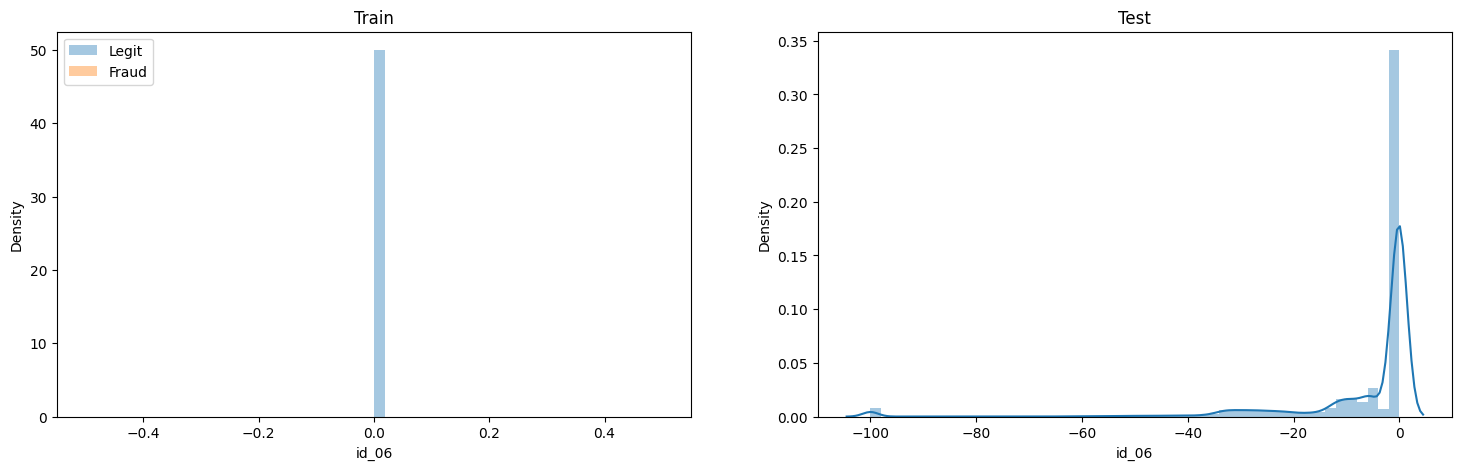

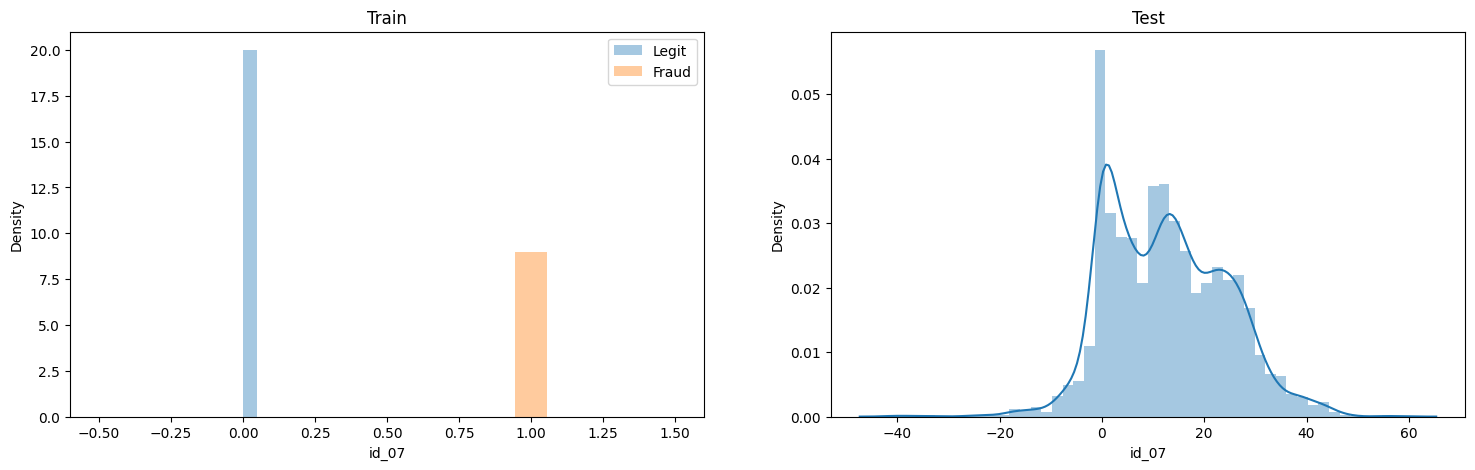

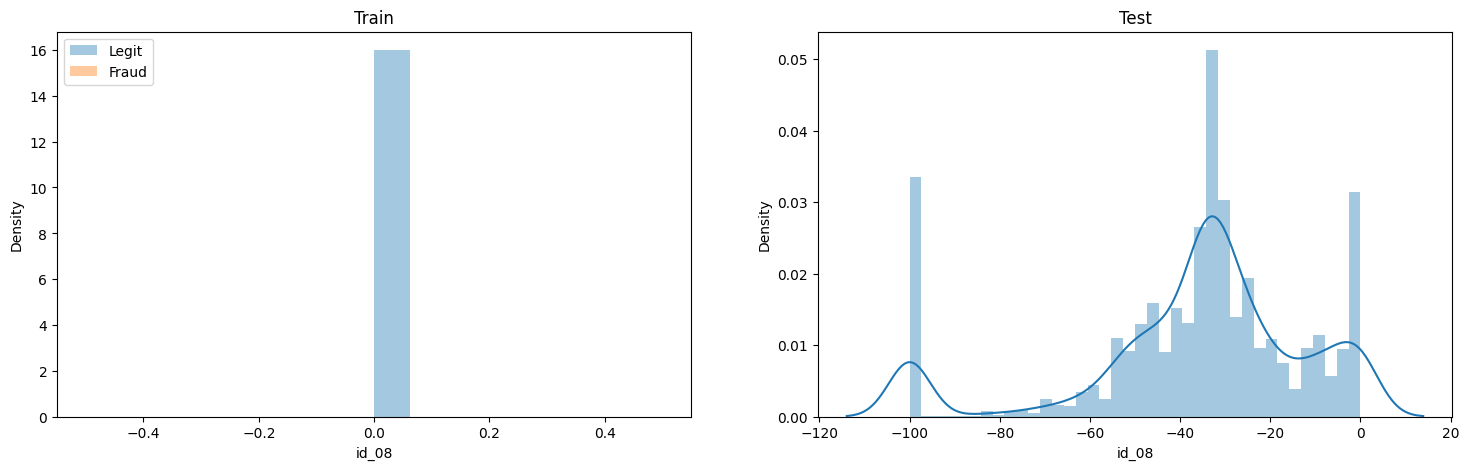

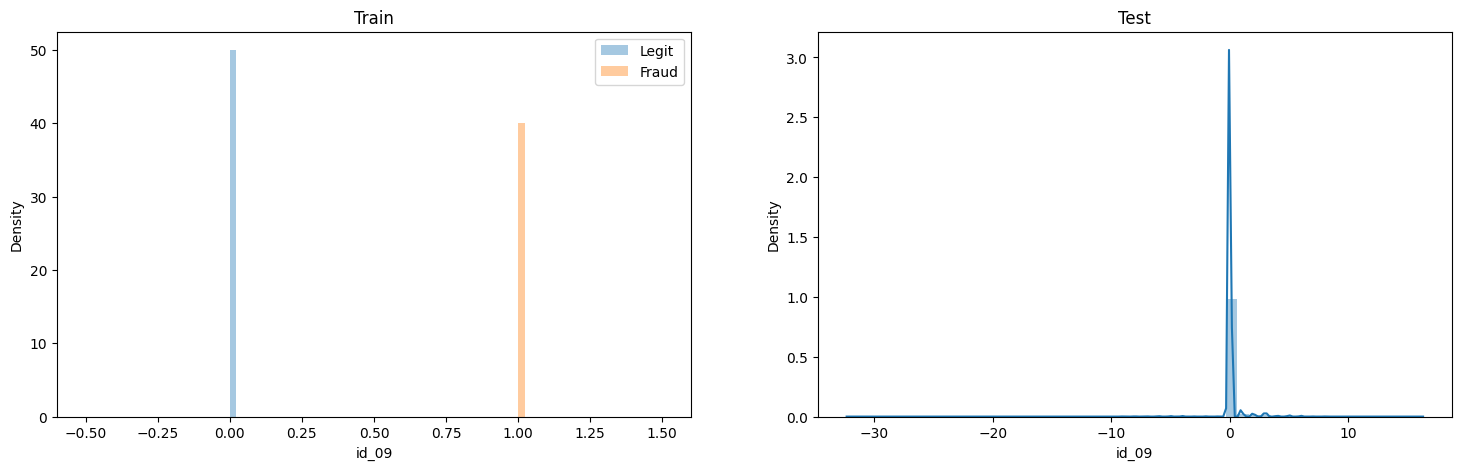

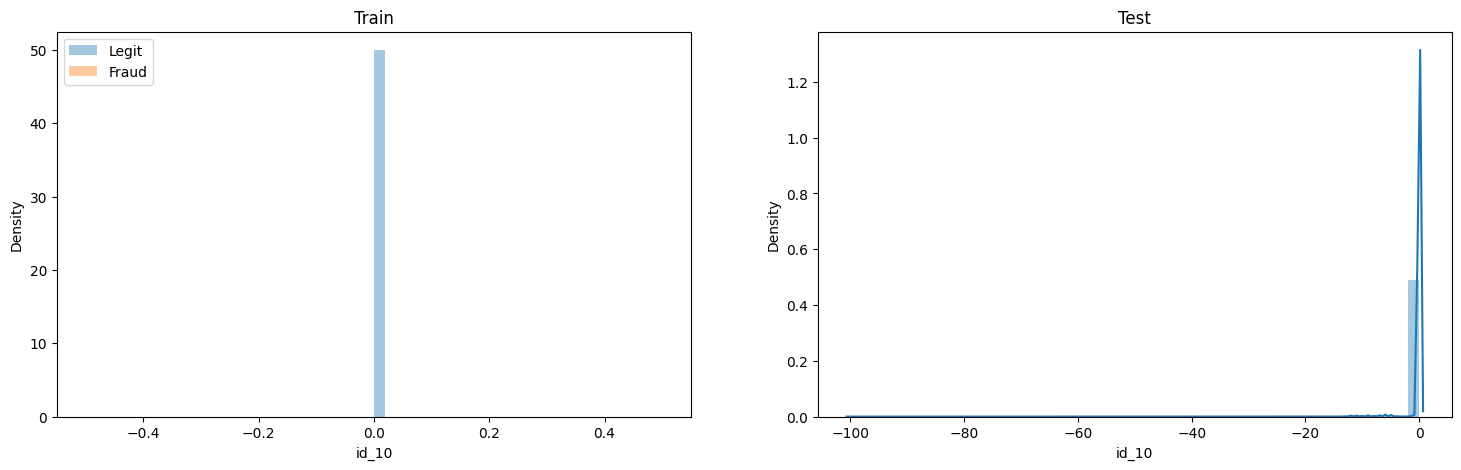

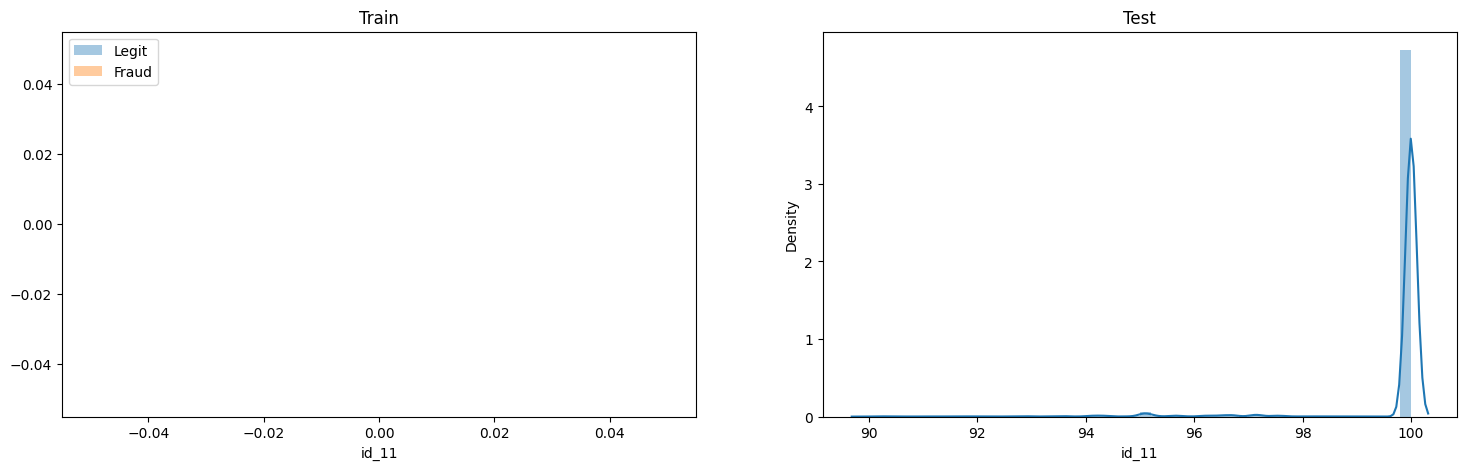

In [ ]:
for i in ['01','02','03','04','05','06','07','08','09','10','11']:
   plt.figure(figsize = (18,5))
   plt.subplot(1,2,1)
   sns.distplot(train_df[train_df["id_"+i] == 0]["id_"+i], label = "Legit")

   sns.distplot(train_df[train_df["id_"+i] ==1 ]["id_"+i], label = "Fraud")
   plt.legend()
   plt.title("Train")


   plt.subplot(1,2,2)
   sns.distplot(test_df["id_"+i])
   plt.title("Test")
   plt.show()
   print("="*90)

In [ ]:
# Convert float16 columns to float32 in train_df and test_df
for col in train_df.columns:
    if train_df[col].dtype == 'float16':
        train_df[col] = train_df[col].astype('float32')

for col in test_df.columns:
    if test_df[col].dtype == 'float16':
        test_df[col] = test_df[col].astype('float32')

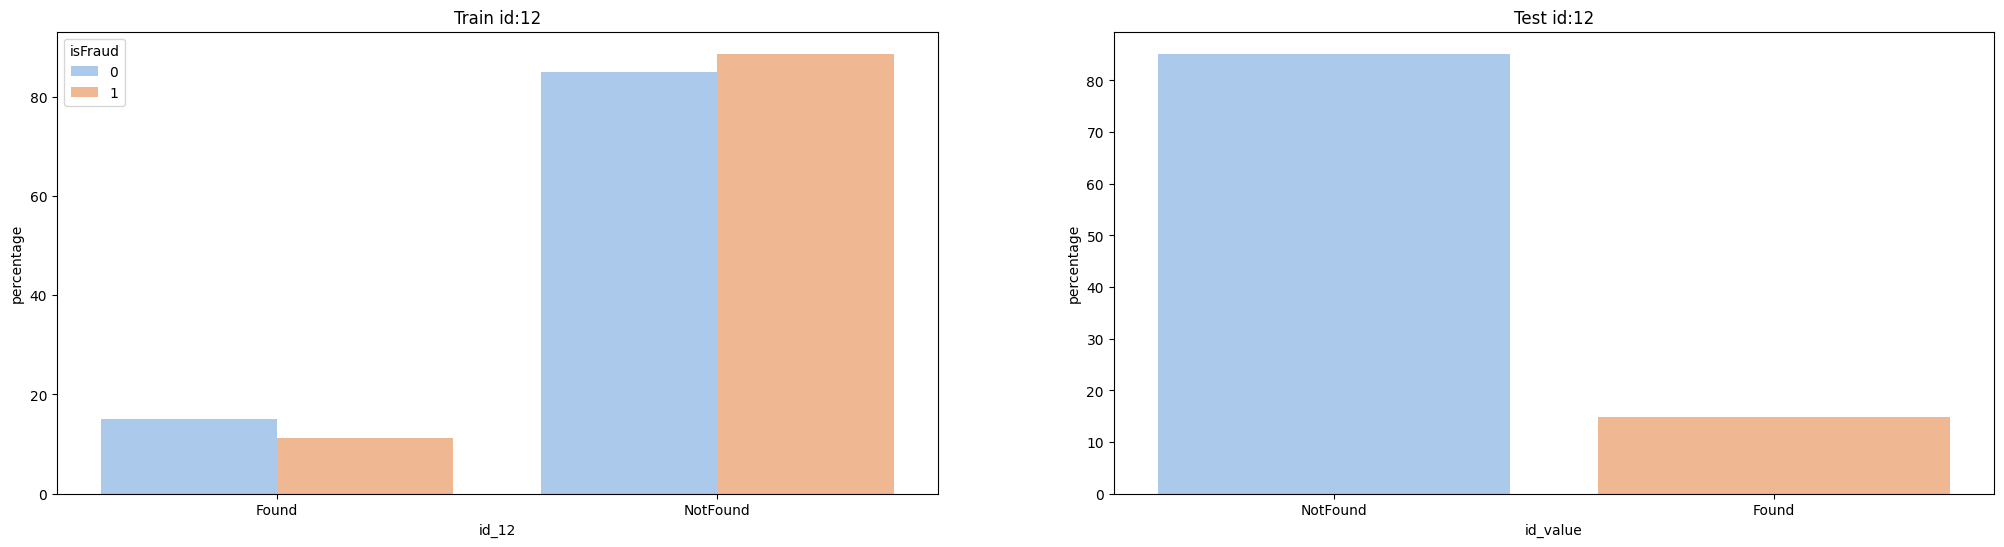

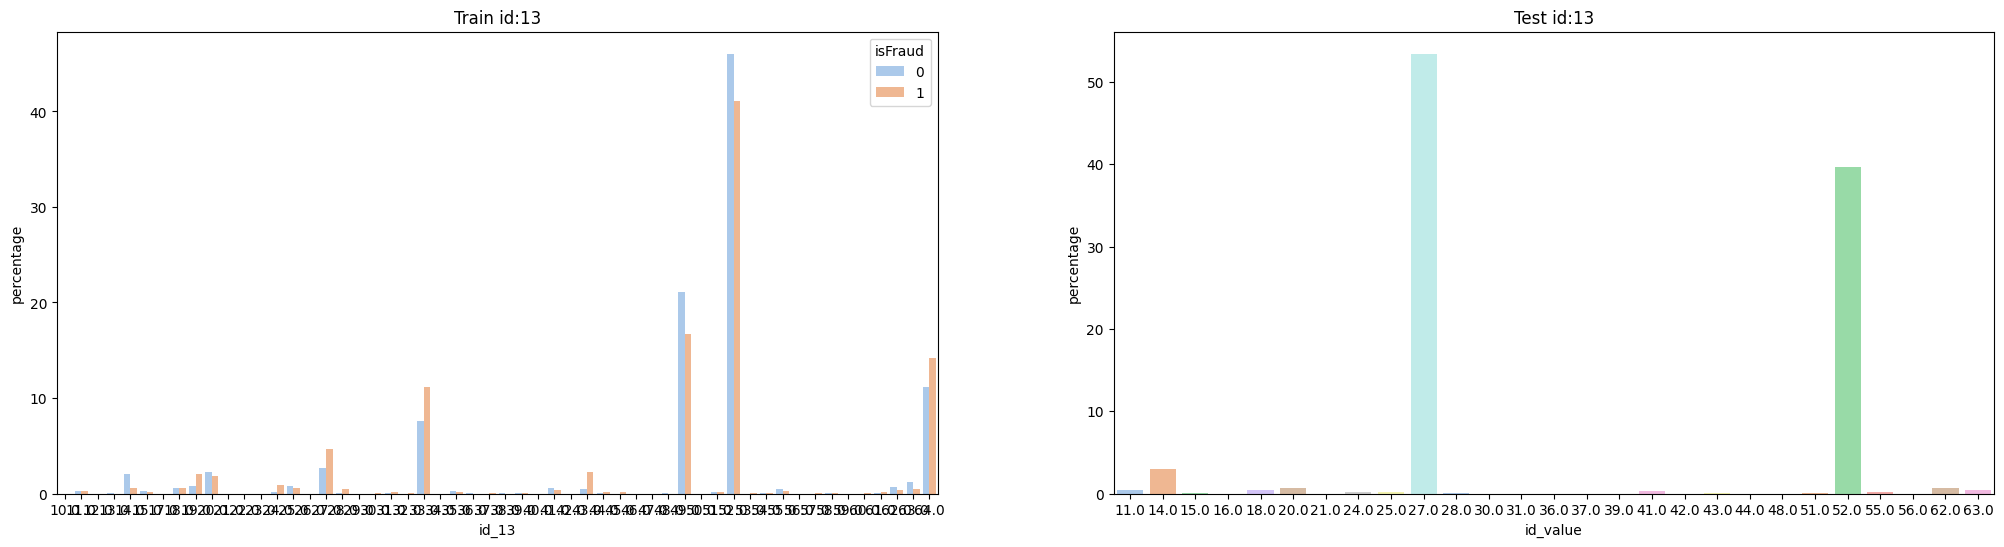

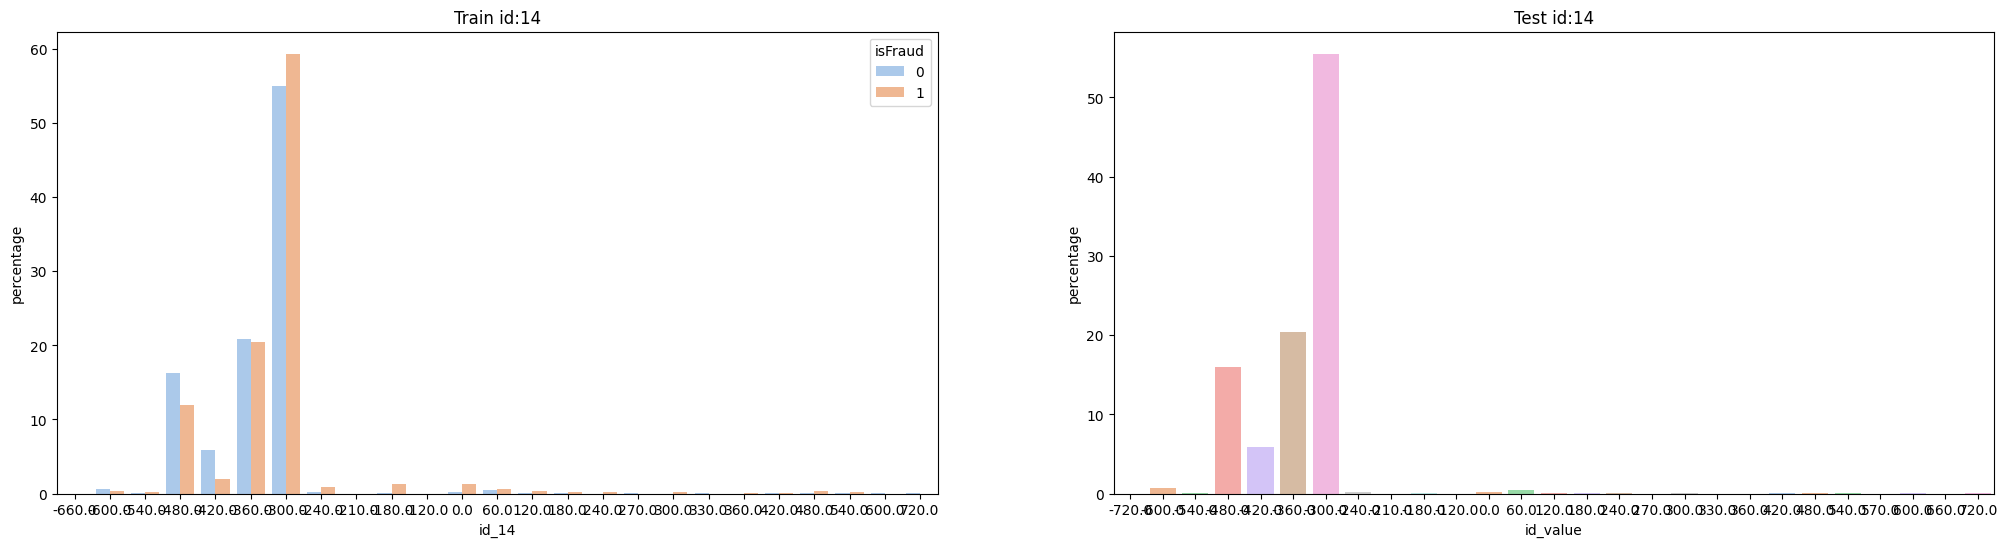

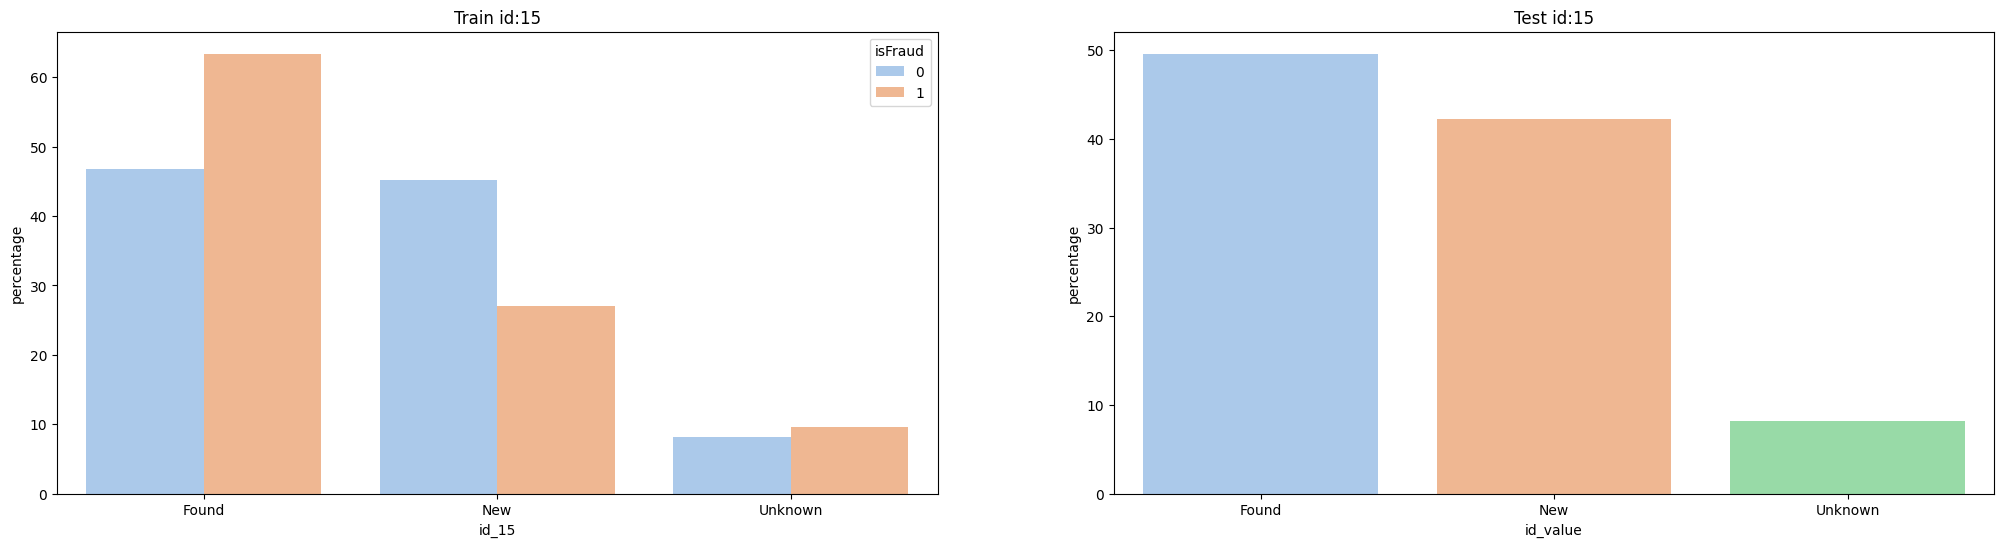

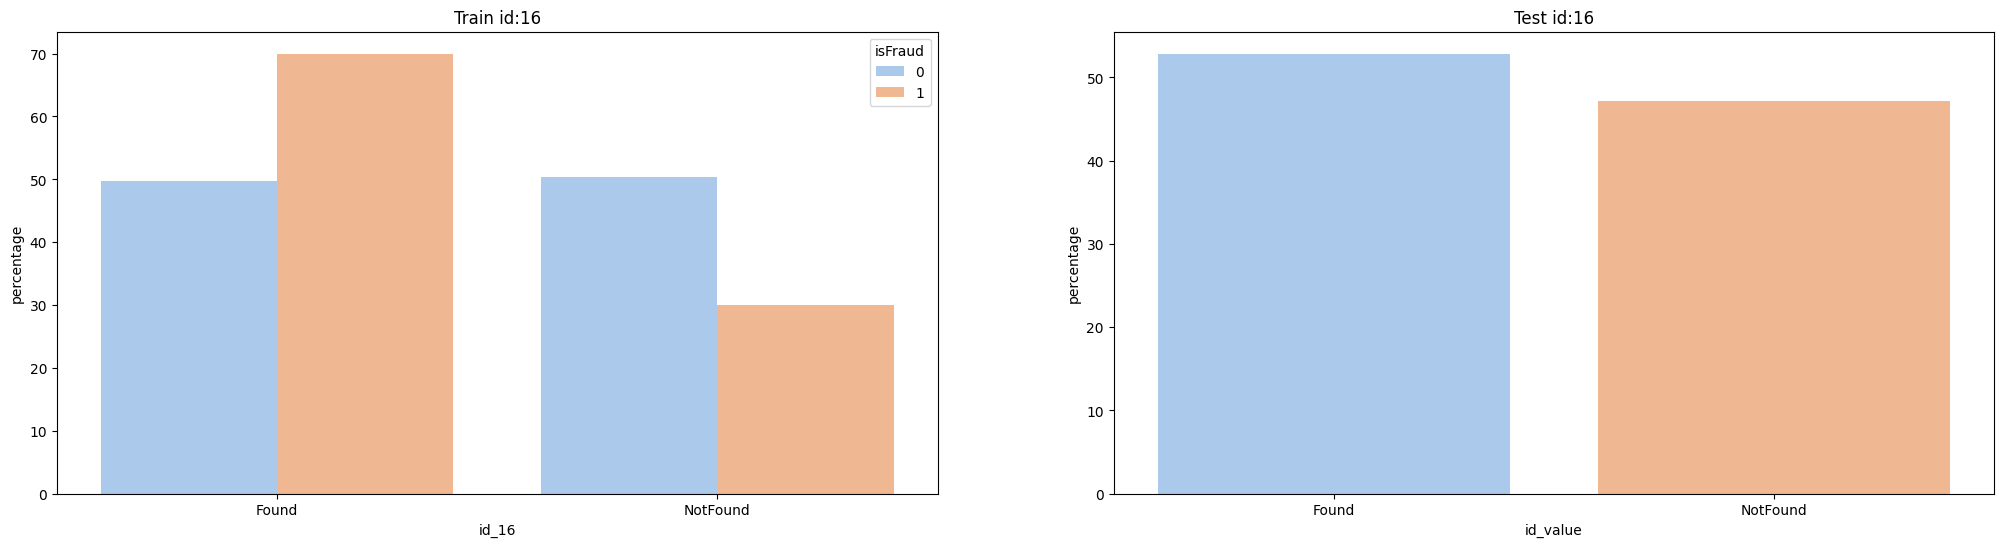

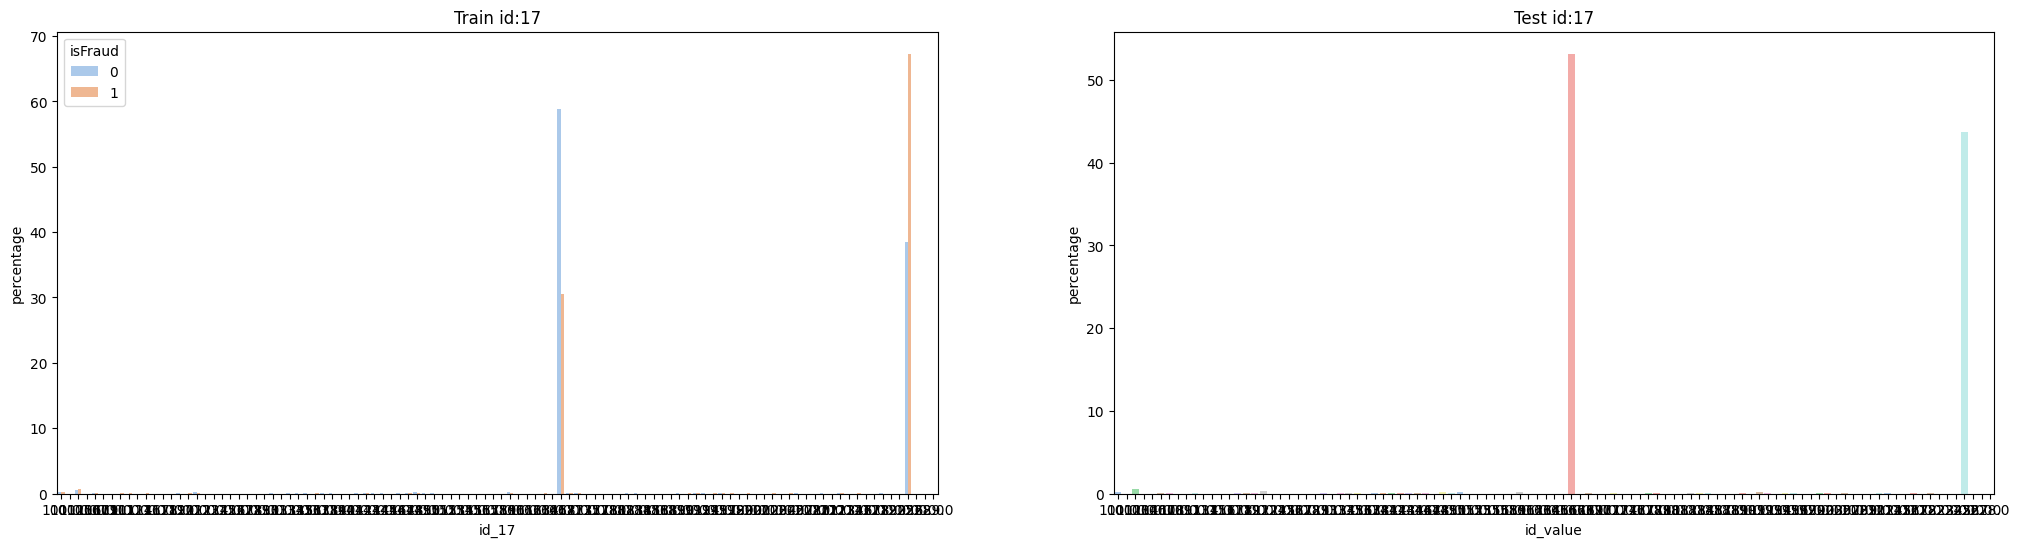

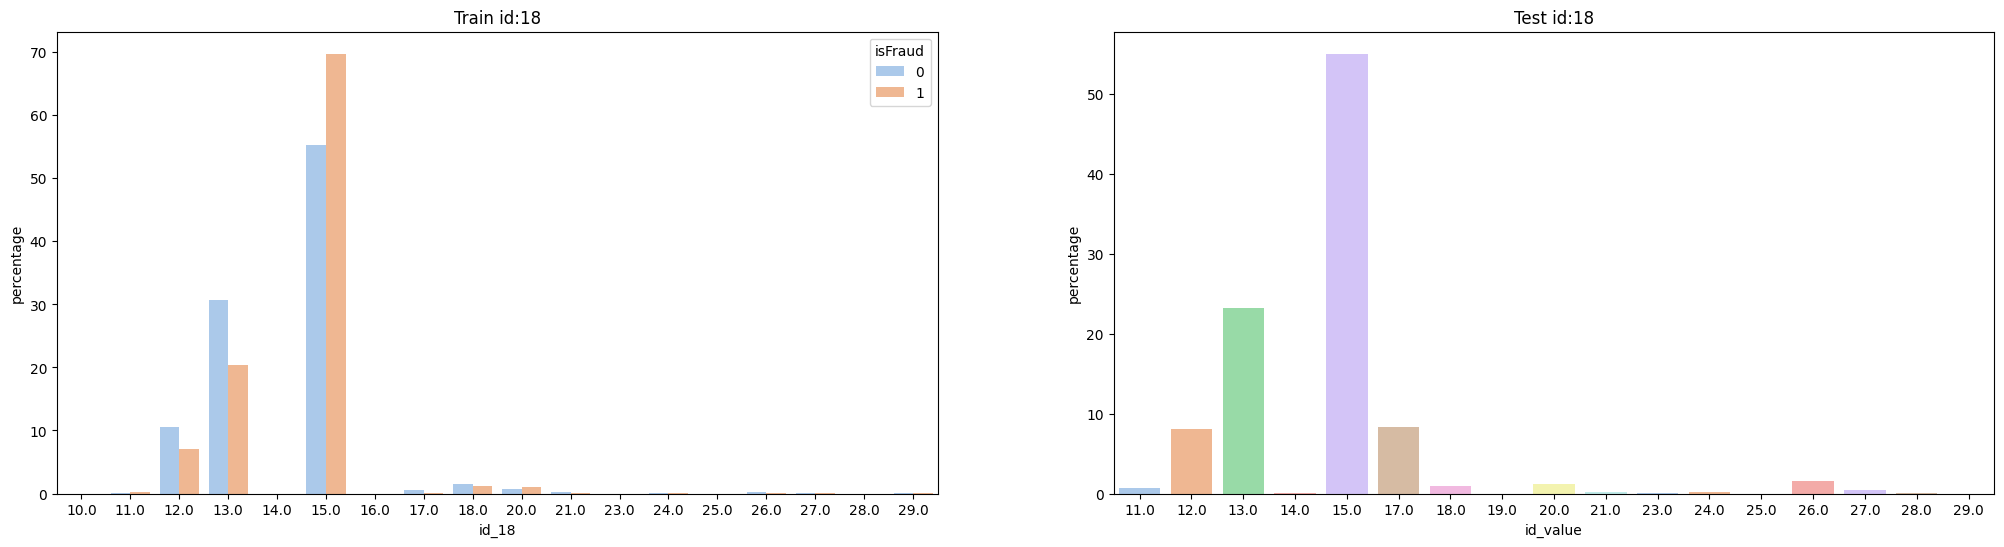

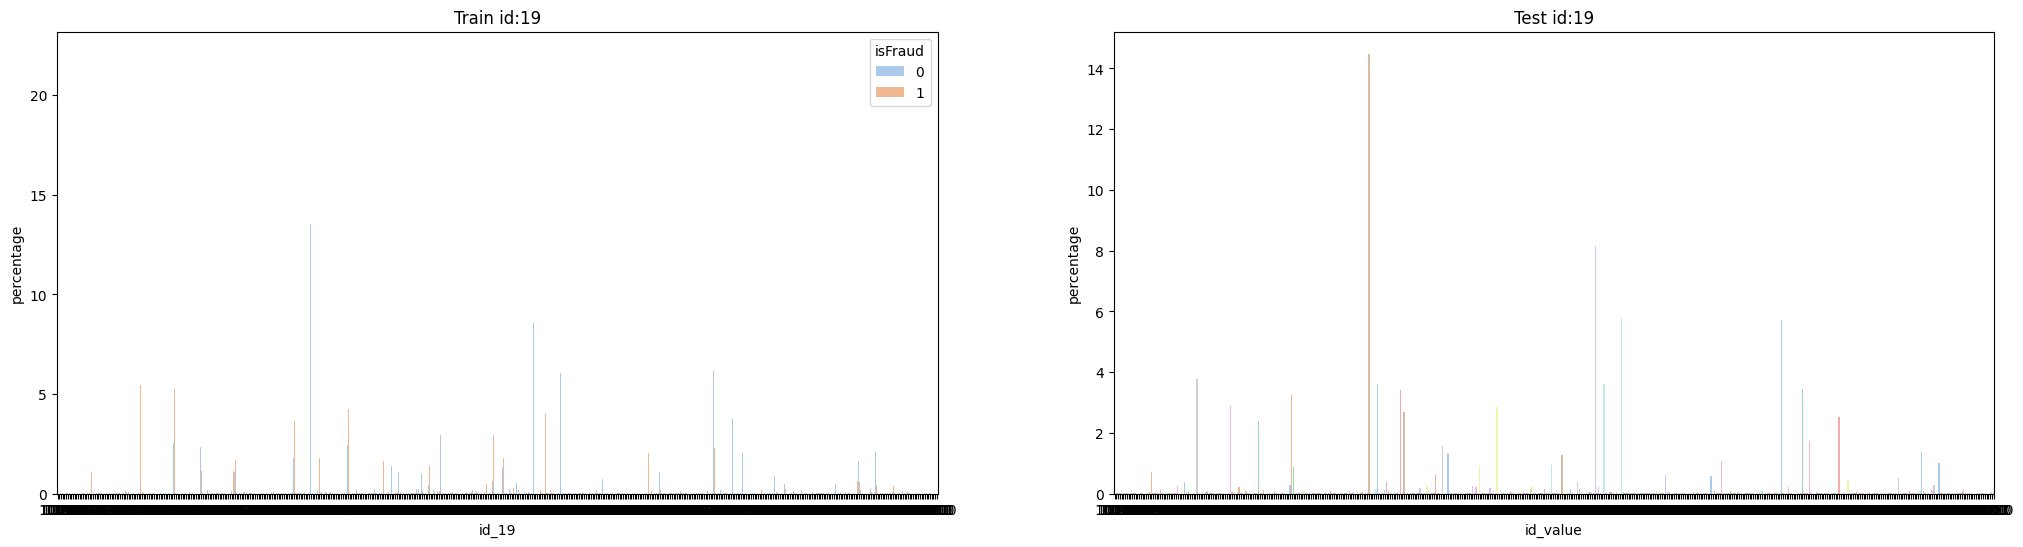

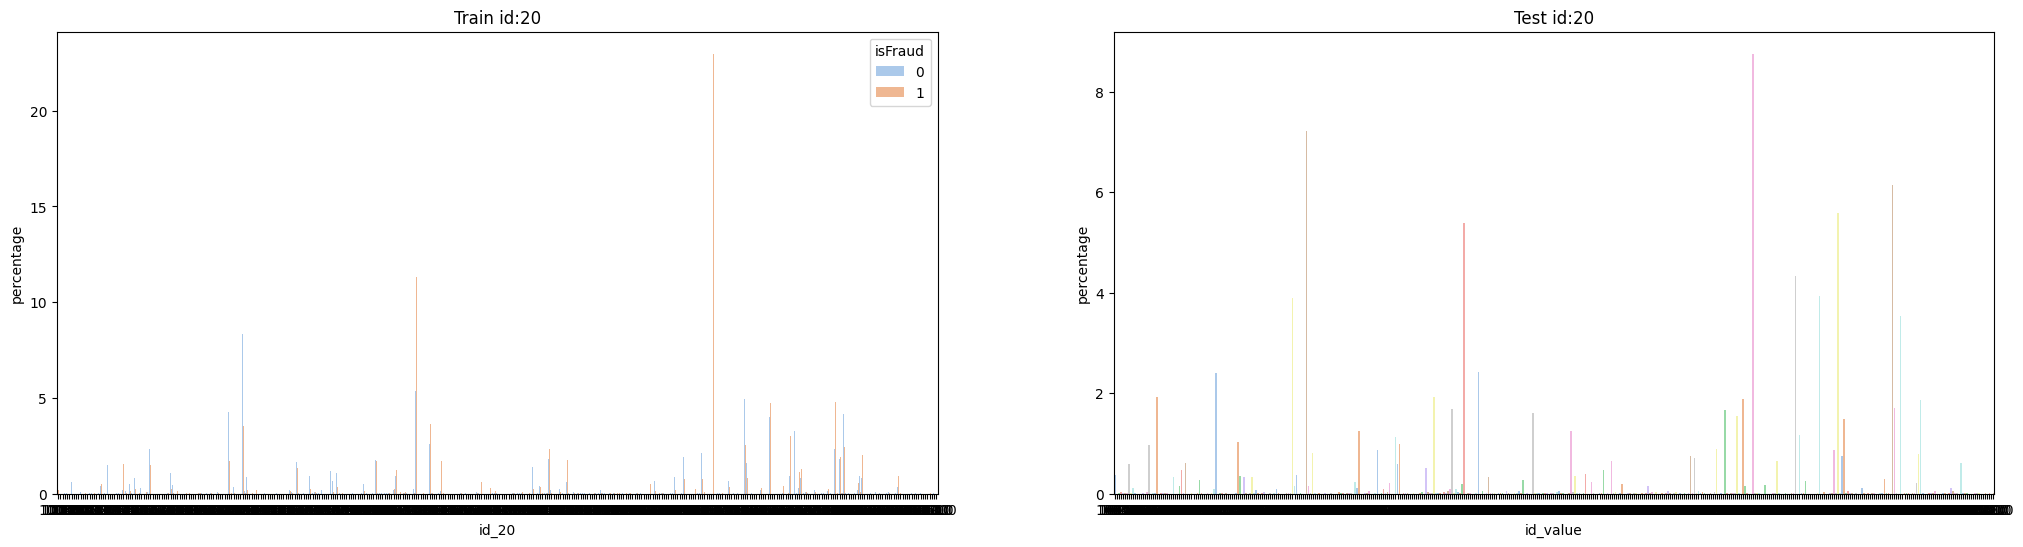

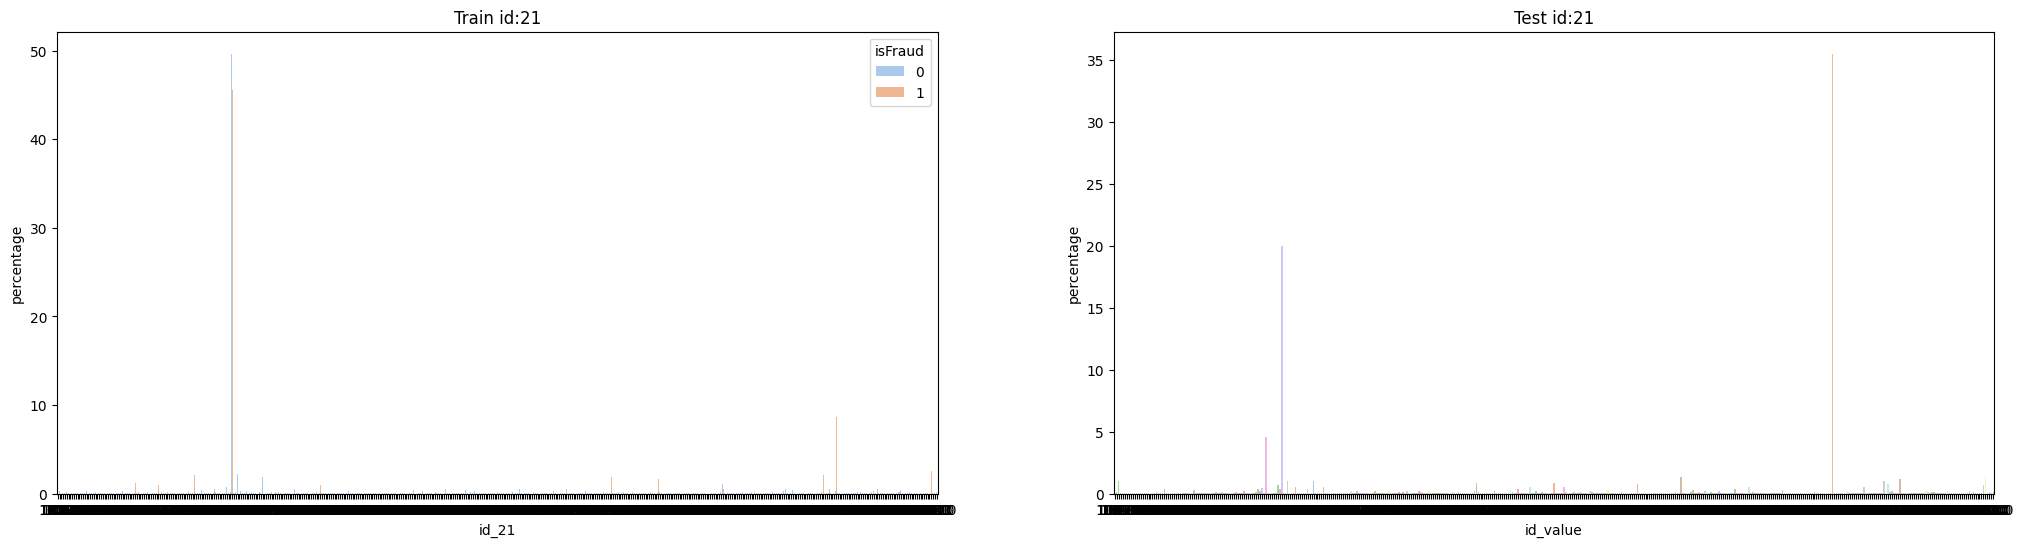

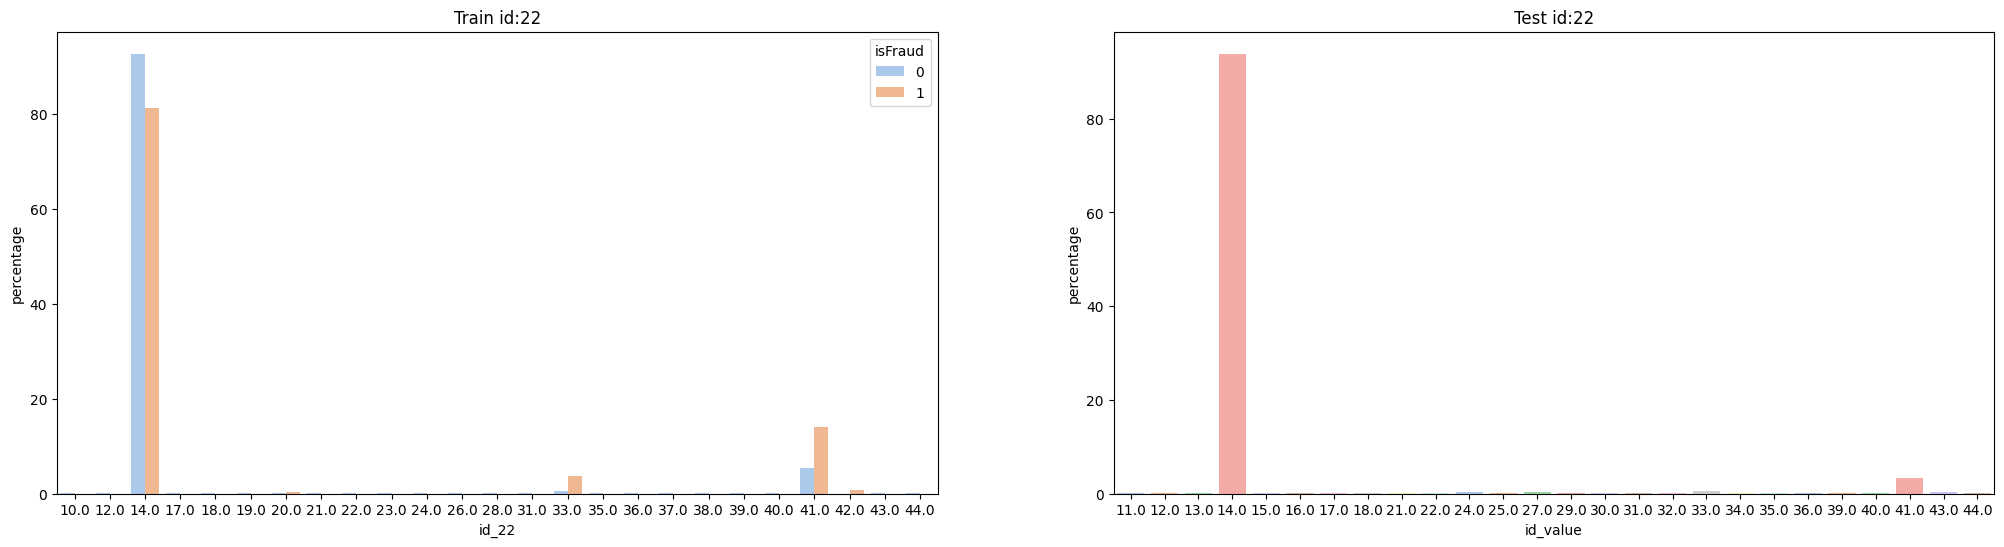

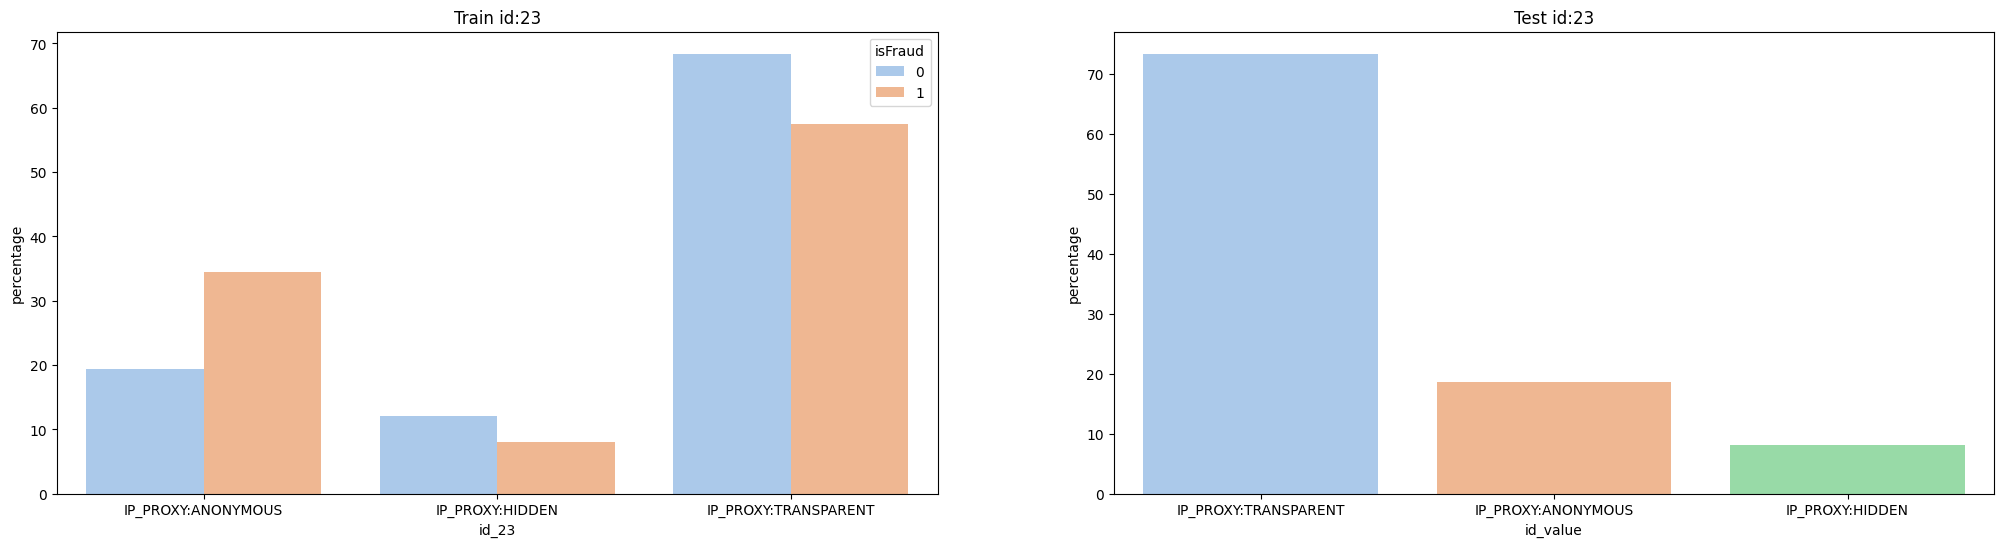

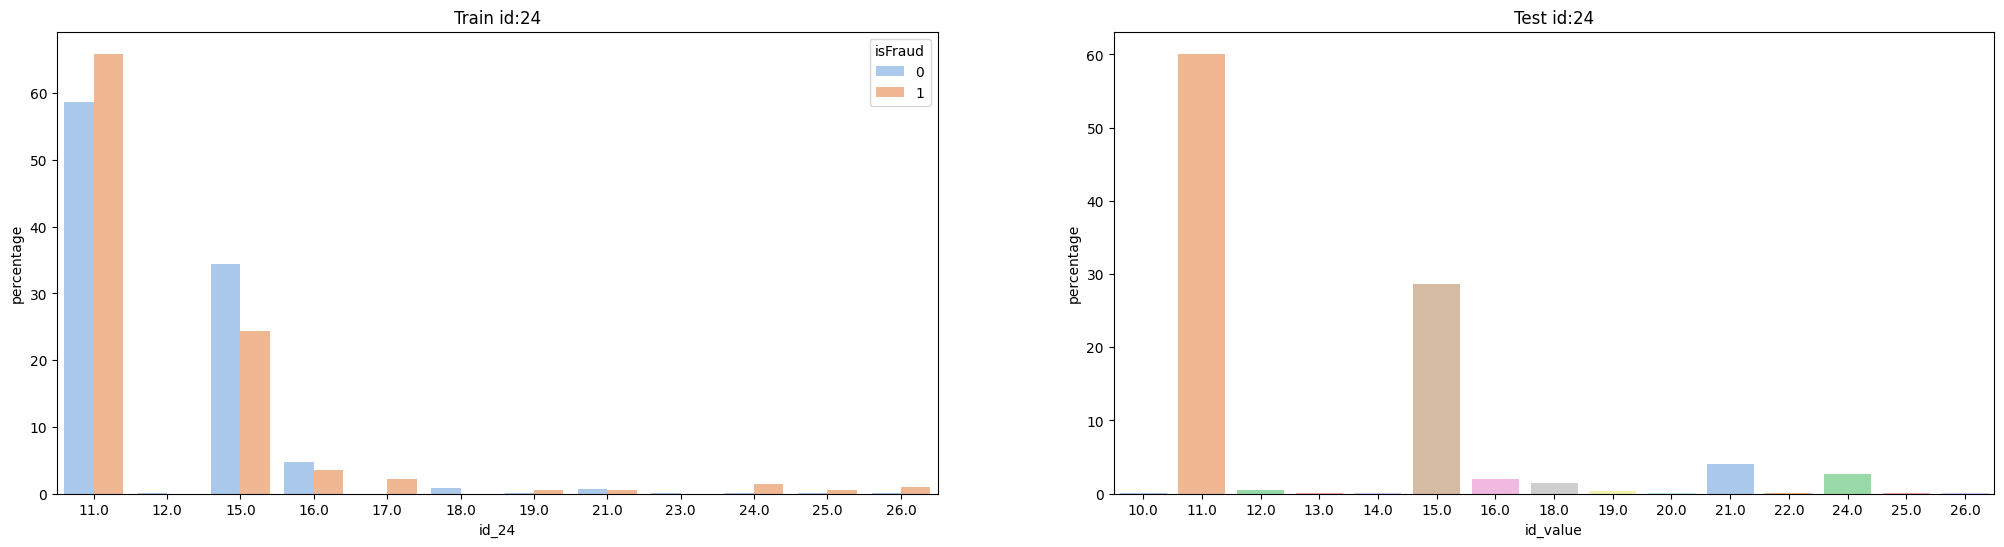

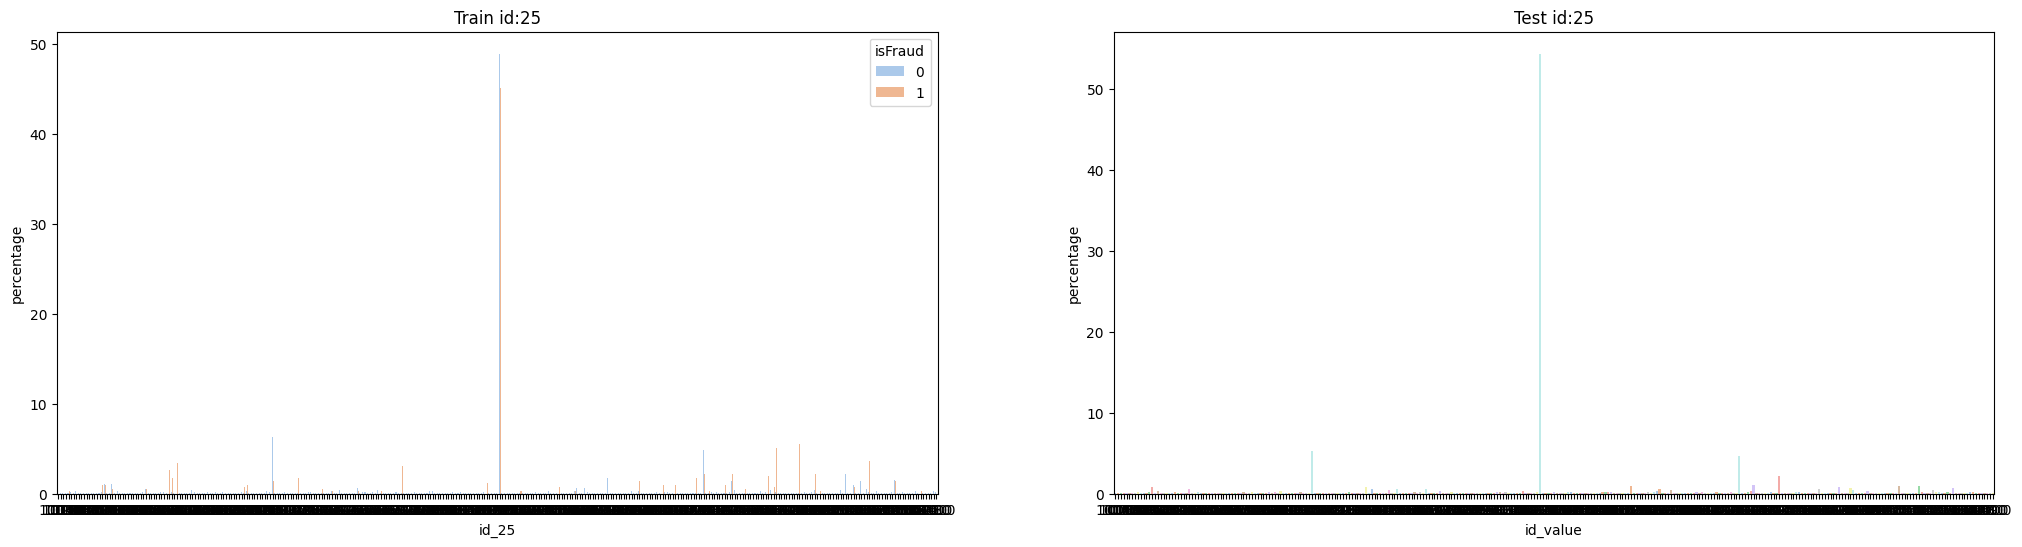

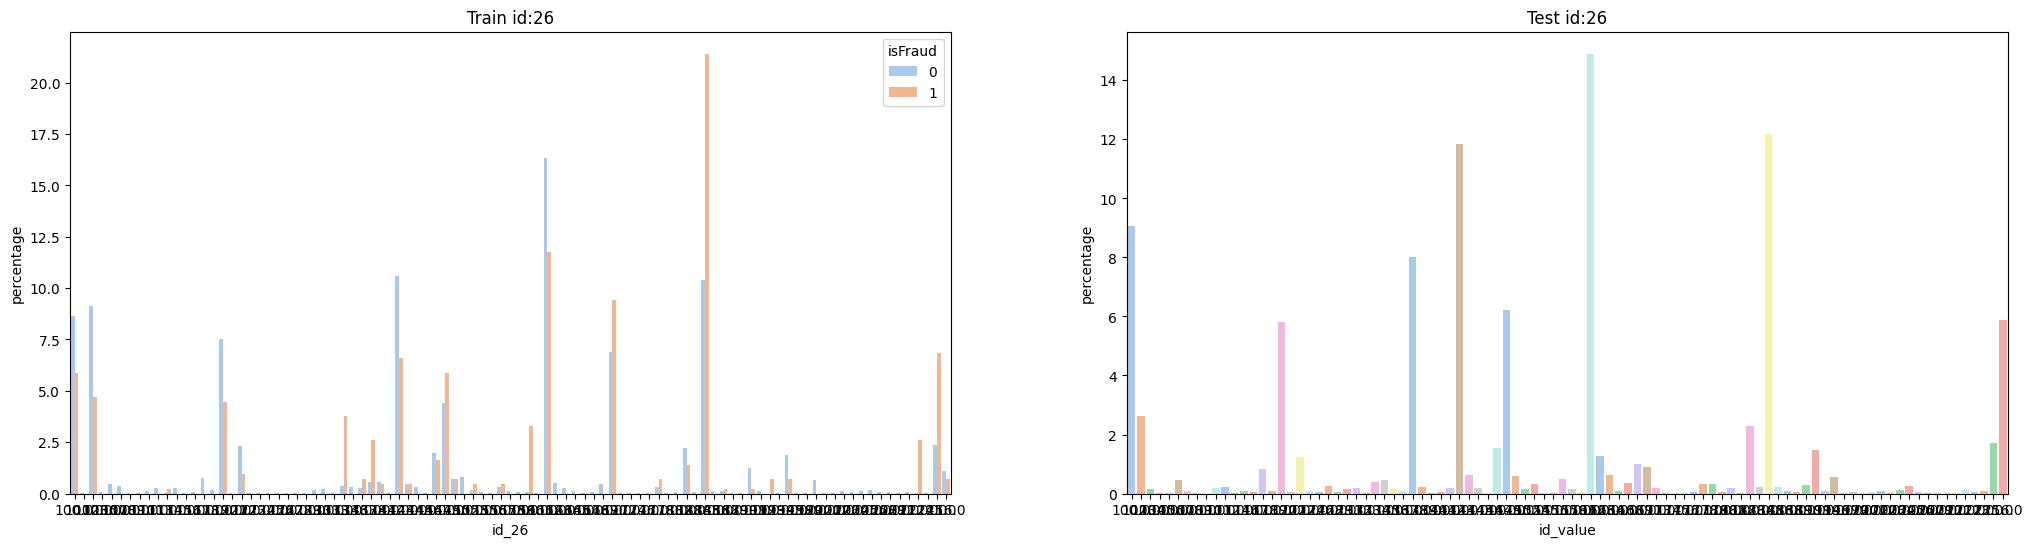

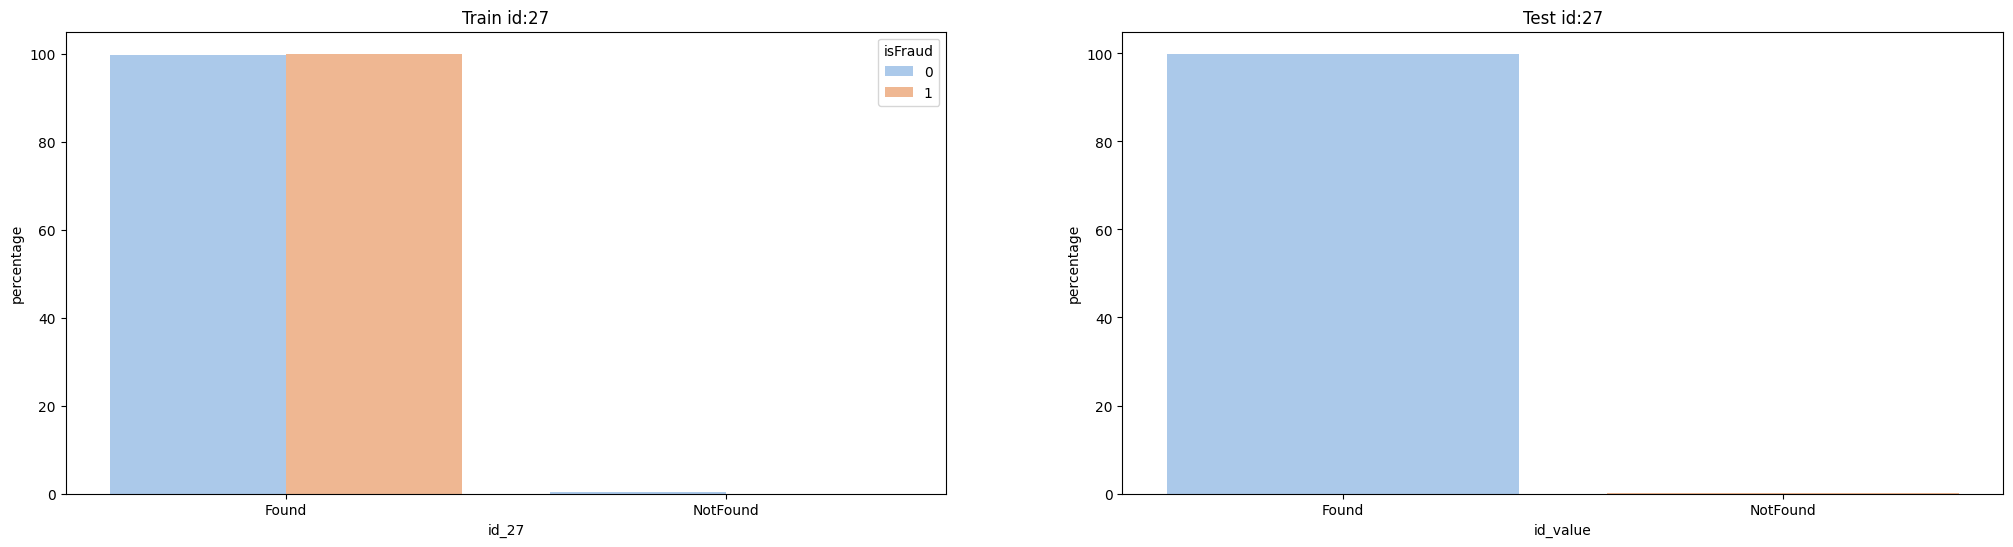

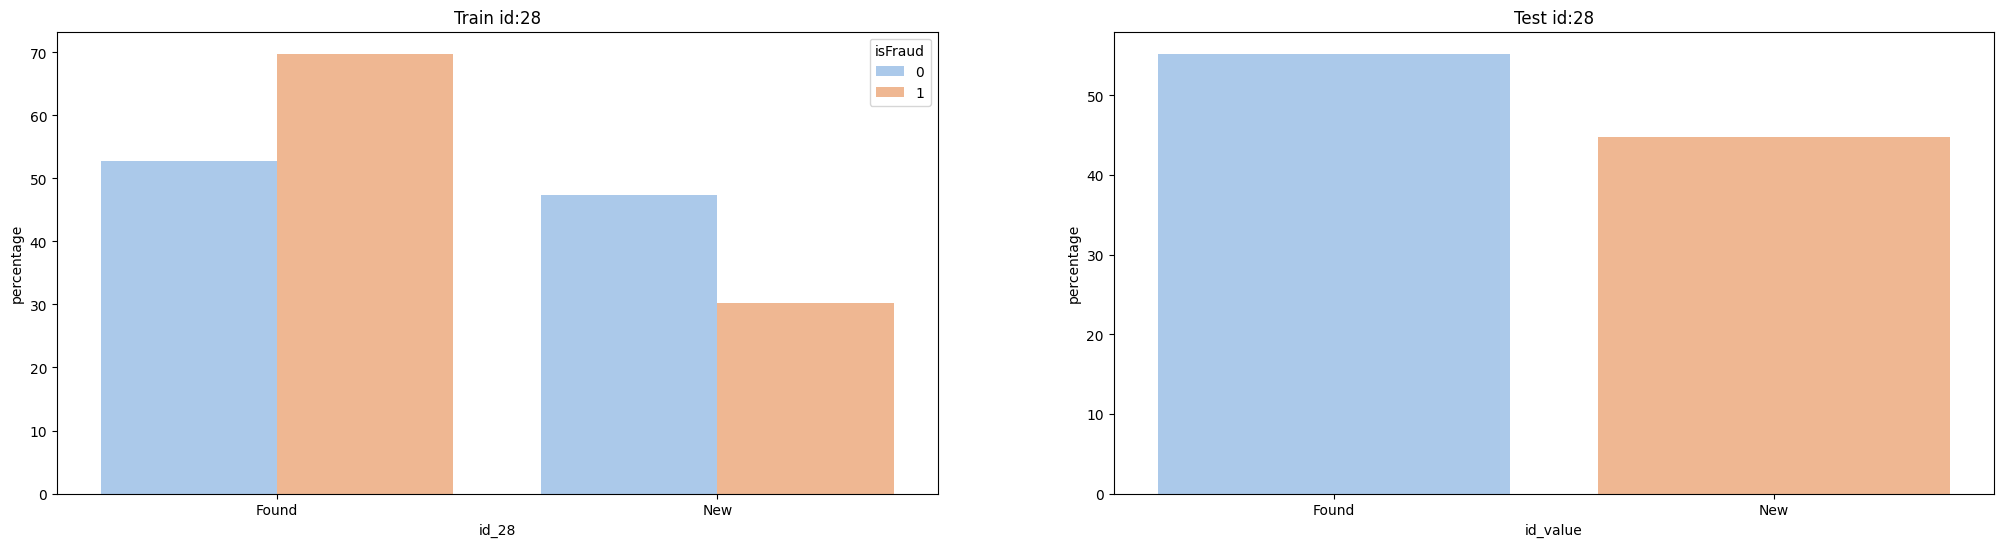

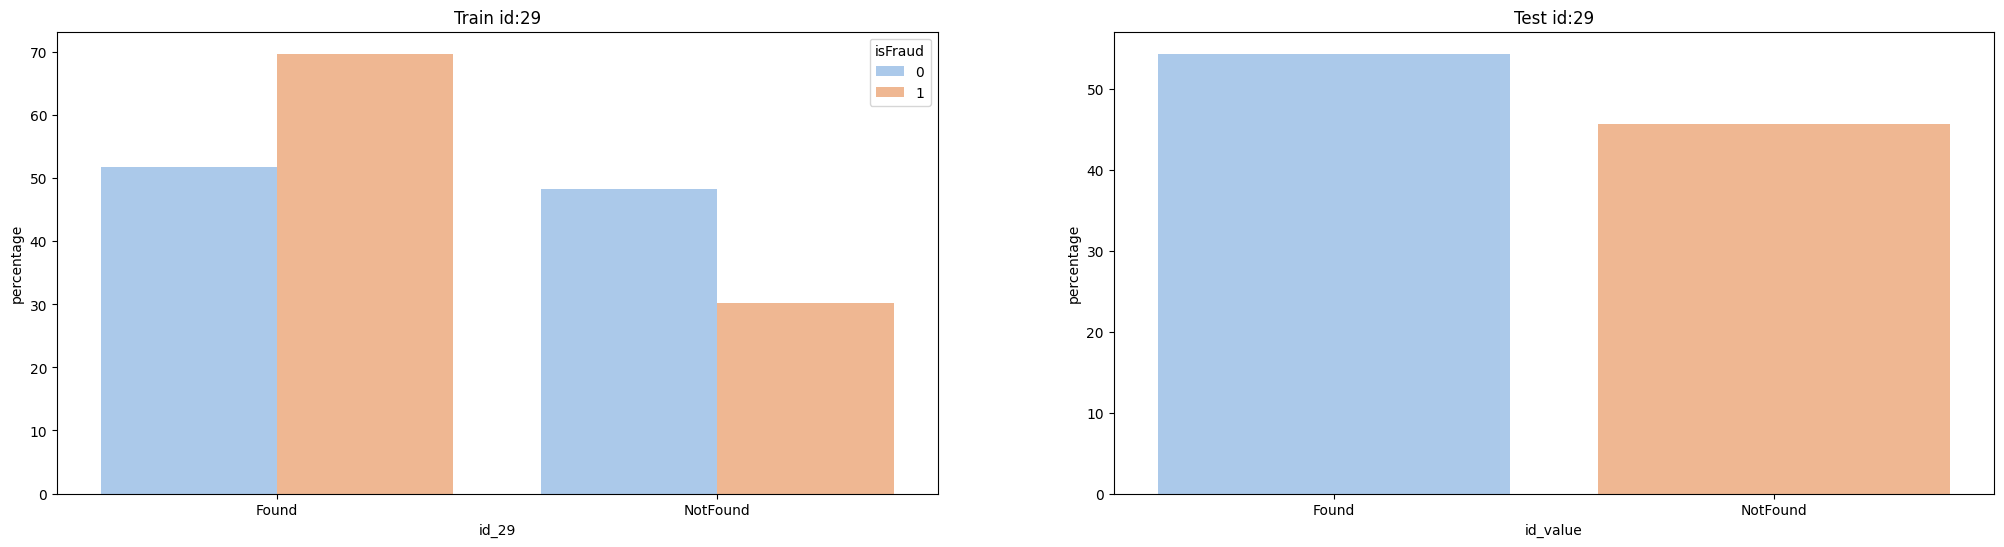

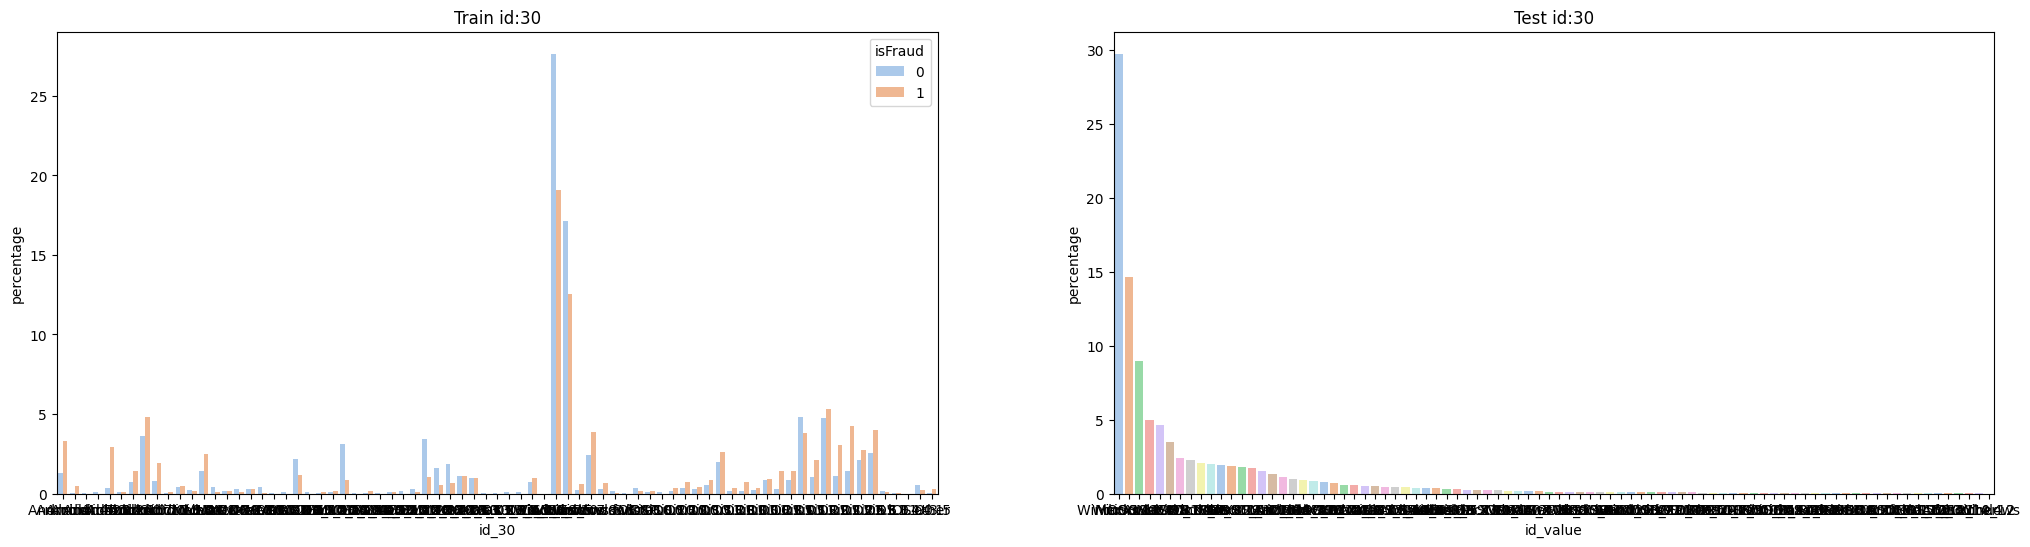

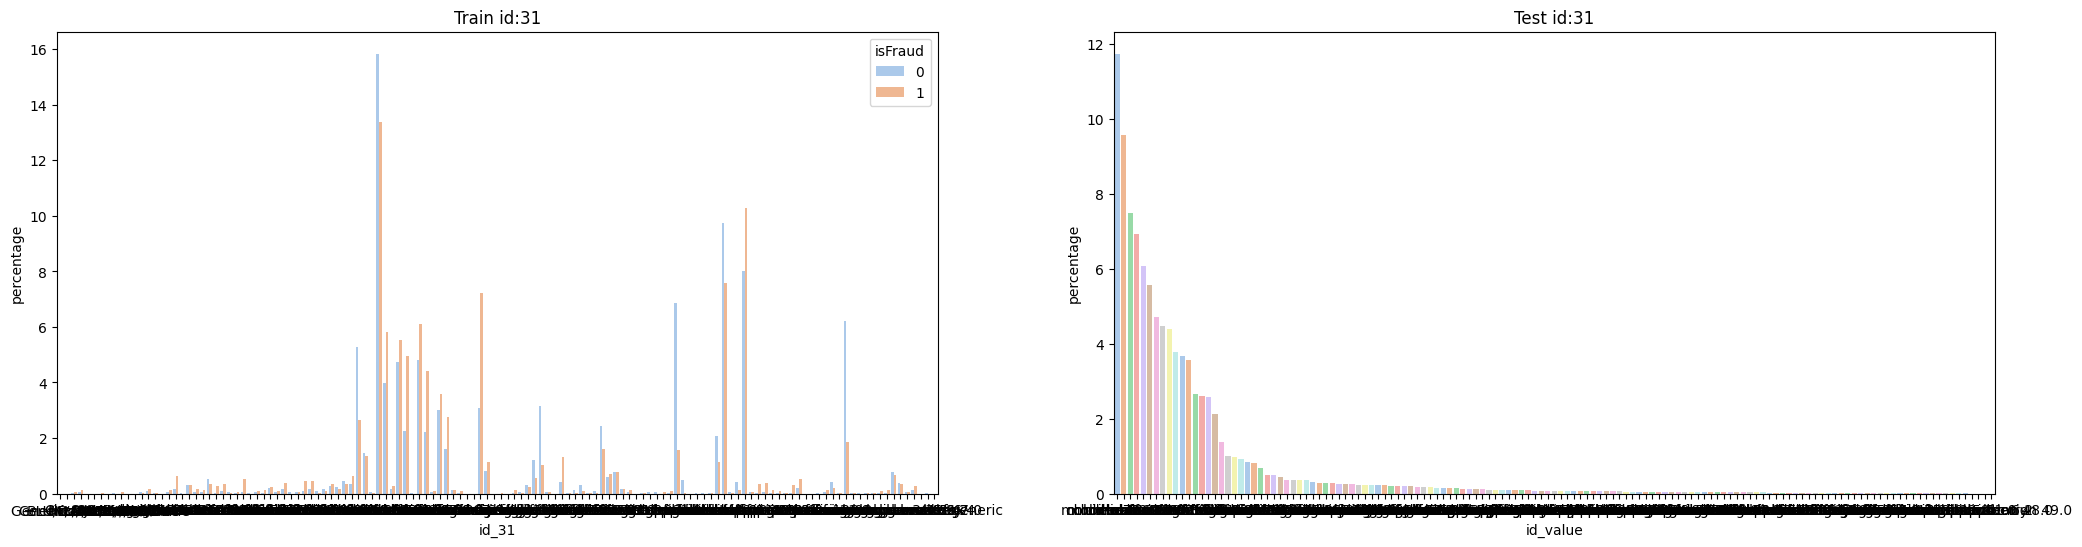

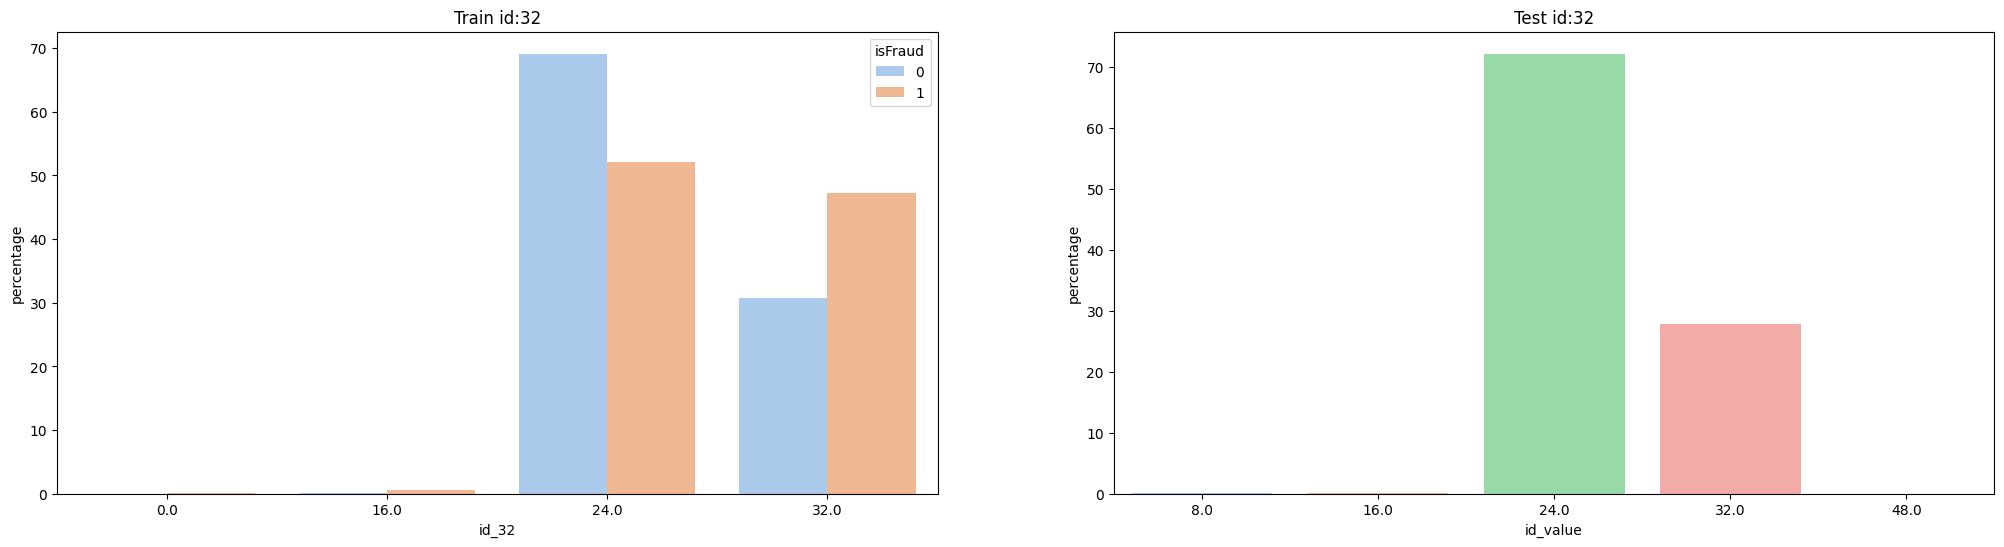

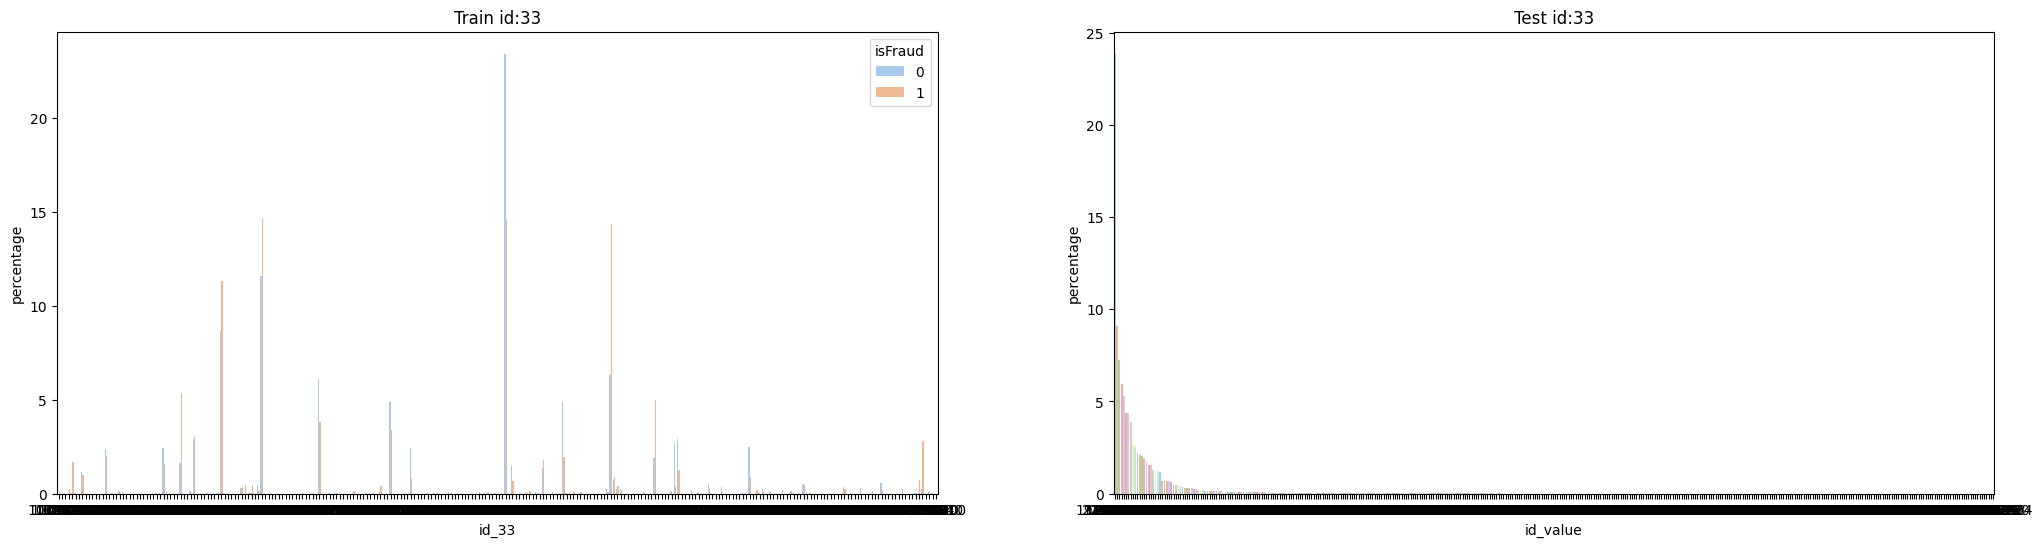

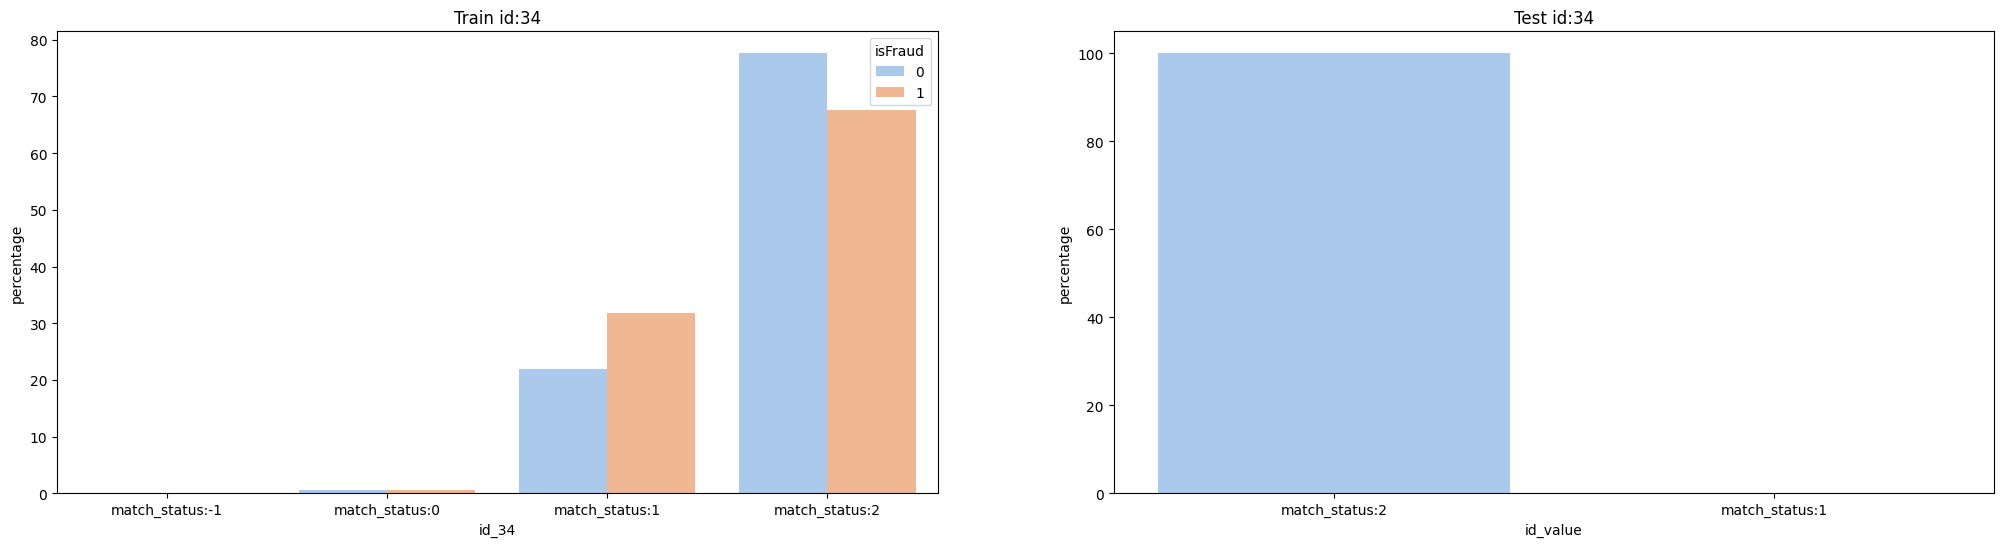

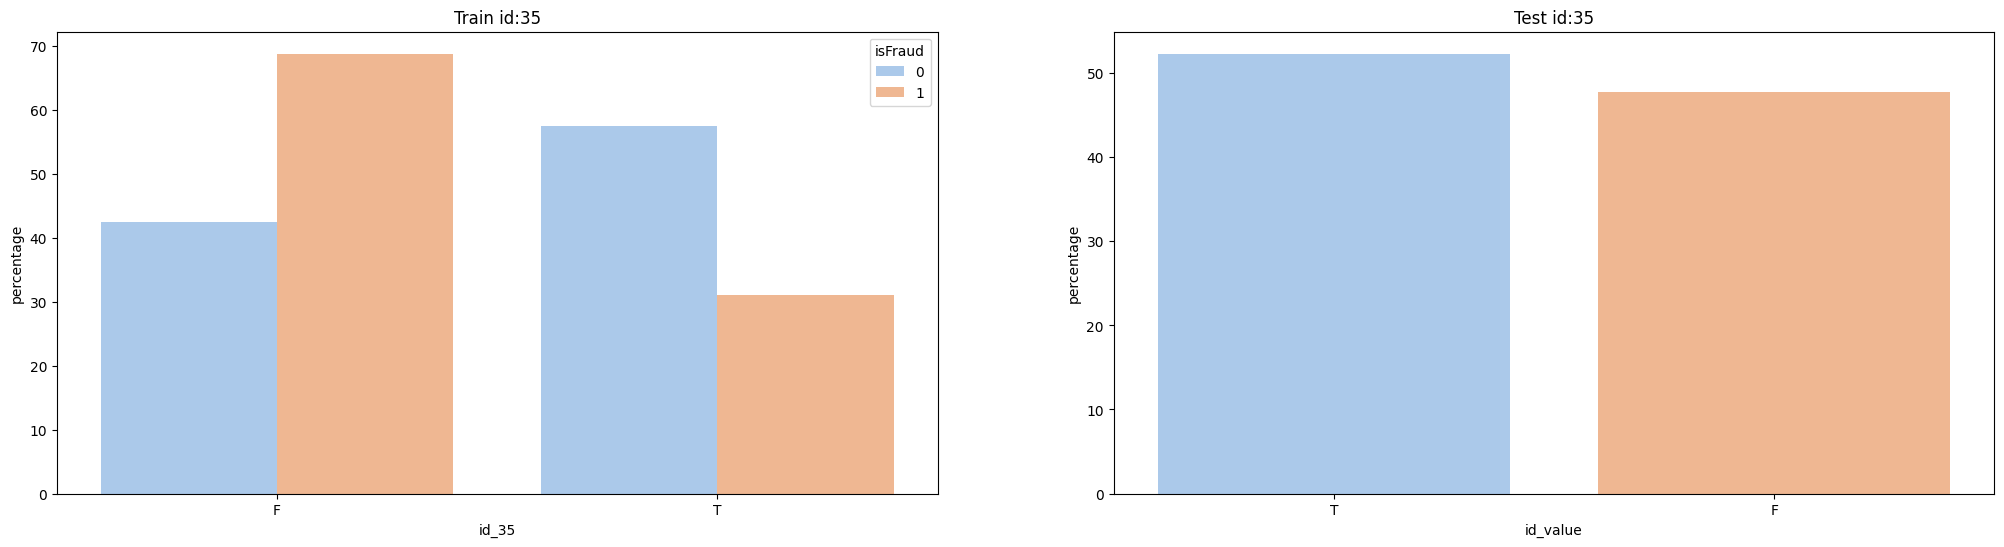

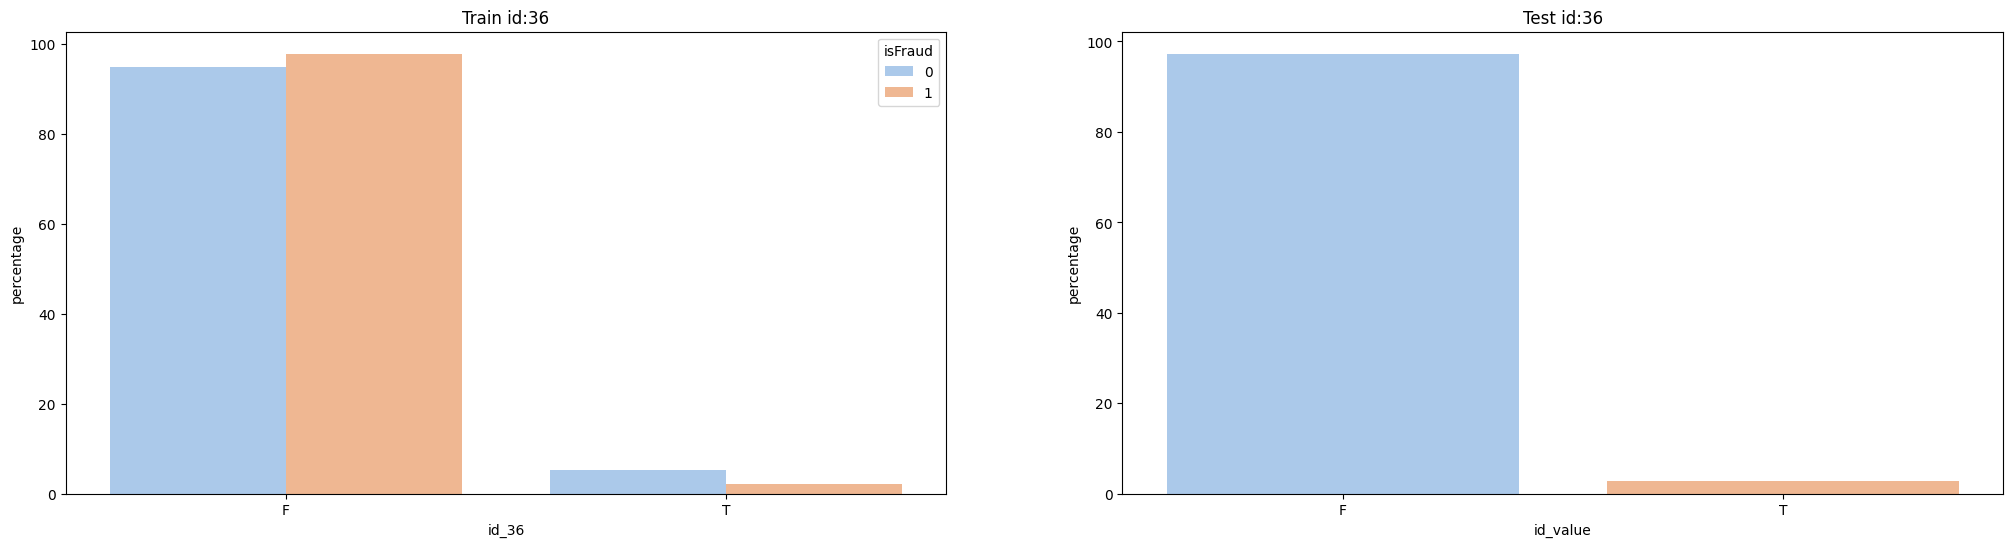

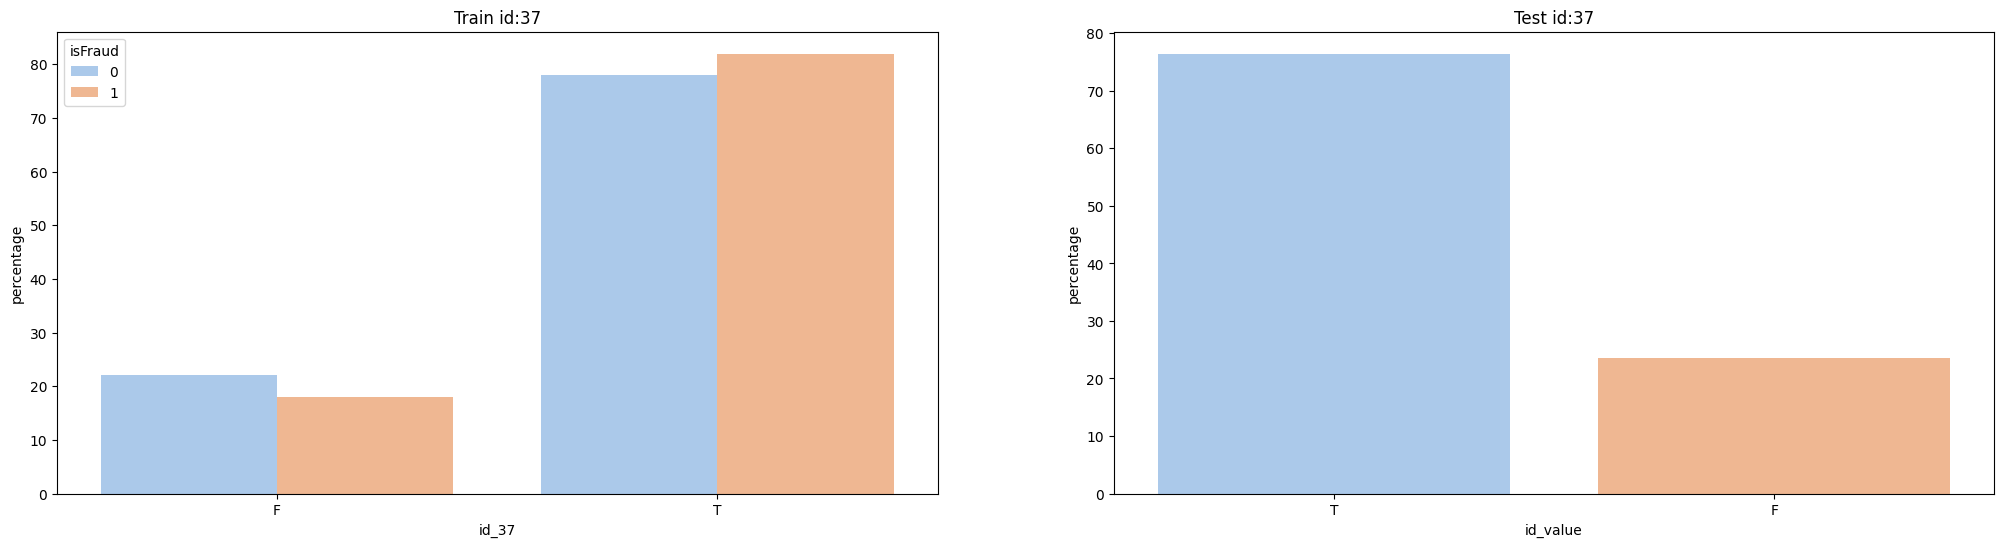

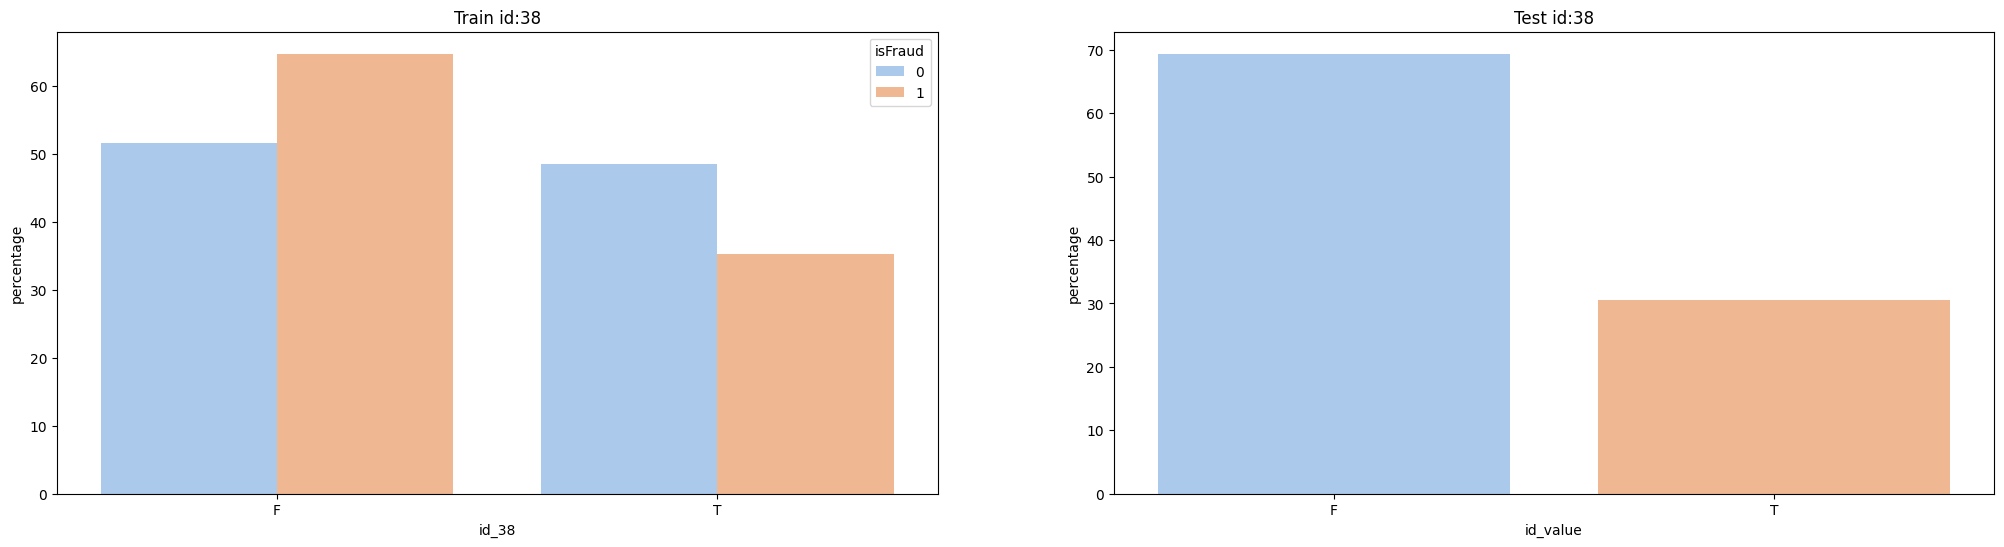

In [ ]:
for i in range(12, 39):
    plt.figure(figsize=(25, 6))

    # First subplot: Train data
    plt.subplot(1, 2, 1)
    temp = train_df.groupby(['isFraud'])['id_' + str(i)].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('id_' + str(i))
    sns.barplot(x="id_" + str(i), y="percentage", hue="isFraud", data=temp, palette='pastel')
    plt.title('Train id:' + str(i))

    # Second subplot: Test data
    plt.subplot(1, 2, 2)
    temp_test = test_df['id_' + str(i)].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
    # Rename the columns for clarity
    temp_test.columns = ['id_value', 'percentage']
    sns.barplot(x="id_value", y="percentage", data=temp_test, palette='pastel')
    plt.title('Test id:' + str(i))

    plt.show()
    print("=" * 112)





In [ ]:
print(train_df['id_30'].value_counts()[:10])
print("===================================")
print(test_df['id_30'].value_counts()[:10])

id_30
Windows 10          21154
Windows 7           13110
iOS 11.2.1           3722
iOS 11.1.2           3699
Android 7.0          2871
Mac OS X 10_12_6     2559
Mac OS X 10_11_6     2348
iOS 11.3.0           2016
Windows 8.1          1914
Mac OS X 10_10_5     1651
Name: count, dtype: int64
id_30
Windows 10          21015
Windows 7           10368
iOS 12.1.0           6349
iOS 11.4.1           3538
Mac OS X 10_13_6     3254
Android 8.0.0        2455
iOS 12.0.1           1691
iOS 11.4.0           1605
Mac OS X 10_11_6     1454
Windows 8.1          1394
Name: count, dtype: int64


In [ ]:
#train data id_30 feature split
train_df['OS_id_30'] = train_df['id_30'].str.split(' ', expand = True)[0]
train_df['version_id_30'] = train_df['id_30'].str.split(' ', expand = True)[1]

#test data id_30 feature split
test_df['OS_id_30'] = test_df['id_30'].str.split(' ', expand = True)[0]
test_df['version_id_30'] = test_df['id_30'].str.split(' ', expand = True)[1]

In [ ]:
print(train_df['id_31'].value_counts()[:10])
print("===================================")
print(test_df['id_31'].value_counts()[:10])

id_31
chrome 63.0                21873
mobile safari 11.0         13394
mobile safari generic      11468
ie 11.0 for desktop         9016
safari generic              8181
chrome 62.0                 7091
chrome 65.0                 6870
chrome 64.0                 6711
chrome 63.0 for android     5776
chrome generic              4767
Name: count, dtype: int64
id_31
chrome 70.0                16054
mobile safari 12.0         13098
mobile safari 11.0         10232
chrome 71.0                 9489
chrome 69.0                 8293
chrome 70.0 for android     7624
chrome 68.0                 6449
chrome 67.0                 6122
chrome 69.0 for android     6022
ie 11.0 for desktop         5173
Name: count, dtype: int64


In [ ]:
def id31_split(dataframe):
    dataframe['browser_id_31'] = dataframe['id_31'].str.split(' ', expand=True)[0]
    dataframe['version_id_31'] = dataframe['id_31'].str.split(' ', expand=True)[1]

In [ ]:
id31_split(train_df)

In [ ]:
id31_split(test_df)

In [ ]:

print(train_df['id_33'].value_counts()[:10])
print("===================================")
print(test_df['id_33'].value_counts()[:10])

id_33
1920x1080    16874
1366x768      8605
1334x750      6447
2208x1242     4900
1440x900      4384
1600x900      3510
2048x1536     3482
1280x800      2149
2560x1600     2093
2560x1440     1865
Name: count, dtype: int64
id_33
1920x1080    16868
1366x768      6441
1334x750      5103
2208x1242     4213
1440x900      3743
1600x900      3093
2048x1536     3074
2436x1125     2746
2880x1800     1888
2560x1600     1778
Name: count, dtype: int64


In [ ]:
def id33_split(dataframe):
    dataframe['screen_width'] = dataframe['id_33'].str.split('x', expand = True)[0]
    dataframe['screen_height'] = dataframe['id_33'].str.split('x', expand = True)[1]

In [ ]:
id33_split(train_df)
id33_split(test_df)

In [ ]:
# saving the analysed dataset into new csv file.
train_df.to_csv("train_afterEDA.csv", index=False)
test_df.to_csv("test_afterEDA.csv", index=False)